# Source Code Final Group Project RAKAMIN

Group 2;

- Mellia Anggraeni <br>
- Burhanuddin Yusuf Robbani <br>
- David Melanius Nai <br>
- Alfath Arrahman <br>
- Moch Agung Laksono <br>
- Dzul Wulan Ningtyas <br>
- Zaima Syarifa Asshafa

## Importing the Relevant Libraries

In [ ]:
# library for pre processing dataframe

import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# library for visualization

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.max_rows = None
pd.options.display.max_columns = None

In [ ]:
# for creating the default size of frame

sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

## Importing the Dataset

In [ ]:
# Getting the dataset contain Banking Accounts

# df_bank = pd.read_csv('G:\Kerja\Rakamin\File\Churn_Modelling.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/My Drive/Upload/

/content/drive/My Drive/Upload


In [ ]:
df_bank = pd.read_csv('Churn_Modelling.csv')

## Exploratory Data Analysis (Pattern only)

### Descriptive Information

In [ ]:
# Getting dataset brief information

df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
# Checking the contain of the dataset

df_bank.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

What we get from this dataset brief information?

- Contain 10000 rows
- Contain 14 columns(feature)
- All columns have correct data types, however, need to convert some of them for the reason of checking the pattern purpose only
- All values is relevant to the correspond column
- All columns do not have missing value.
- Column Exited is our target variable while the others are the features.
- Because the target variable is already represent on the data, then we can do the machine learning with supervised learning method.
- Thus our target variable is represented as binary value (or categorical), therefore, we can use the model such as classification.

In [ ]:
# Separating the data feature into categorical and numerical for checking the pattern of their data

## Converting the selected feature from numerical into object

### Converting HasCrCard, IsActiveMember, and Exited feature into object type

df_bank['HasCrCard'] = df_bank['HasCrCard'].astype(str)
df_bank['IsActiveMember'] = df_bank['IsActiveMember'].astype(str)
df_bank['Exited'] = df_bank['Exited'].astype(str)

cats_types = ['object']
nums_types = ['int64', 'float64']

nums_df = df_bank.select_dtypes(include = nums_types)
cats_df = df_bank.select_dtypes(include = cats_types)

categorical = cats_df.columns
numerical = nums_df.columns

print('Below are the categorical features;')
print(categorical)
print('\nBelow are the numerical features;')
print(numerical)

Below are the categorical features;
Index(['Surname', 'Geography', 'Gender', 'HasCrCard', 'IsActiveMember',
       'Exited'],
      dtype='object')

Below are the numerical features;
Index(['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'EstimatedSalary'],
      dtype='object')


In [ ]:
# Checking information about descriptive statistic from the numerical data

nums_df.describe()

RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts  EstimatedSalary  
count   10000.000000   10000.000000     10000.000000  
mean    76485.889288       1.530200    100090.239881  
std     62397.405202       0.581654     57510.492818  
min         0.000000       1.000000        11.580000  
25%         0.000000       1.000000     51002.110000  
50%     97198.540000       1.000000    100193.915000  
75%    127644.240000       2.000000    149388.247500  
max    250898.090000       4.000000    199992.480000

What could we get from these information?

- CreditScore feature has value ranged from 350 until 850. The difference between the value of its mean and median is very close, hence this feature has normal distribution pattern.
- Age feature has value ranged from 18 yo until 92 yo. The difference between the value of its mean and median is very close, hence this feature has normal distribution pattern.
- Tenure feature has value ranged from 0 month until 10 months. The difference between the value of its mean and median is very close, hence this feature has normal distribution pattern.
- Balance feature has value ranged from "$0K" until "$251K". The difference between the value of its mean and median is likely far, hence this feature has skewed distribution pattern and also has extremely outliers.
- NumOfProducts feature has value ranged from 1 until 4. The difference between the value of its mean and median is close, hence this feature has kind of like normal distribution pattern.
- EstimatedSalary feature has value ranged from "$11K" until "$200K". The difference between the value of its mean and median is very close, hence this feature has normal distribution pattern.

In [ ]:
# Checking information about descriptive statistic from the categorical data

cats_df.describe()

Surname Geography Gender HasCrCard IsActiveMember Exited
count    10000     10000  10000     10000          10000  10000
unique    2932         3      2         2              2      2
top      Smith    France   Male         1              1      0
freq        32      5014   5457      7055           5151   7963

What could we get from these information?

- Geography feature has 3 unique values and France is where the most customer's location coming from (50%).
- Gender feature has 2 unique values and many customer coming from Male over female (54%).
- HasCrCard feature is boolean type and we could see mostly customer have credit card in their account (70%).
- IsActiveMember is boolean type and we could see that the bank is closely have the same amount of active members and non-active members (51%:49%).
- Exited is boolean type and we could see that the bank have big churn rate from customer (21%) which is surely the main problem for the business.

### Univariate Analysis

#### Numerical Features

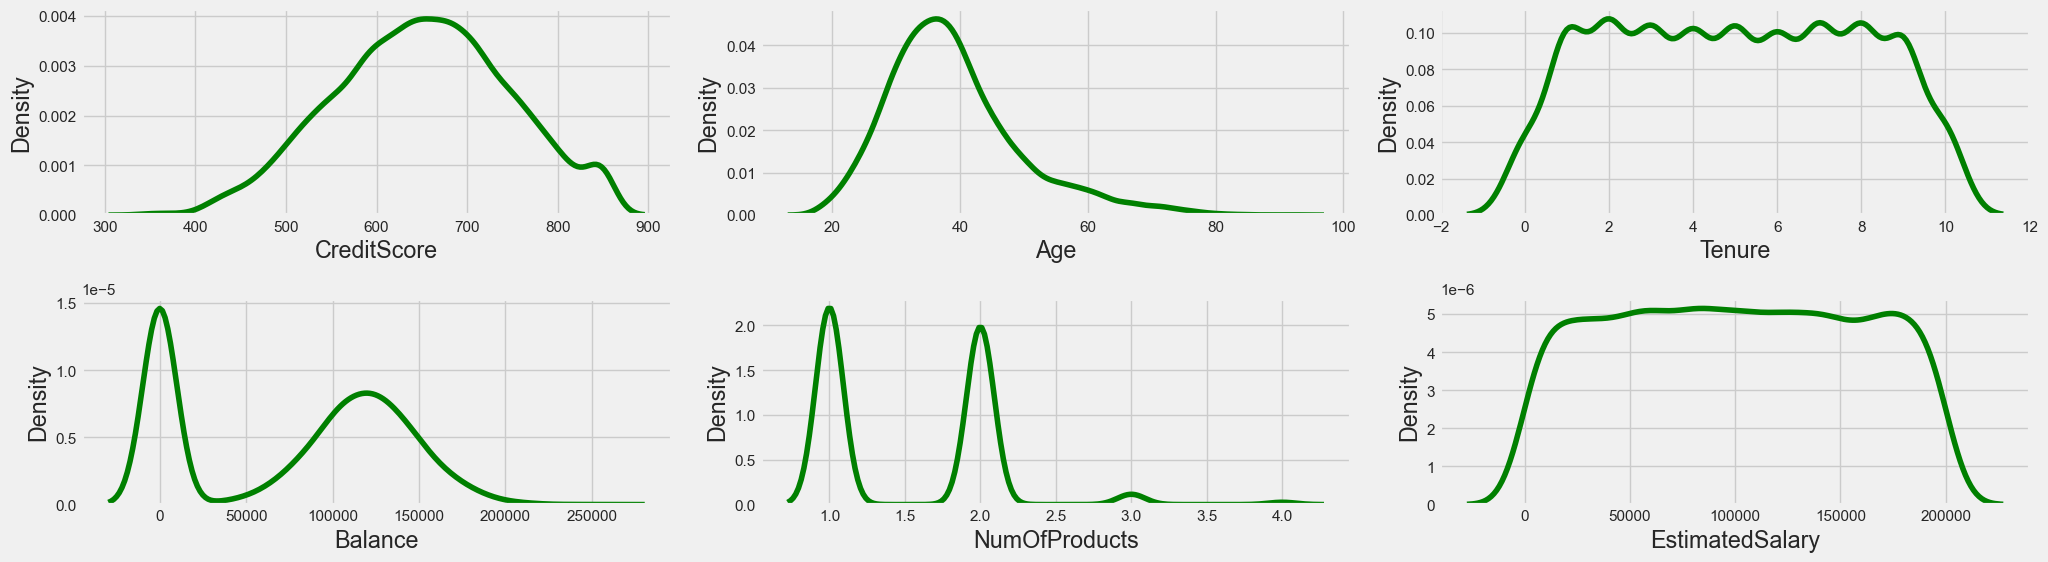

In [ ]:
# Check the numerical data shape using kde plot

features = numerical[2:]
for i in range(0, len(features)):
    plt.subplot(3, 3, i+1)
    sns.kdeplot(x = df_bank[features[i]], color = 'green')
    plt.tight_layout()

In [ ]:
# Checking the distribution values from Tenure feature

df_bank.Tenure.value_counts()

Tenure
2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: count, dtype: int64

What could we get from all of these plot and information?

- CreditScore feature has normal distribution shape with the central tendency values are around 600 - 700.
- Age feature has normal distribution shape with the central tendency values are around 25 - 45 years old.
- Tenure feature has likely discrete uniform distribution shape because it contains many modes around it, hence, we cannot call this plot as normal distribution and we can assume it fall into categorical feature.
- Balance feature has positvely skewed distribution but with bimodal pattern in zero area and $100K - $150K.
- NumOfProducts feature has bimodal distribution, hence, we cannot call this plot as normal distribution and we can assume it fall into categorical feature.
- EstimatedSalary feature has kind-of-like normal distribution shape with the central tendency values are around $25K - $175K.

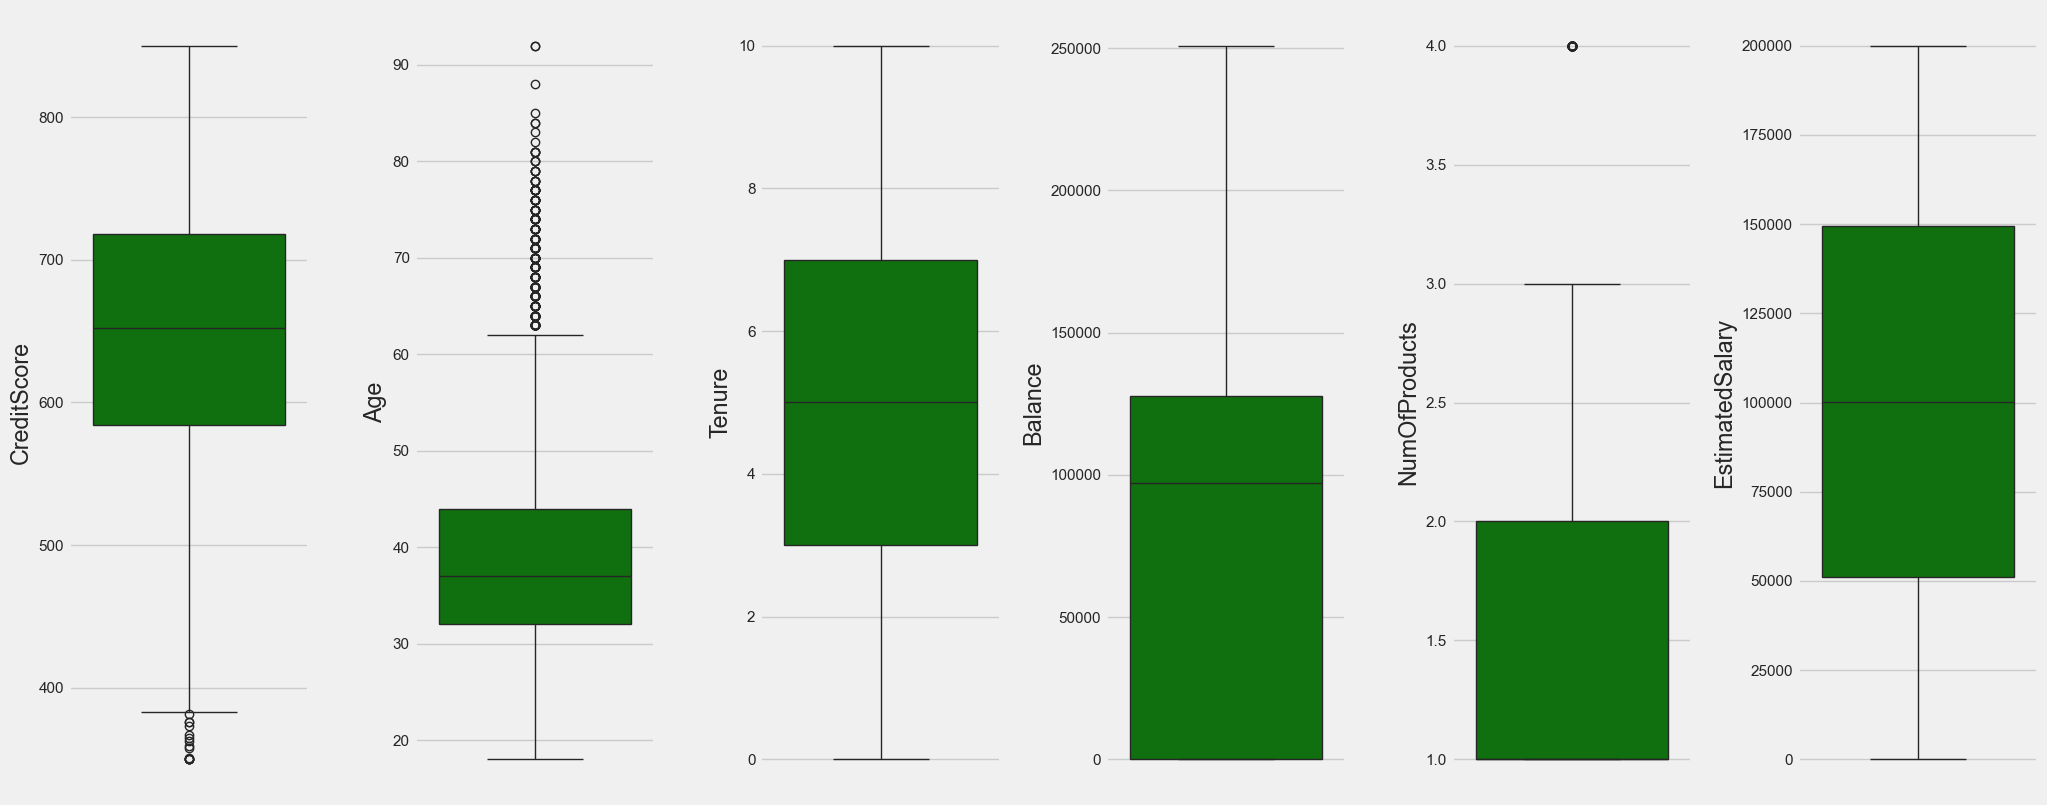

In [ ]:
# Check if there's outliers inside the numerical data

features = numerical[2:]
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y = df_bank[features[i]], color = 'green', orient = 'v')
    plt.tight_layout()

What could we get from all these box plot information?

- CreditScore feature has outliers in the beyond of the lower whisker on the boxplot.
- Age feature has outliers in the beyond of the upper whisker on the boxplot.
- Tenure feature has no outliers.
- Balance feature has no outliers.
- NumOfProducts has single outlier in the beyond of the upper whisker on the boxplot.
- EstimatedSalary feature has no outliers.

#### Categorical features

In [ ]:
# Converting Tenure and NumOfProducts feature into categorical feature

df_bank['Tenure'] = df_bank['Tenure'].astype(str)
df_bank['NumOfProducts'] = df_bank['NumOfProducts'].astype(str)
cats_df = df_bank.select_dtypes(include = cats_types)
categorical = cats_df.columns

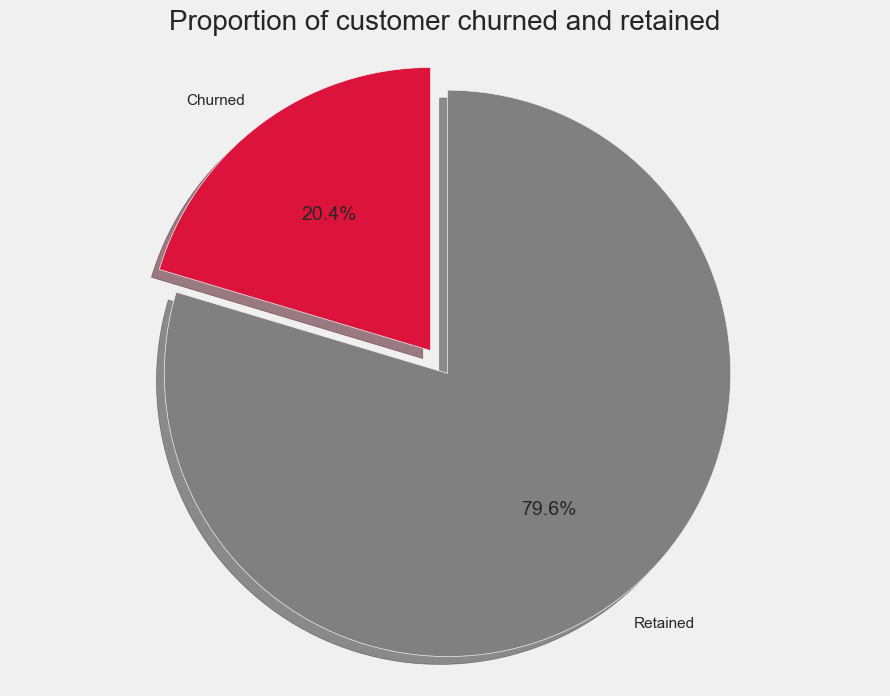

In [ ]:
# Check the proportion of the churned customer with not churned customer

labels = 'Churned', 'Retained'
sizes = [df_bank.Exited[df_bank['Exited']==1].count(), df_bank.Exited[df_bank['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, colors = ['Crimson', 'Grey'])
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 20)
plt.show()

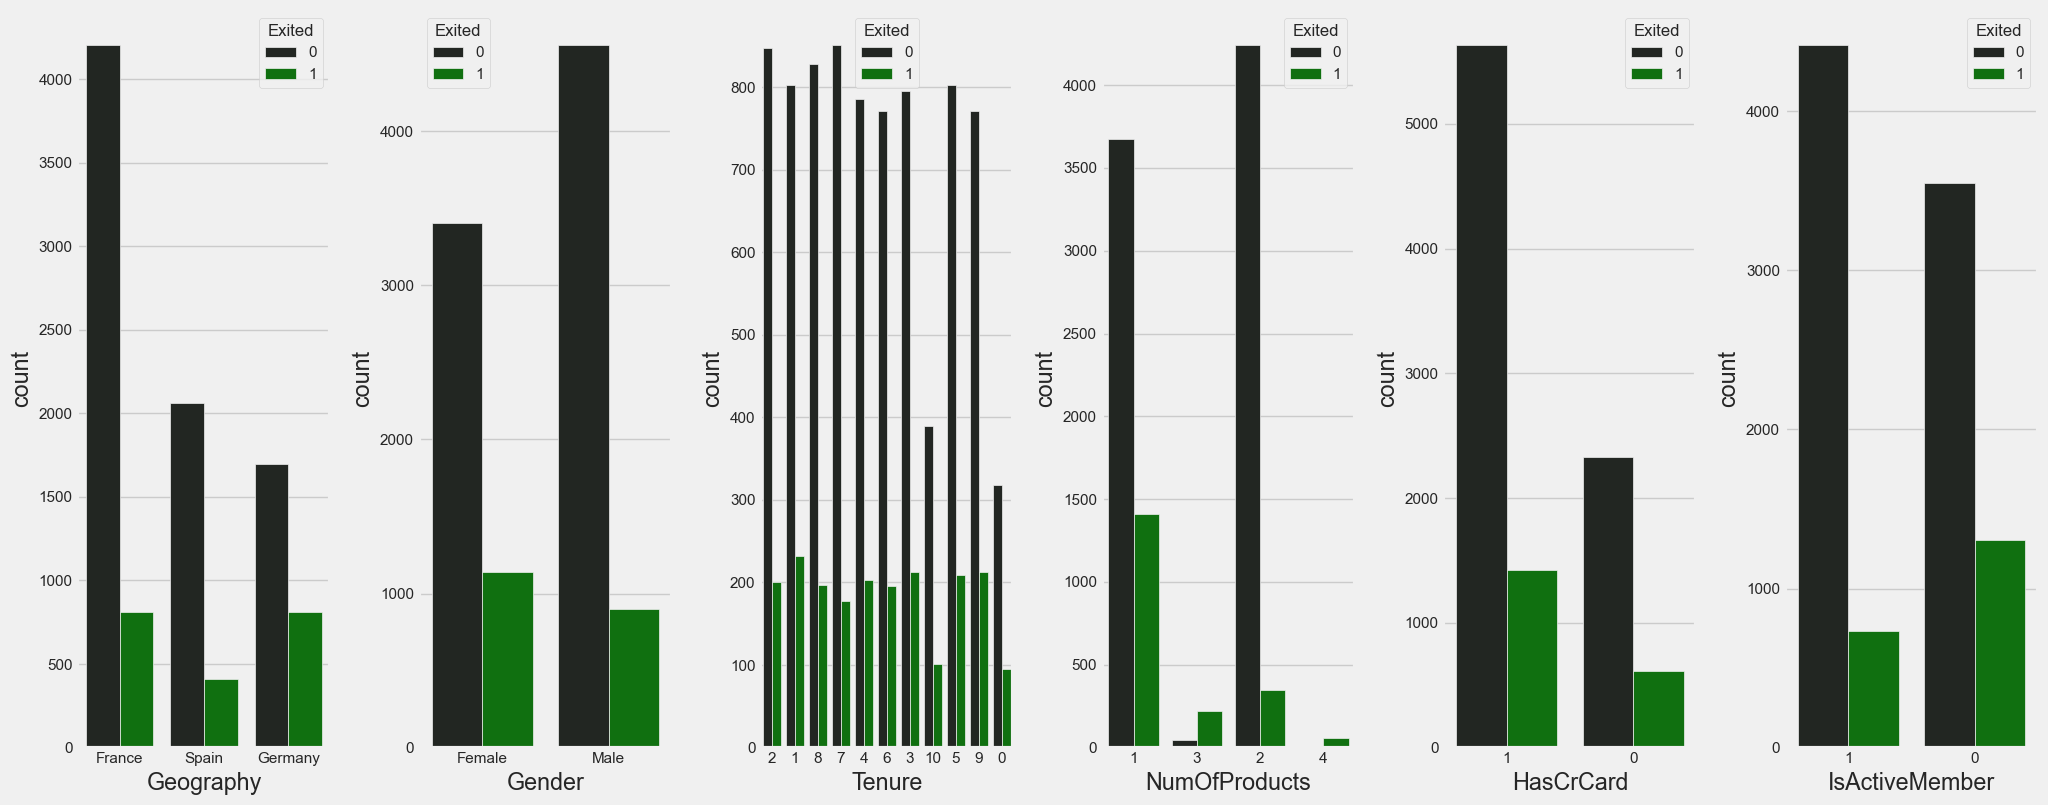

In [ ]:
# Check the categorical data shape with countplot

cats = categorical[1:7]
features = cats
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.countplot(x = df_bank[cats[i]], hue = df_bank['Exited'], palette = 'dark:green')
    plt.tight_layout()

What could we get from all of these plot information?

- Geography feature has 3 locations and France is too dominant over the other two locations, hence this feature is looks like imbalanced but still tolerable for machine learning process.
- Gender feature has 2 values and both of them seems balance although Male customer is often appear in this dataset.
- Tenure feature has 10 values and mostly this feature values is balance to each others except 0 and 10 months but still tolerable for machine learning process.
- NumOfProducts has 2 values that so dominant over the others, hence this feature is imbalance and need to do some tweak for machine learning process.
- HasCrCard has 2 values and mostly customer has more credit card than not having any of it, hence this feature is imbalance and need to some tweak for machine learning process.
- IsActiveMember has 2 values and both of them is likely balance to each other, therefore it can perform well for machine learning process.
- Exited feature is our target variable and yet this variable is imbalance because mostly the customer is not churn for this training model, therefore we need to do some over/undersampling method (or using AUC score) so that the ML model can perform well.

### Multivariate Analysis

In [ ]:
# convert back to numerical

df_bank['Exited'] = df_bank['Exited'].astype('int64')
df_bank['Tenure'] = df_bank['Tenure'].astype('int64')
df_bank['NumOfProducts'] = df_bank['NumOfProducts'].astype('int64')

![image.png](attachment:af89b02d-fbfd-41fc-980b-b205cd2192f3.png)

#### Numerical Features Vs Numerical Features

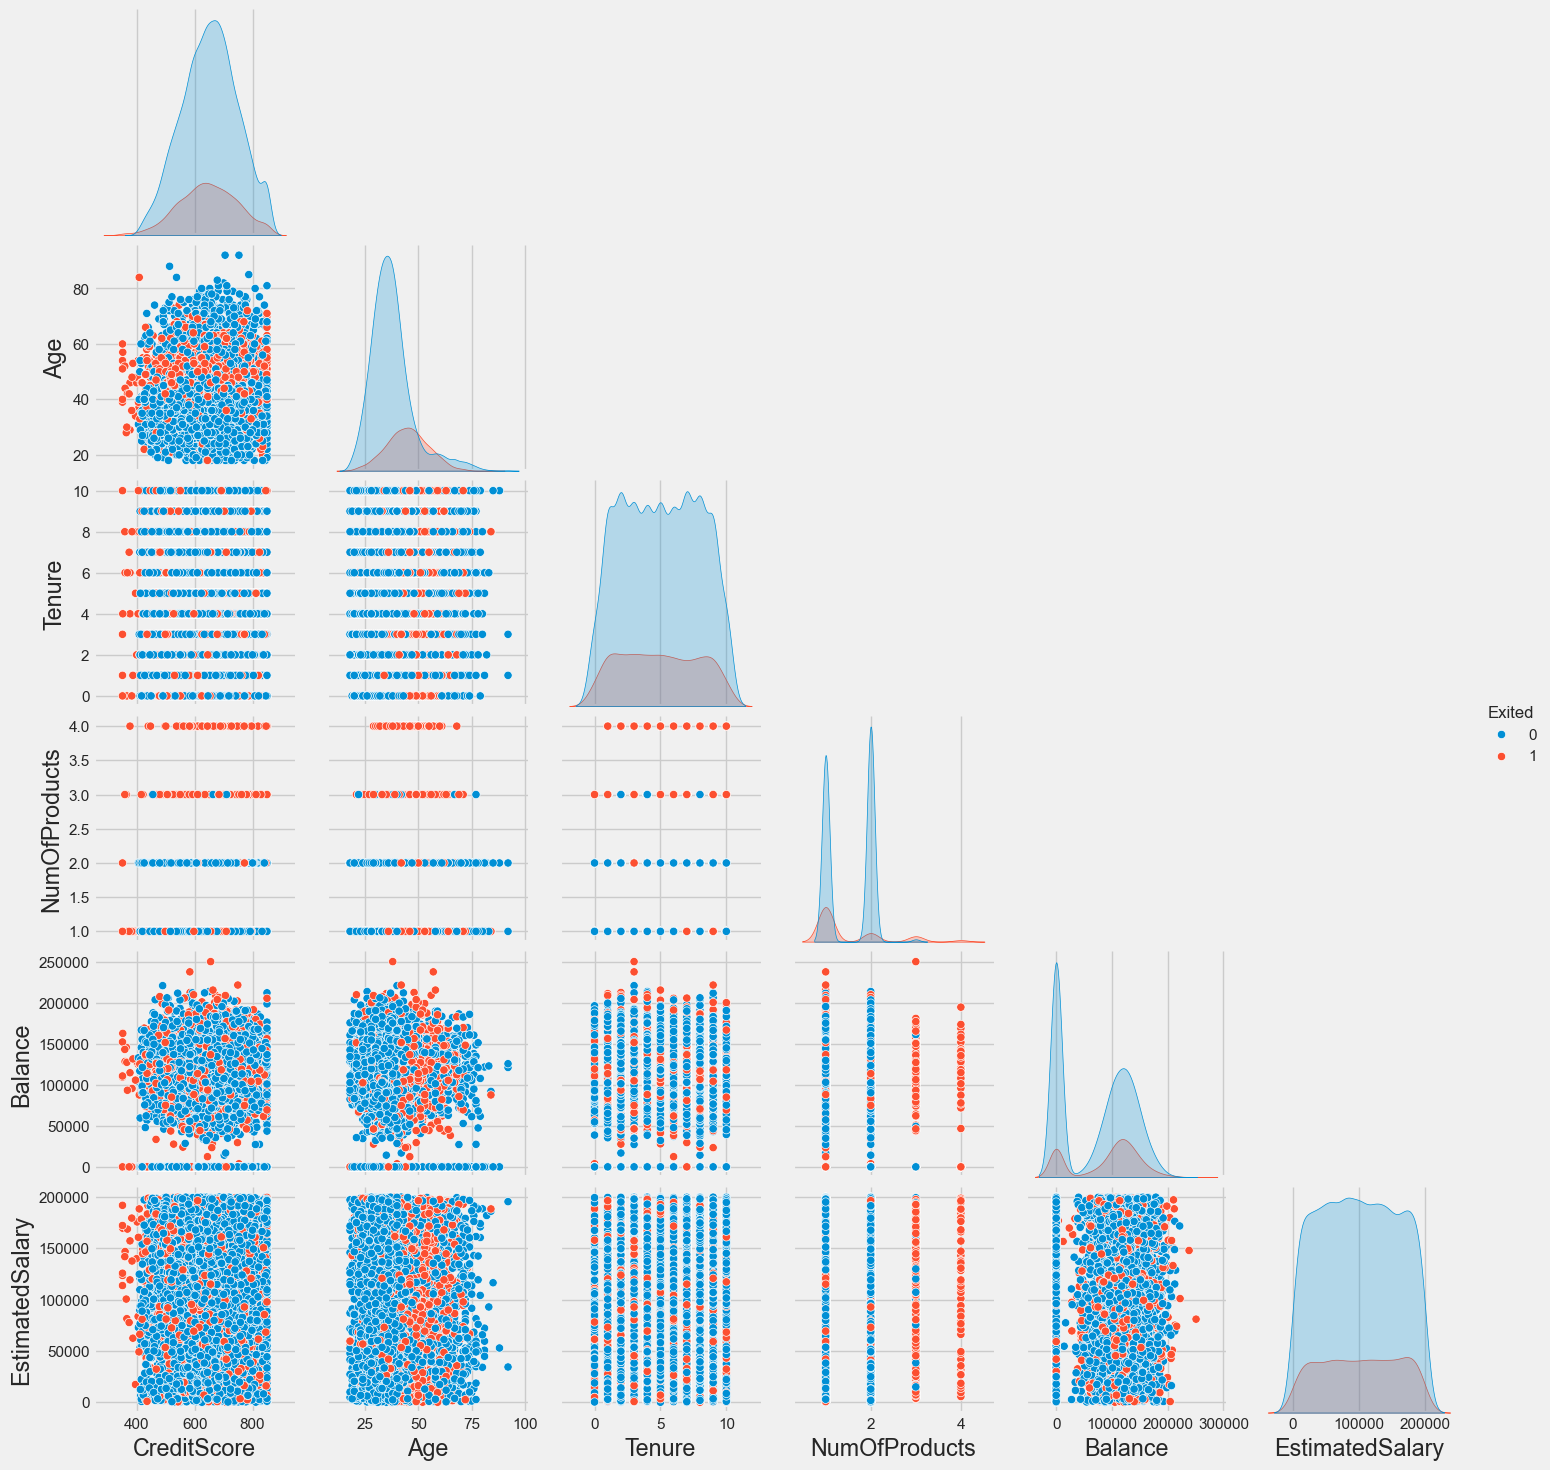

In [ ]:
# Checking if there is linearity or segmented (toward target) between numerical features

nums_df = df_bank[['CreditScore', 'Age', 'Tenure', 'NumOfProducts', 'Balance', 'EstimatedSalary', 'Exited']]
numerical = nums_df.columns
sns.pairplot(df_bank[numerical], diag_kind = 'kde', hue = 'Exited', corner = True)

What could we get from all of these information?

- By looking at the KDE plot, we don't see any segmented in the distribution between churned and non-churned customer. However, there is a difference on central tendency area only in Age feature.
- We also don't see any linearity (most likely uniform and non linear) in the distribution between churned and non-churned customer on all of multivariate analysis.
- Because of many features (except the Age feature on target variable) don't have specific segmented in their distribution, the ML model may decreasing its performance.

<Axes: >

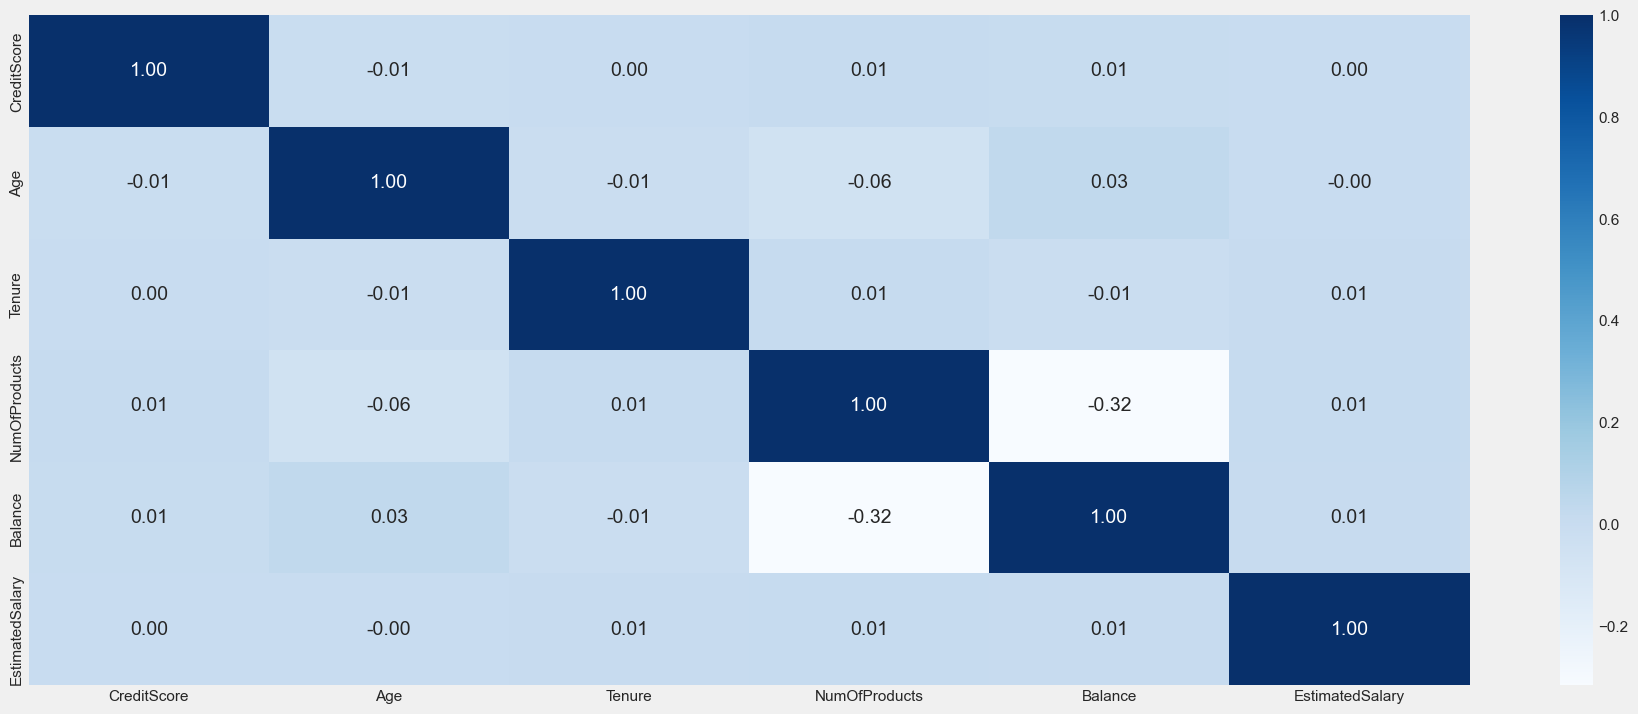

In [ ]:
# Checking correlation between each numerical feature for identifying multicolinearity

nums_df = df_bank[['CreditScore', 'Age', 'Tenure', 'NumOfProducts', 'Balance', 'EstimatedSalary']]
numerical = nums_df.columns
sns.heatmap(df_bank[numerical].corr(method = 'spearman'), cmap = 'Blues', annot = True, fmt = '.2f')

In [ ]:
### Checking multicollinearity by VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_select = df_bank[numerical]
vif_data = pd.DataFrame()
vif_data["feature"] = vif_select.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(vif_select.values, i)
                          for i in range(len(vif_select.columns))]

print(vif_data)

           feature        VIF
0      CreditScore  19.442916
1              Age  12.020539
2           Tenure   3.850015
3    NumOfProducts   7.658841
4          Balance   2.622428
5  EstimatedSalary   3.882556


What could we get from all of these information?

- All numerical features are more likely have weak correlation towards each other, because of their values are between 0 - 0.3.
- The increase of the amount of NumOfProducts tend to lower the customer's balance on their account.
- Based on the VIF, if the value is more than 5.0, then those feature is more likely have multicollinearity on them. Therefore, if we want to exclude them for modeling purposes, we can use VIF value as the parameter for feature selection.

#### Categorical Vs Categorical Features

In [ ]:
from sklearn.feature_selection import chi2

df_category = df_bank.copy()
df_category['country_cat'] = np.where(df_category.Geography == 'France', 1,
                                      np.where(df_category.Geography == 'Germany', 2, 3))
df_category['gender_cat'] = np.where(df_category.Gender == 'Male', 1, 2)
X = df_category.drop(columns = ['CreditScore', 'Age', 'Tenure', 'NumOfProducts', 'Balance', 'EstimatedSalary', 'Exited', 'RowNumber', 'CustomerId', 'Surname', 'Geography', 'Gender'])
y = df_category['Exited']
print(X.columns)
chi2(X,y)

Index(['HasCrCard', 'IsActiveMember', 'country_cat', 'gender_cat'], dtype='object')


(array([  0.15004097, 118.19941432,   5.06561353,  19.33943324]),
 array([6.98496209e-01, 1.56803624e-27, 2.44050652e-02, 1.09423082e-05]))

What could we get from all of these information?

pick the high p-values to drop the features (p > 0.05) because they are not statistically significant to be a predictor of the target, based on that, only HasCrCard feature who has p > 0.05 (p = 0.06).

#### Numerical Features Vs Categorical Features

In [ ]:
# compare 2 different categorical target features

df_churn = df_bank[df_bank.Exited == 1]
df_retain = df_bank[df_bank.Exited == 0]

import scipy.stats as st

nums_df = df_bank[['CreditScore', 'Age', 'Tenure', 'NumOfProducts', 'Balance', 'EstimatedSalary']]
numerical = nums_df.columns

for i in numerical:

    ttest = st.ttest_ind(a = df_churn[i], b = df_retain[i])
    pvalue = ttest.pvalue

    if pvalue >= 0.05:
        print(f'Feature {i} --> Accept H0, we do not have sufficient evidence to say that the mean {i} between the two data groups is different\n')
    else:
        print(f'Feature {i} --> Accept H1, we do have sufficient evidence to say that the mean {i} between the two data groups is different\n')

Feature CreditScore --> Accept H1, we do have sufficient evidence to say that the mean CreditScore between the two data groups is different

Feature Age --> Accept H1, we do have sufficient evidence to say that the mean Age between the two data groups is different

Feature Tenure --> Accept H0, we do not have sufficient evidence to say that the mean Tenure between the two data groups is different

Feature NumOfProducts --> Accept H1, we do have sufficient evidence to say that the mean NumOfProducts between the two data groups is different

Feature Balance --> Accept H1, we do have sufficient evidence to say that the mean Balance between the two data groups is different

Feature EstimatedSalary --> Accept H0, we do not have sufficient evidence to say that the mean EstimatedSalary between the two data groups is different



#### Numerical Features Vs Categorical Features (Checking their pattern)

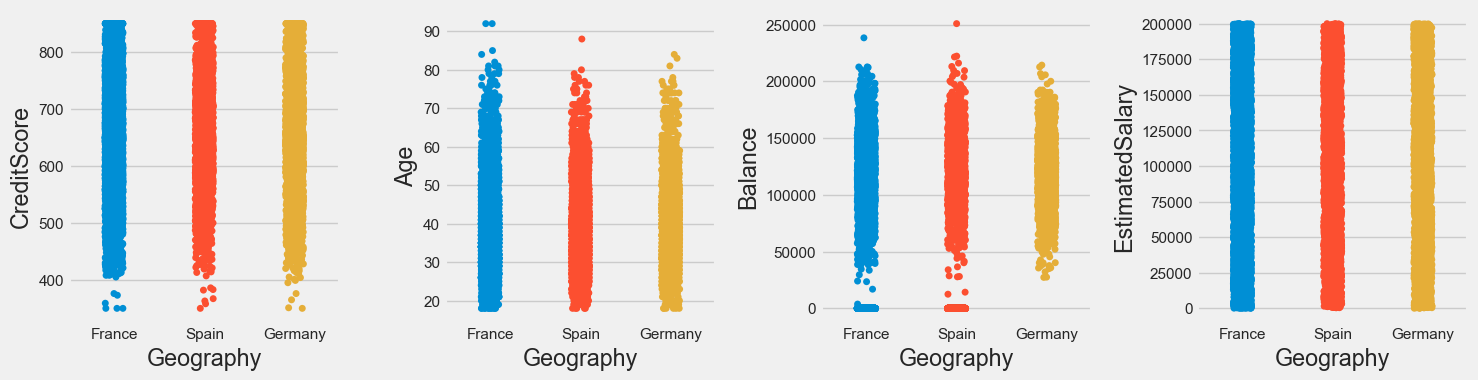

In [ ]:
# Checking the distribution data for Geography feature with numerical feature

fig = plt.figure(figsize=(15, 15))
nums = numerical[2:6]
for i in range(0, len(nums)):
    ax = fig.add_subplot(4, 4, i+1)
    sns.stripplot(ax=ax, data=df_bank, x='Geography', hue='Geography', y=nums[i])
    plt.tight_layout()

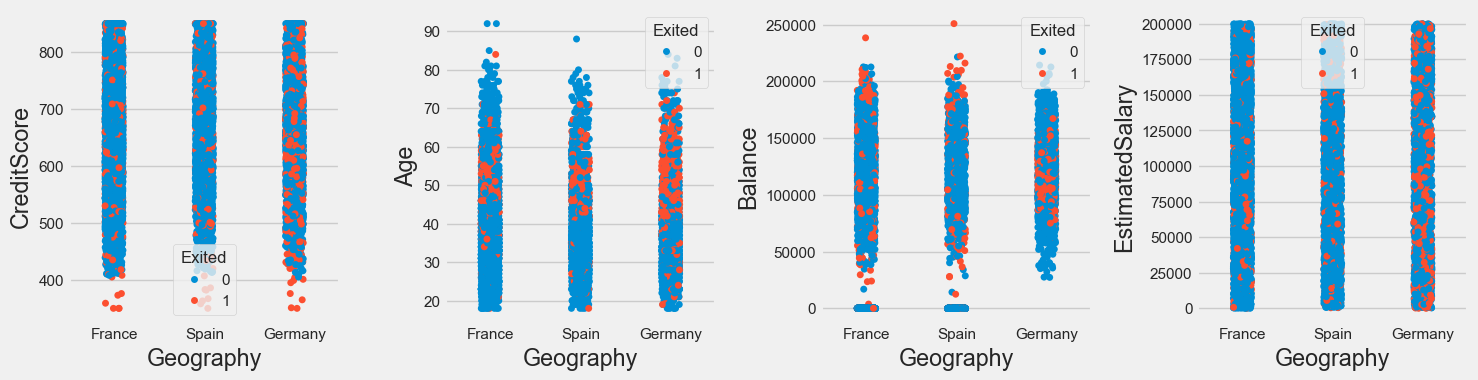

In [ ]:
# Checking the distribution data for geography feature with target variable

fig = plt.figure(figsize=(15, 15))
for i in range(0, len(nums)):
    ax = fig.add_subplot(4, 4, i+1)
    sns.stripplot(ax=ax, data=df_bank, x='Geography', hue='Exited', y=nums[i])
    plt.tight_layout()

What could we get from these information?

- Mostly each value inside the geography feature are having similiar distribution toward numerical features.
- Also similiar distribution for each value inside the geography feature toward target variable in multivariate analysis.

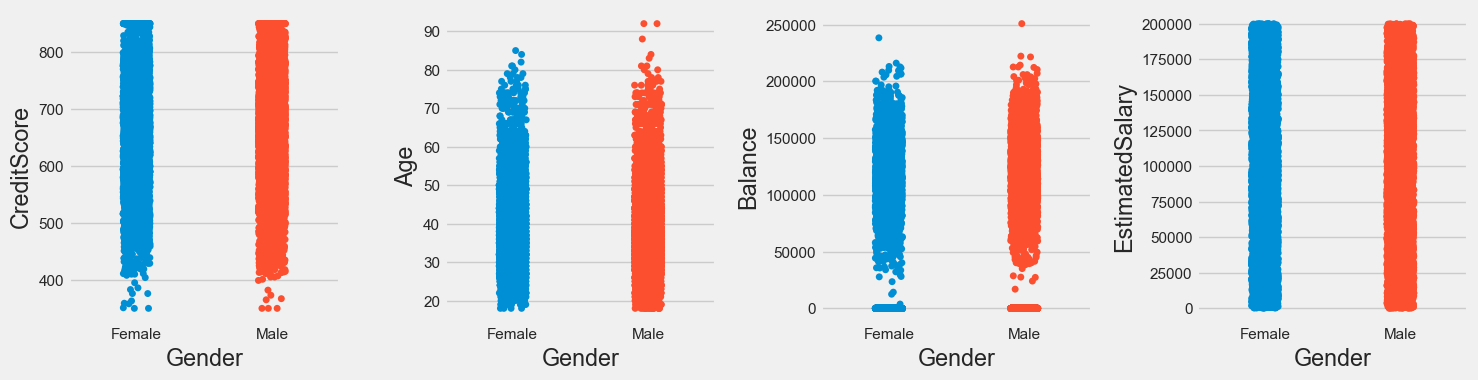

In [ ]:
# Checking the distribution data for Gender feature with numerical feature

fig = plt.figure(figsize=(15, 15))
for i in range(0, len(nums)):
    ax = fig.add_subplot(4, 4, i+1)
    sns.stripplot(ax=ax, data=df_bank, x='Gender', hue='Gender', y=nums[i])
    plt.tight_layout()

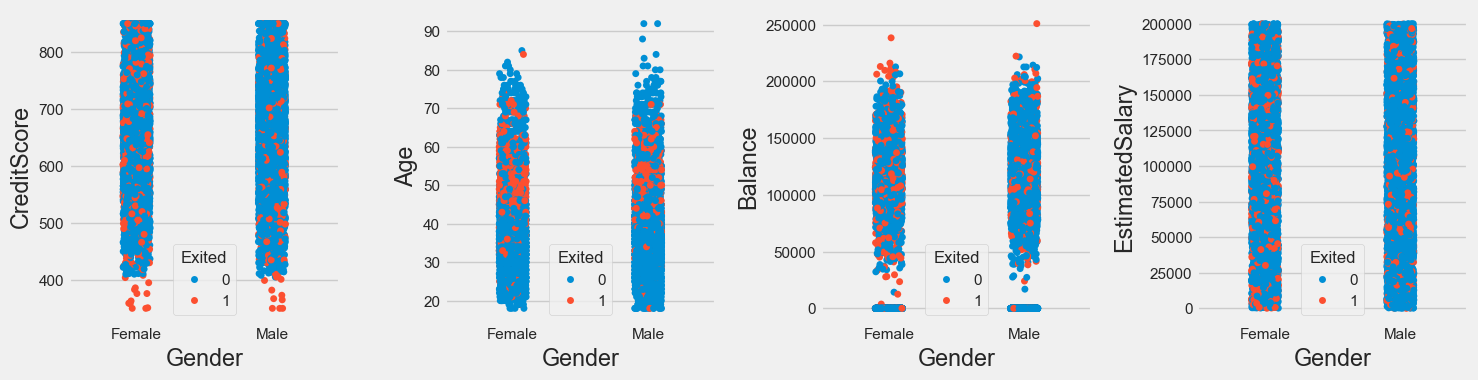

In [ ]:
# Checking the distribution data for Gender feature with target variable

fig = plt.figure(figsize=(15, 15))
for i in range(0, len(nums)):
    ax = fig.add_subplot(4, 4, i+1)
    sns.stripplot(ax=ax, data=df_bank, x='Gender', hue='Exited', y=nums[i])
    plt.tight_layout()

What could we get from these information?

- Each value inside the gender feature are having similiar distribution toward numerical features.
- Also similiar distribution for each value inside the gender feature toward target variable in multivariate analysis.

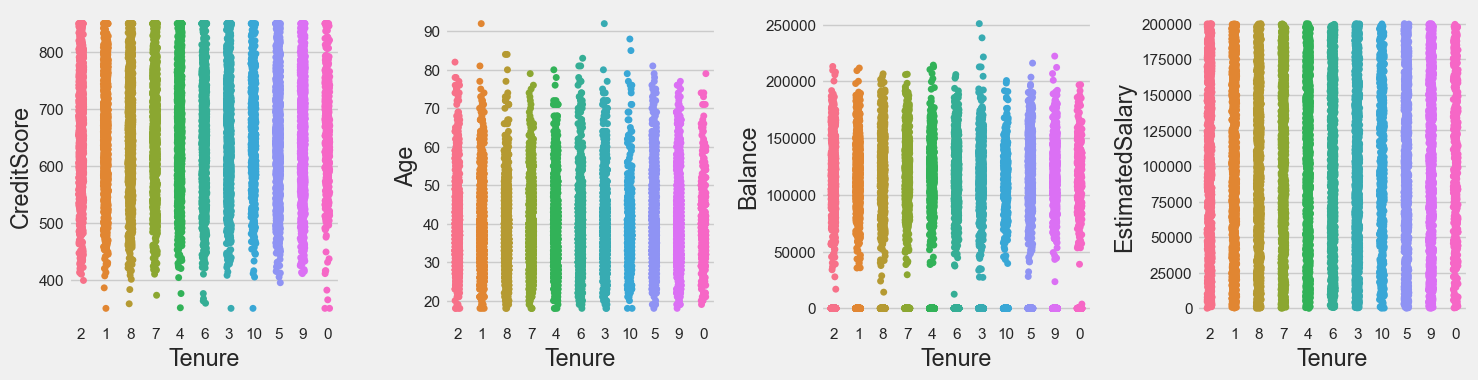

In [ ]:
# Checking the distribution data for Tenure feature with numerical feature

fig = plt.figure(figsize=(15, 15))
for i in range(0, len(nums)):
    ax = fig.add_subplot(4, 4, i+1)
    sns.stripplot(ax=ax, data=df_bank, x='Tenure', hue='Tenure', y=nums[i])
    plt.tight_layout()

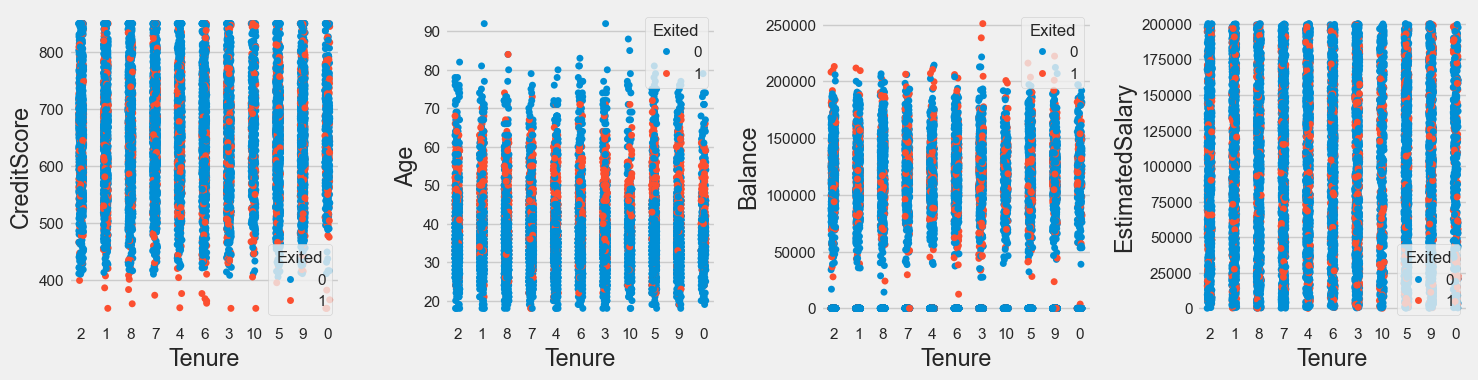

In [ ]:
# Checking the distribution data for Tenure feature with target variable

fig = plt.figure(figsize=(15, 15))
for i in range(0, len(nums)):
    ax = fig.add_subplot(4, 4, i+1)
    sns.stripplot(ax=ax, data=df_bank, x='Tenure', hue='Exited', y=nums[i])
    plt.tight_layout()

What could we get from these information?

- Each value inside the tenure feature are having similiar distribution toward numerical features.
- Also similiar distribution for each value inside the tenure feature toward target variable in multivariate analysis.

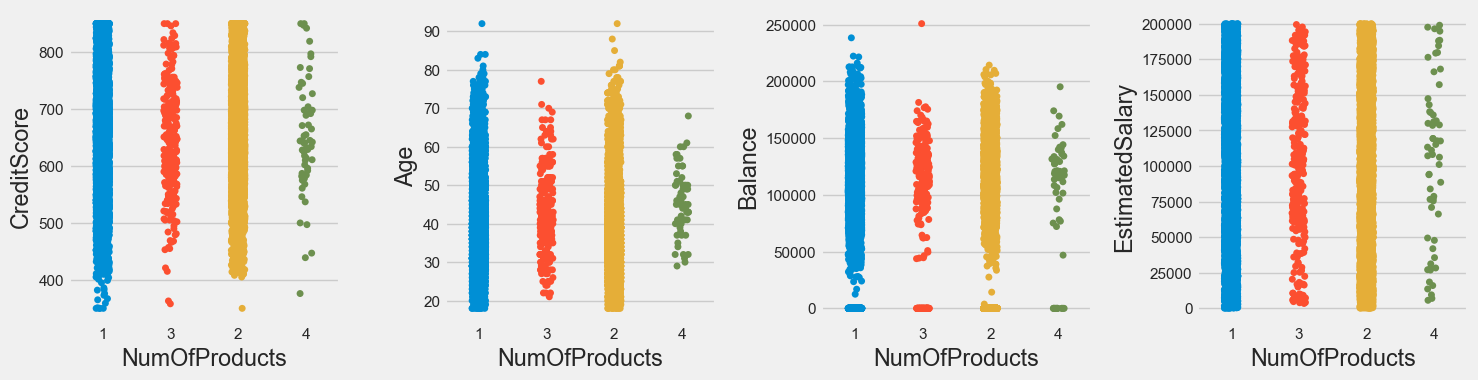

In [ ]:
# Checking the distribution data for NumOfProducts feature with numerical feature

fig = plt.figure(figsize=(15, 15))
for i in range(0, len(nums)):
    ax = fig.add_subplot(4, 4, i+1)
    sns.stripplot(ax=ax, data=df_bank, x='NumOfProducts', hue='NumOfProducts', y=nums[i])
    plt.tight_layout()

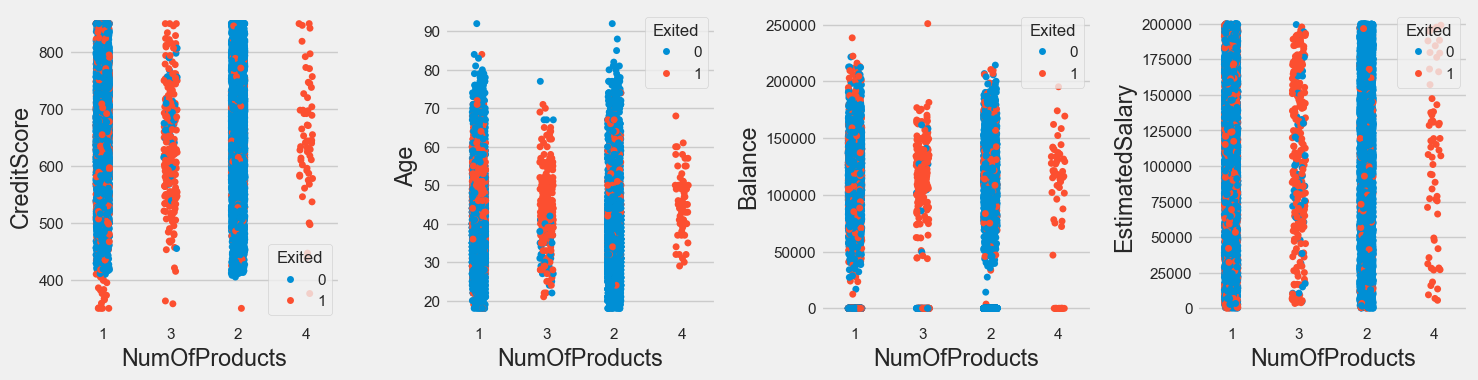

In [ ]:
# Checking the distribution data for NumOfProducts feature with target variable

fig = plt.figure(figsize=(15, 15))
for i in range(0, len(nums)):
    ax = fig.add_subplot(4, 4, i+1)
    sns.stripplot(ax=ax, data=df_bank, x='NumOfProducts', hue='Exited', y=nums[i])
    plt.tight_layout()

What could we get from these information?

- Each value inside the NumOfProducts feature are having similiar distribution toward numerical features.
- There are segmented distribution with value more than 2 products toward target variable in multivariate analysis.

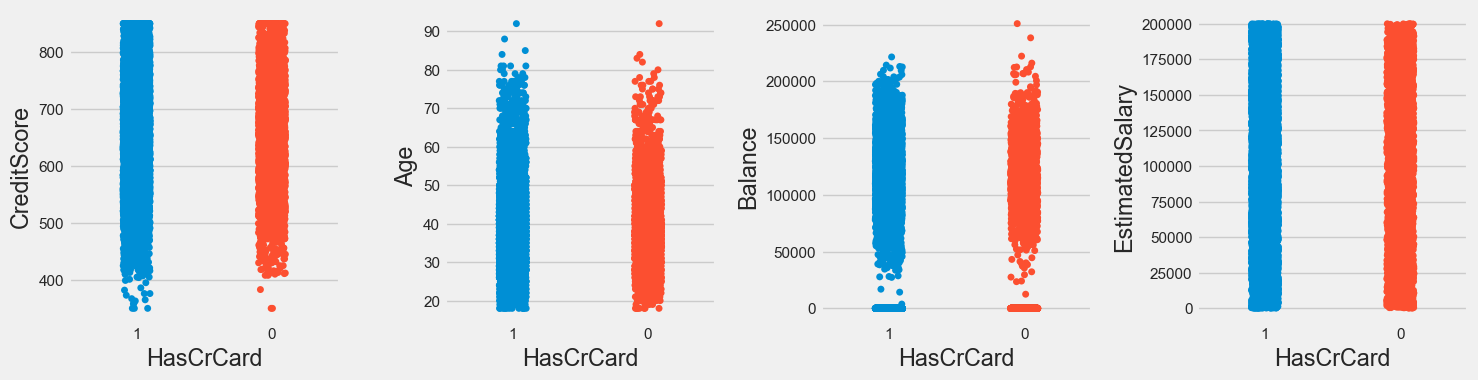

In [ ]:
# Checking the distribution data for HasCrCard feature with numerical feature

fig = plt.figure(figsize=(15, 15))
for i in range(0, len(nums)):
    ax = fig.add_subplot(4, 4, i+1)
    sns.stripplot(ax=ax, data=df_bank, x='HasCrCard', hue='HasCrCard', y=nums[i])
    plt.tight_layout()

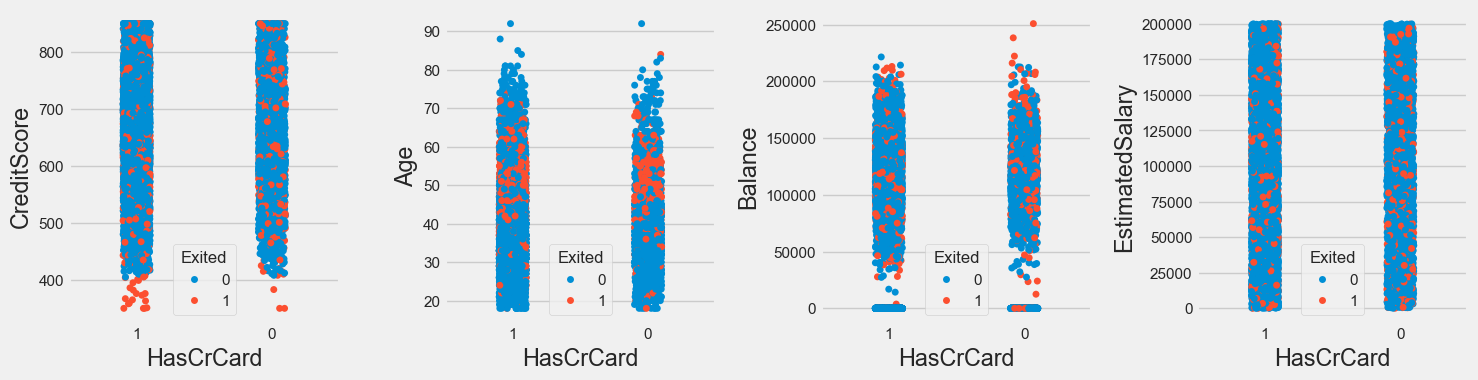

In [ ]:
# Checking the distribution data for HasCrCard feature with target variable

fig = plt.figure(figsize=(15, 15))
for i in range(0, len(nums)):
    ax = fig.add_subplot(4, 4, i+1)
    sns.stripplot(ax=ax, data=df_bank, x='HasCrCard', hue='Exited', y=nums[i])
    plt.tight_layout()

What could we get from these information?

- Each value inside the HasCrCard feature are having similiar distribution toward numerical features.
- Also similiar distribution for each value inside the HasCrCard feature toward target variable in multivariate analysis.

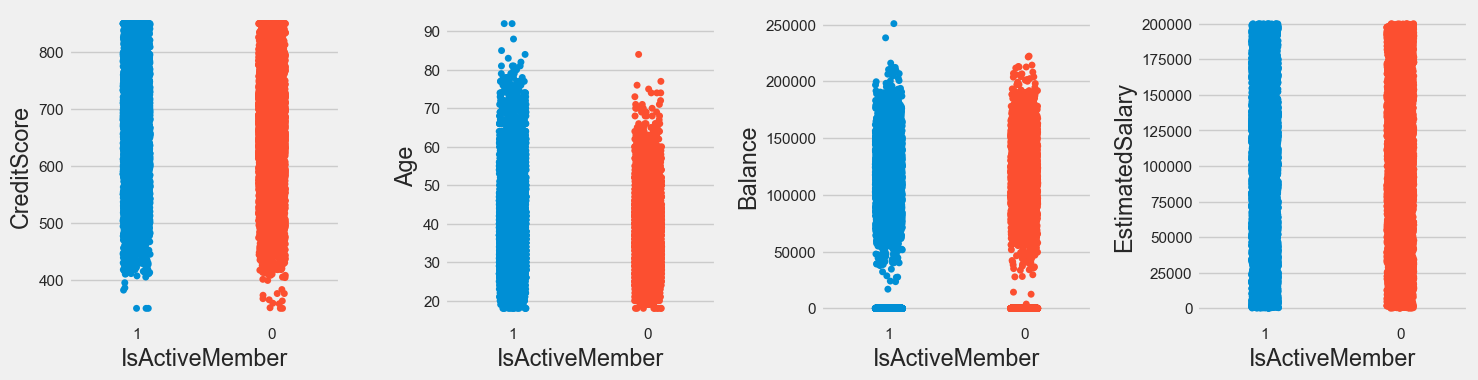

In [ ]:
# Checking the distribution data for IsActiveMember feature with numerical feature

fig = plt.figure(figsize=(15, 15))
for i in range(0, len(nums)):
    ax = fig.add_subplot(4, 4, i+1)
    sns.stripplot(ax=ax, data=df_bank, x='IsActiveMember', hue='IsActiveMember', y=nums[i])
    plt.tight_layout()

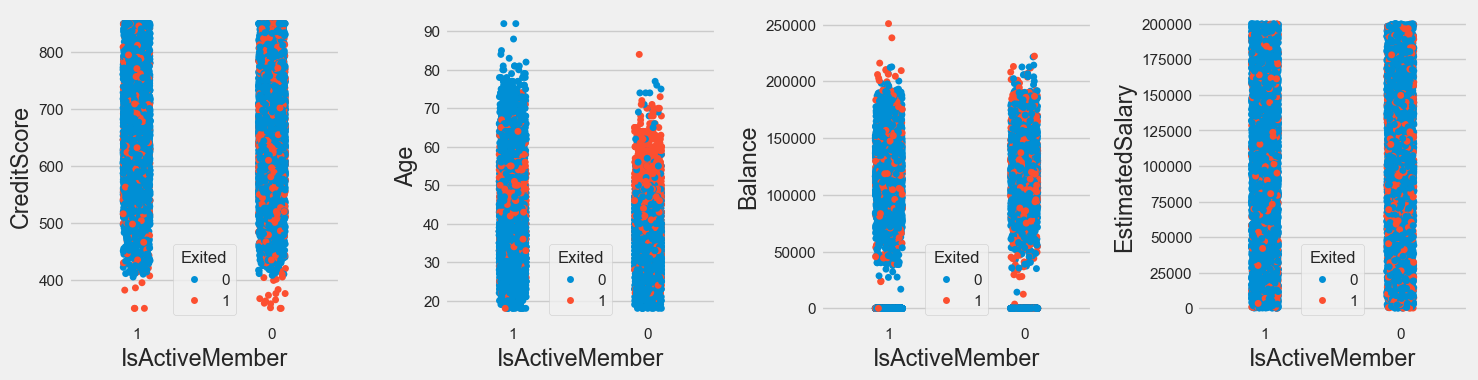

In [ ]:
# Checking the distribution data for IsActiveMember feature with target variable

fig = plt.figure(figsize=(15, 15))
for i in range(0, len(nums)):
    ax = fig.add_subplot(4, 4, i+1)
    sns.stripplot(ax=ax, data=df_bank, x='IsActiveMember', hue='Exited', y=nums[i])
    plt.tight_layout()

What could we get from these information?

- Each value inside the IsActiveMember feature are having similiar distribution toward numerical features.
- Also similiar distribution for each value inside the IsActiveMember feature toward target variable in multivariate analysis.

### Initial EDA Conclusion

From all the results of initial EDA analysis, we could do some data pre-processing (i.e data cleansing) for the purpose to gain business insight and preparing the training dataset for ML model.

- Removing some irrelevant features for ML model such as rownumbers, CustomerID (needed for business insight), and Surname.
- Checking if theres any duplicate data inside of it.
- Doing some feature engineering to increase the complexity that may increasing the model performance.
- Do feature encoding for categorical feature with one-hot encoding on Gender feature and label encoding on Geography feature.
- Separating the data into data train and data test with split train or K-Fold cross validation.
- Should we handle the outliers for the CreditScore and Age features?
- Do some data scaling for ML model on CreditScore feature with normalization, Balance feature with normalization/standardization and EstimatedSalary feature with log-transformation.
- Do over/undersampling for handling imbalance data on target variable (Exited) or using AUC score.
- Do feature selection for model evaluation (if any) by using the EDA analysis as the parameter for feature selection such as how is their VIF value, statistic test, or using automatic library from scikit-learn to choose them.

## Exploratory Data Analysis (Business Insight)

>All of the business insight we did in here are using another tools such as Looker so that the visualization results is more clear and better to represent the insight.

### EDA

#### Proportion of Churned Customer Vs Retained Customer

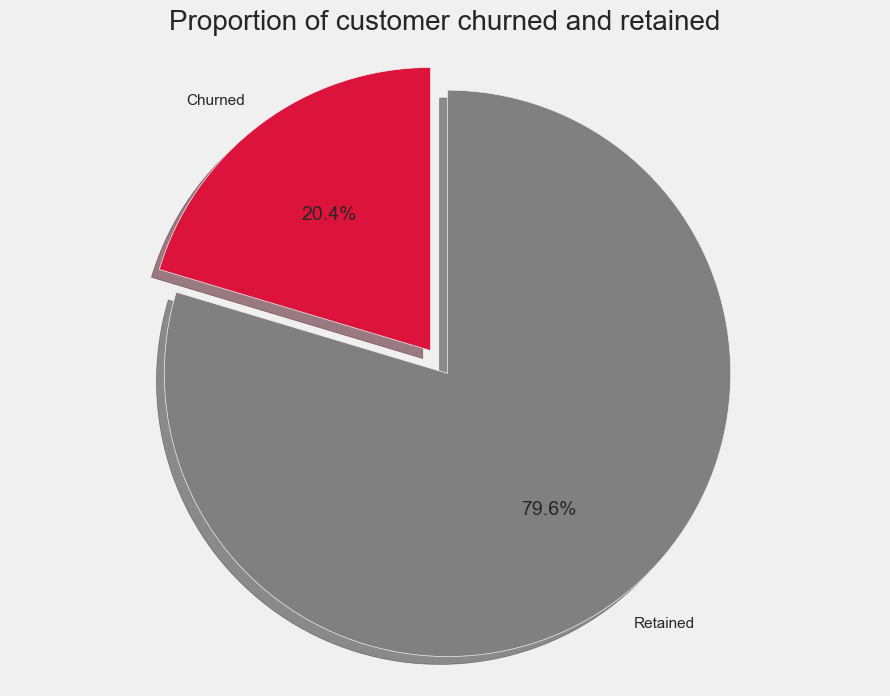

In [ ]:
labels = 'Churned', 'Retained'
sizes = [df_bank.Exited[df_bank['Exited']==1].count(), df_bank.Exited[df_bank['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, colors = ['Crimson', 'Grey'])
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 20)
plt.show()

Insight:

There are approximately 20% customer who don't use the bank product anymore.

#### Total Customer by Credit Score

![image.png](attachment:f9987bf9-771e-4c86-8dda-960d452d6581.png)

Insight:

All of the credit score group have churned customer inside of it with 45% of them are majority came from bad credit group. <br>
There is a potential that churning will appear again because there are still many retained customer but got a bad credit score.

#### Total Customer by Country

![image.png](attachment:90827966-ea01-4f96-a8b0-7d02b4d5971a.png)

Insight:

With a total of 80% churned customer came from France and Germany, the bank need to keep the retained customer that came from those same country so that they don't migrate into churning.

#### Total Customer by Gender

![image.png](attachment:040d50c7-7ba2-4ef9-affb-7459a7ffe852.png)

Insight:

56% churned customer came from female. However the bank also need to pay attention to the male customer because they get the most contribute for the retained customer.

#### Total Customer by Generation

![image.png](attachment:cb9834ca-b6c9-4841-89e9-59a2ef8bb451.png)

Insight:
    
86% churned customer came from generation millennials and generation X. The bank need to keep those generation who are still using their product, especially the one with generation millennials.

#### Total Customer by Tenure

![image.png](attachment:6d1711b6-d7be-4fba-8fea-3d5f4ffd0139.png)

Insight:
    
There are no specific reason by which tenure segment that mostly affecting churned customer.

#### Total Customer by Balance

![image.png](attachment:d22079f5-59e2-4fbc-802d-ff4341157149.png)

Insight:

61% churned customer came from those who had mid-high balance on their bills. The bank need to keep those who still remained using their product but with the same balance like churned customer.

#### Total Customer by Owned Product

![image.png](attachment:e2448822-b27b-4bd1-ad6e-c2ee3541f731.png)

Insight:

69% of churned customer because they only own one type product. The quality of the bank's product need to be questioned.

#### Total Customer by Owned Credit Card

![image.png](attachment:8d230b96-c5ba-4e12-98f2-0267d0f0b10b.png)

Insight:

70% churned customer surprisingly have the credit card on their account. The quality of those card need to be questioned.

#### Total Customer by Activity

![image.png](attachment:7e9d86f1-4856-48ff-a4d4-2e4027b4f9f9.png)

Insight:

64% of churned customer not actively doing transaction on their last time. Need to dig deeply the reason why they don't actively doing transaction last time.

#### Total Customer by Salary

![image.png](attachment:8363692b-c6eb-41e6-9e88-2205894a9165.png)

Insight:

There are no specific reason by which salary segment that mostly affecting churned customer.

#### Total Churned Vs Retained Customer by Gender-Activity

![image.png](attachment:fadc87b1-bb9d-48f4-b3c2-dd0f0fe28be4.png)

Insight:

Whether its the churned or retained customer, male is the majority class that contained inside two of them. However, if we looking at their activity, the proportion between the active and inactive is likely same.<br>
Therefore, the marketing team can focus making a new strategy on both gender but different status activity.

#### Total Churned Customer by Generation

![image.png](attachment:0867237c-5df2-463a-9e91-47a2e0030490.png)

Insight:

Based on pareto principle, more than 80% of churned customer came form generation millenials and generation X. We suggest that the marketing team need to focus making a new strategy for those two generation.

#### Total Churned Customer by Balance in Millennials and Gen X

![image.png](attachment:37fe2e28-913c-41a3-9661-9d342d710406.png)

Insight:

53% churned customer from those generations have the balance range around mid and high amount balance. Therefore, marketing team need to creating a new strategy with those balance group.

#### Total Churned Vs Retained Customer by Activity in Millennials and Gen X

![image.png](attachment:3e5bee7b-27b8-4c51-8264-f18063512709.png)

Insight:

We can see the reason why there are churned customer that came from those generations is because mostly they inactively doing transactions on their last time.<br>

The worst case is, it can happen again if marketing team don't plan the good strategy for preventing the retained customer becoming churn.<br>

We suggest that marketing team creating strategy plan with two ways i.e. those that are for active retained customer and inactive retained customer.

#### Total Customer by Credit Card in Millennials and Gen X

![image.png](attachment:38f203ab-6c78-402e-8275-bf659d54d2e8.png)

Insight:

60% churned customer that came from those generations have credit card. Therefore we suggest to check out their credit card score.

#### Total Customer by Credit Score in Millennials and Gen X

![image.png](attachment:52e10b8a-0a28-4eda-ae34-ed9ce9fa8c61.png)

Insight:

38% churned customer that came from those generations have bad credit score on their accounts. We suggest marketing team need to prevent those with the same credit score but still remain using our product.

#### Total Customer by Country in Millennials and Genx with Bad Credit Score

![image.png](attachment:e440846b-cf66-48c7-a4ff-ceed637cd7b5.png)

Insight:

Mostly churned customer that came from those generation with bad credit score happened around France and Germany. We suggest to do some investigate or research about their lifestyle.

#### Total Customer by Owned Product in Millennials and Gen X with Bad Credit Score

![image.png](attachment:d83d6a79-bf38-466a-8b53-03eab81b1d93.png)

Insight:

Mostly churned customer that came from those generations with bad credit score happened to those who only use single product. Marketing team need to create some strategy so that the remaining customer also don't only use one product.

### Conclusion

>1. 20% Customer was churned.
2. 45% churned customer have bad credit score.
3. 80% churned customer came from France and Germany.
4. Ratio of churned customer between Male and Female is 44%-56%.
5. 86% of churned customer came from Millennials and Gen X.
6. 61% of churned customer had mid and high amount of balance.
7. 69% of churned customer only own 1 product.
8. 70% of churned customer had credit card.
9. 64% of churned customer were inactive.

> Some addition of valuable insight;
>1. Ratio between active and inactive customer are 56:44.
2. 86% of churned customer came from Millennials and Gen X.
3. Their generation had mid and high amount of balance.
4. Their generation churned because mostly inactive.
5. Their generation had credit card.
6. However, they had bad credit score.
7. Probably because they only own 1 product.

## Data Cleansing

### Removing Irrelevant Feature (Part 1)

In [ ]:
df_bank = df_bank.drop(columns = ['RowNumber'])

Removing rownumber feature to see if there is any duplicate in our data

### Check Dupliacte (Part 1)

In [ ]:
df_bank.duplicated().any()

False

there are no duplicated data in our data

### Removing Irrelevant Feature (Part 2)

In [ ]:
df_bank = df_bank.drop(columns = ['CustomerId', 'Surname'])

Removing customerId and surname features because those are not relevant for our modeling

### Handling Missing Value

In [ ]:
df_bank.isnull().any()

CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

In [ ]:
# checking if there is any irrelevant values in categorical features

print(df_bank.Geography.value_counts())
print(df_bank.Gender.value_counts())

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64
Gender
Male      5457
Female    4543
Name: count, dtype: int64


There are no missing values on each feature and all values is relevant for categorical features.

### Feature Encoding

In [ ]:
cats_updated = ['Geography', 'Gender']

for col in cats_updated:
  print(f'value counts of column {col}')
  print(df_bank[col].value_counts())
  print('---'*10, '\n')

value counts of column Geography
Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64
------------------------------ 

value counts of column Gender
Gender
1    5457
0    4543
Name: count, dtype: int64
------------------------------ 



We have 2 categorical features, one is geography that have 3 unique values while the other is gender that have 2 unique values but non ordinal data. <br>
therefore, we will use one-hot encoding on geography feature and label encoding on gender feature.

In [ ]:
# convert Gender feature from categorical into numerical by using label encoding

mapping_gender = {
    'Female' : 0,
    'Male' : 1
}

df_bank['Gender'] = df_bank['Gender'].map(mapping_gender)

In [ ]:
# convert Geography feature from categorical into numerical by using one-hot encoding

from sklearn.preprocessing import OneHotEncoder

## Converting type of columns to category

df_bank['Geography'] = df_bank['Geography'].astype('category')
# df_bank['Gender'] = df_bank['Gender'].astype('category')

## Assigning numerical values and storing it in another columns

df_bank['Geo_new'] = df_bank['Geography'].cat.codes
# df_bank['Gender_new'] = df_bank['Gender'].cat.codes

## Create an instance of One-hot-encoder

enc = OneHotEncoder()

## Passing encoded columns

enc_data = pd.DataFrame(enc.fit_transform(
    df_bank[['Geo_new']]).toarray())

## Merge with main

df_bank = df_bank.join(enc_data)

## rename the column

df_bank = df_bank.rename(columns={0 : "is_France", 1 : "is_Germany", 2 : "is_Spain"})

## drop irrelevant column

df_bank = df_bank.drop(columns = ['Geography', 'Geo_new']) #, 'Gender', 'Gender_new'])

## show the result

df_bank.head(1)

CreditScore  Gender  Age  Tenure  Balance  NumOfProducts  HasCrCard  \
0          619       0   42       2      0.0              1          1   

   IsActiveMember  EstimatedSalary  Exited  is_France  is_Germany  is_Spain  
0               1        101348.88       1        1.0         0.0       0.0

In [ ]:
# Checking the significant of new feature encoding to the target by using chi2 statistic test (categorical vs categorical)

X = df_bank.drop(columns = ['CreditScore', 'Age', 'Tenure', 'NumOfProducts', 'Balance', 'EstimatedSalary', 'Exited'])
y = df_bank['Exited']
print(X.columns)
chi2(X,y)

Index(['Gender', 'HasCrCard', 'IsActiveMember', 'is_France', 'is_Germany',
       'is_Spain'],
      dtype='object')


(array([5.15399263e+01, 1.50040970e-01, 1.18199414e+02, 5.49237052e+01,
        2.25464426e+02, 2.08672058e+01]),
 array([7.01557451e-13, 6.98496209e-01, 1.56803624e-27, 1.25300579e-13,
        5.81457176e-51, 4.92250487e-06]))

What could we get from all of these information?

pick the high p-values to drop the features (p > 0.05) because they are not statistically significant to be a predictor of the target, based on that, only HasCrCard feature who has p > 0.05 (p = 0.069).

<Axes: >

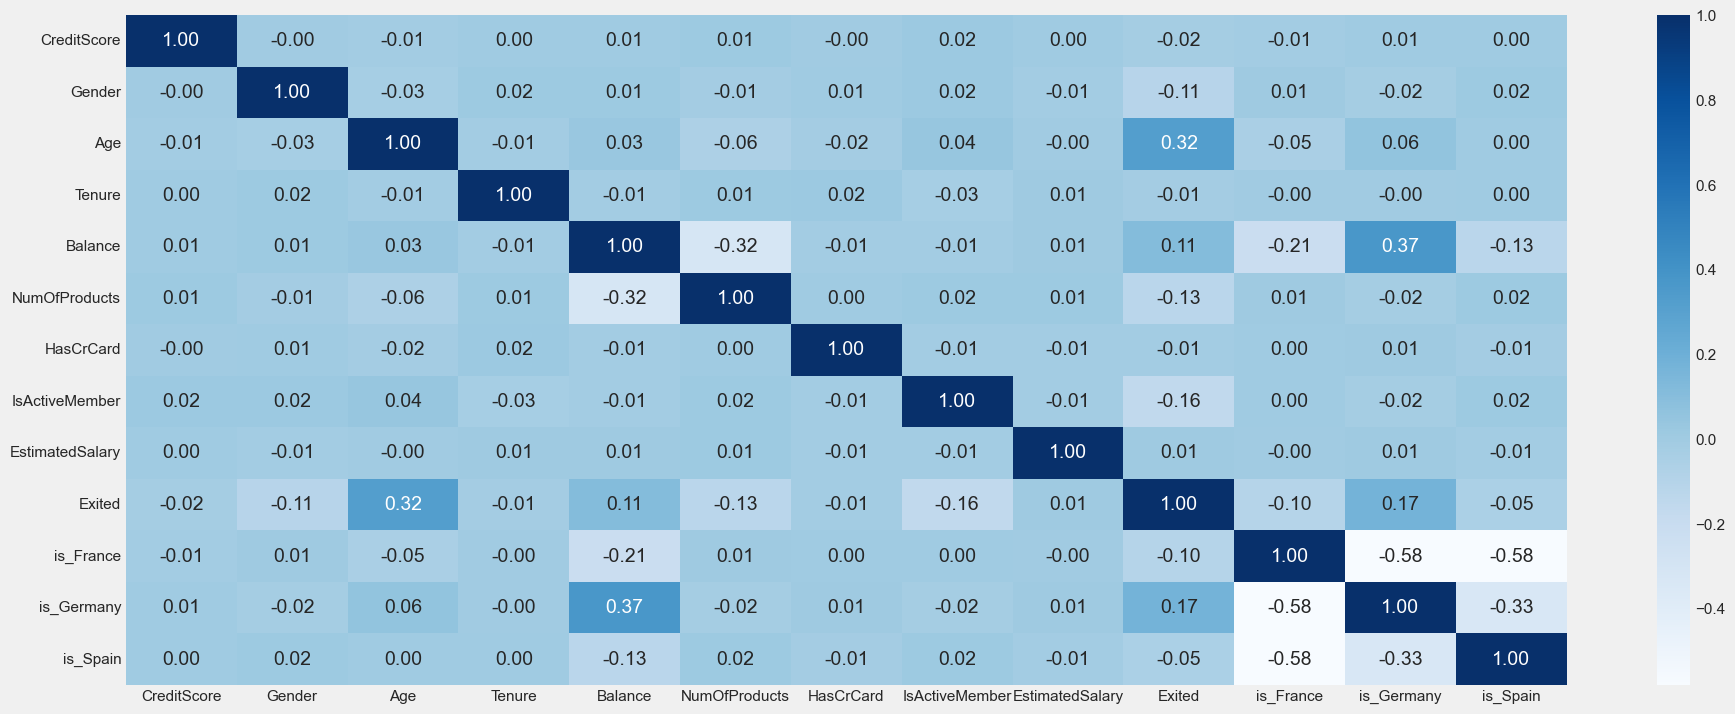

In [ ]:
## checking correlation by using spearman method

sns.heatmap(df_bank[df_bank.columns].corr(method = 'spearman'), cmap = 'Blues', annot = True, fmt = '.2f')

In [ ]:
### Checking multicollinearity by VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor

df_check = df_bank.copy()
df_check = df_check.drop(columns = ['Exited'])

vif_select = df_check
vif_data = pd.DataFrame()
vif_data["feature"] = vif_select.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(vif_select.values, i)
                          for i in range(len(vif_select.columns))]

print(vif_data)

            feature        VIF
0       CreditScore   1.001046
1            Gender   1.003207
2               Age   1.012064
3            Tenure   1.001935
4           Balance   1.336461
5     NumOfProducts   1.122391
6         HasCrCard   1.001580
7    IsActiveMember   1.010516
8   EstimatedSalary   1.000936
9         is_France  41.343153
10       is_Germany  22.800500
11         is_Spain  21.076547


Based on the VIF, if the value is more than 5.0, then those feature is more likely have multicollinearity on them.<br>
Therefore, if we want to exclude them for modeling purposes, we can use VIF value as the parameter for feature selection. <br>
If the model evaluation (F1 score) is overfitting, we will exclude the feature is_Spain.

### Feature Selection (If the model evaluation result is overfitting)

#### Manual - Feature Selection

In [ ]:
# backing plan for feature selection if the default model is overfit

df_bank2 = df_bank.copy()
df_bank2 = df_bank2.drop(columns = ['HasCrCard', 'Tenure', 'EstimatedSalary', 'is_Spain'])

#### Automatic - Using SelectKBest for Feature Selection if the model evaluation result is overfitting

In [ ]:
X = df_bank[['CreditScore', 'Age', 'Gender', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'is_France', 'is_Germany', 'is_Spain']]
y = df_bank['Exited']
from sklearn.feature_selection import SelectKBest, mutual_info_classif

X_new = SelectKBest(mutual_info_classif, k=10).fit(X, y)
X_new

SelectKBest(score_func=<function mutual_info_classif at 0x000001F731C3FCE0>)

In [ ]:
X_new.get_feature_names_out()

array(['CreditScore', 'Age', 'Gender', 'Tenure', 'Balance',
       'NumOfProducts', 'IsActiveMember', 'is_France', 'is_Germany',
       'is_Spain'], dtype=object)

### Feature Engineering (If the model evaluation result is undefitting)

We will use feature engineering also for the purpose of model evaluation if the default model is underfit.

We creating a new feature for new metric like balance per salary to see how they distribute their salary for saving the money on their account.

In [ ]:
## create a copy

df_bank_new = df_bank.copy()

# balance per salary

df_bank_new['BalanceperSalary'] = df_bank_new['Balance'] / df_bank_new['EstimatedSalary']

<Axes: >

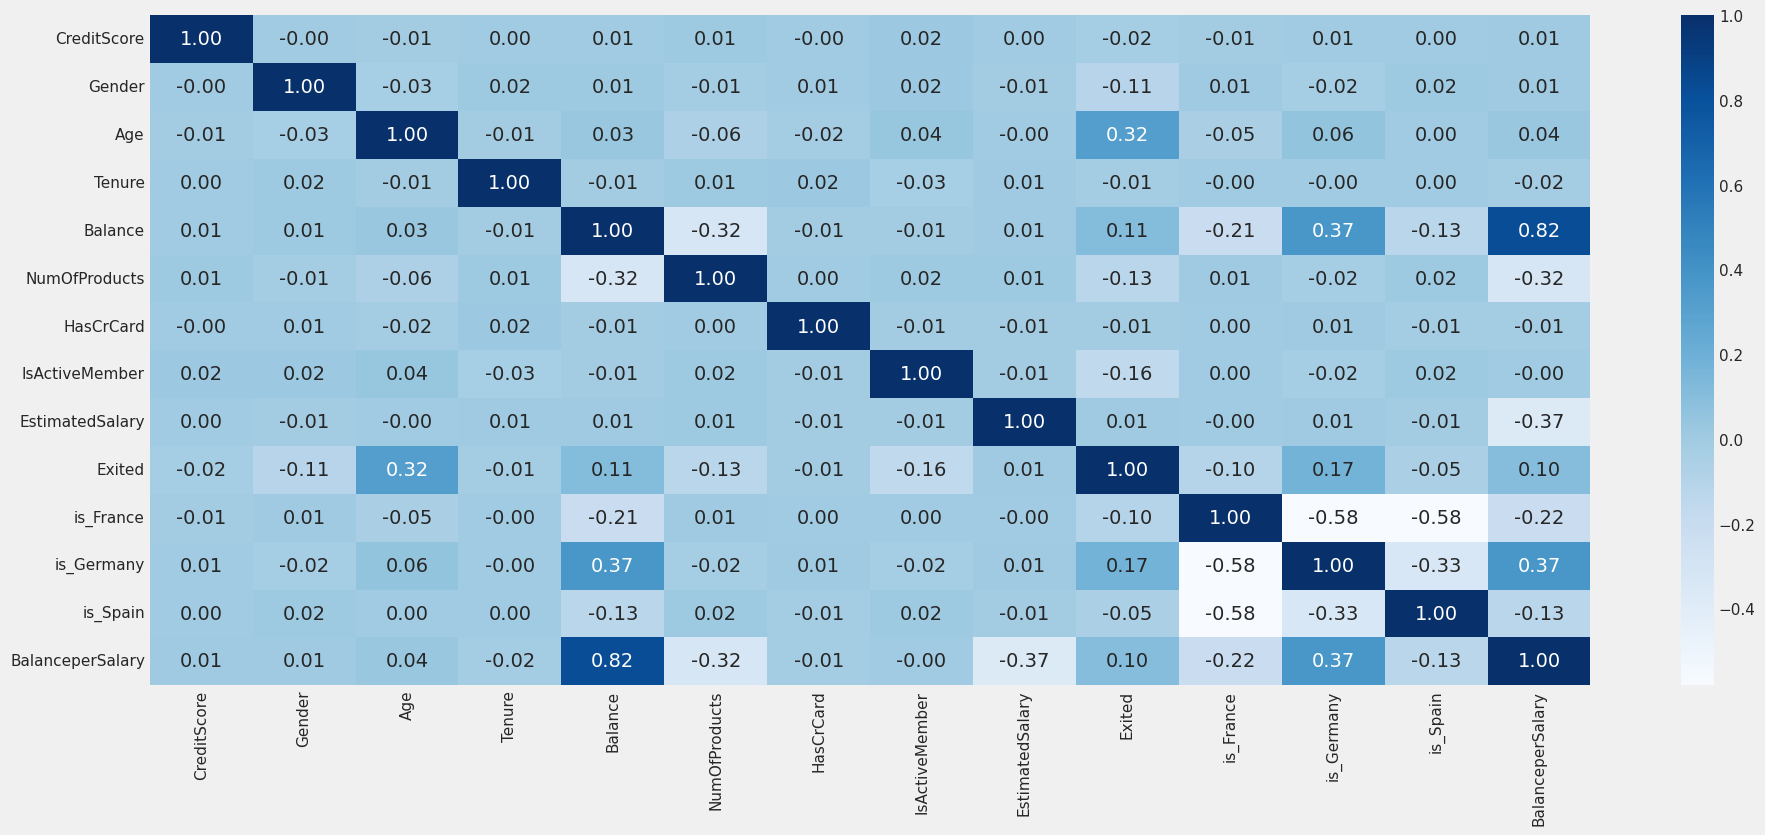

In [ ]:
## checking correlation by using spearman method

sns.heatmap(df_bank_new[df_bank_new.columns].corr(method = 'spearman'), cmap = 'Blues', annot = True, fmt = '.2f')

In [ ]:
### Checking multicollinearity by VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor

df_check = df_bank_new.copy()
df_check = df_check.drop(columns = ['Exited'])

vif_select = df_check
vif_data = pd.DataFrame()
vif_data["feature"] = vif_select.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(vif_select.values, i)
                          for i in range(len(vif_select.columns))]

print(vif_data)

             feature        VIF
0        CreditScore   1.001087
1             Gender   1.003274
2                Age   1.012107
3             Tenure   1.001935
4            Balance   1.336721
5      NumOfProducts   1.122488
6          HasCrCard   1.001594
7     IsActiveMember   1.010548
8    EstimatedSalary   1.003457
9          is_France  41.343602
10        is_Germany  22.802005
11          is_Spain  21.076691
12  BalanceperSalary   1.003930


New feature has high correlation with balance feature but based on the VIF value, they don't contribute for indicating with mulicollinearity on each other.

### Splitting Data Training and Testing

In [ ]:
# Split the data into training and testing with the proportion of 70:30

X = df_bank_new.drop(columns=['Exited'])
y = df_bank_new[['Exited']]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Handling Outliers

#### Data Naive Splitting Train/Test

In [ ]:
# merge the data training

X_train = X_train.reset_index()
y_train = y_train.reset_index()

data_train = X_train.merge(y_train,
                           on = 'index',
                           how = 'inner'
                          )

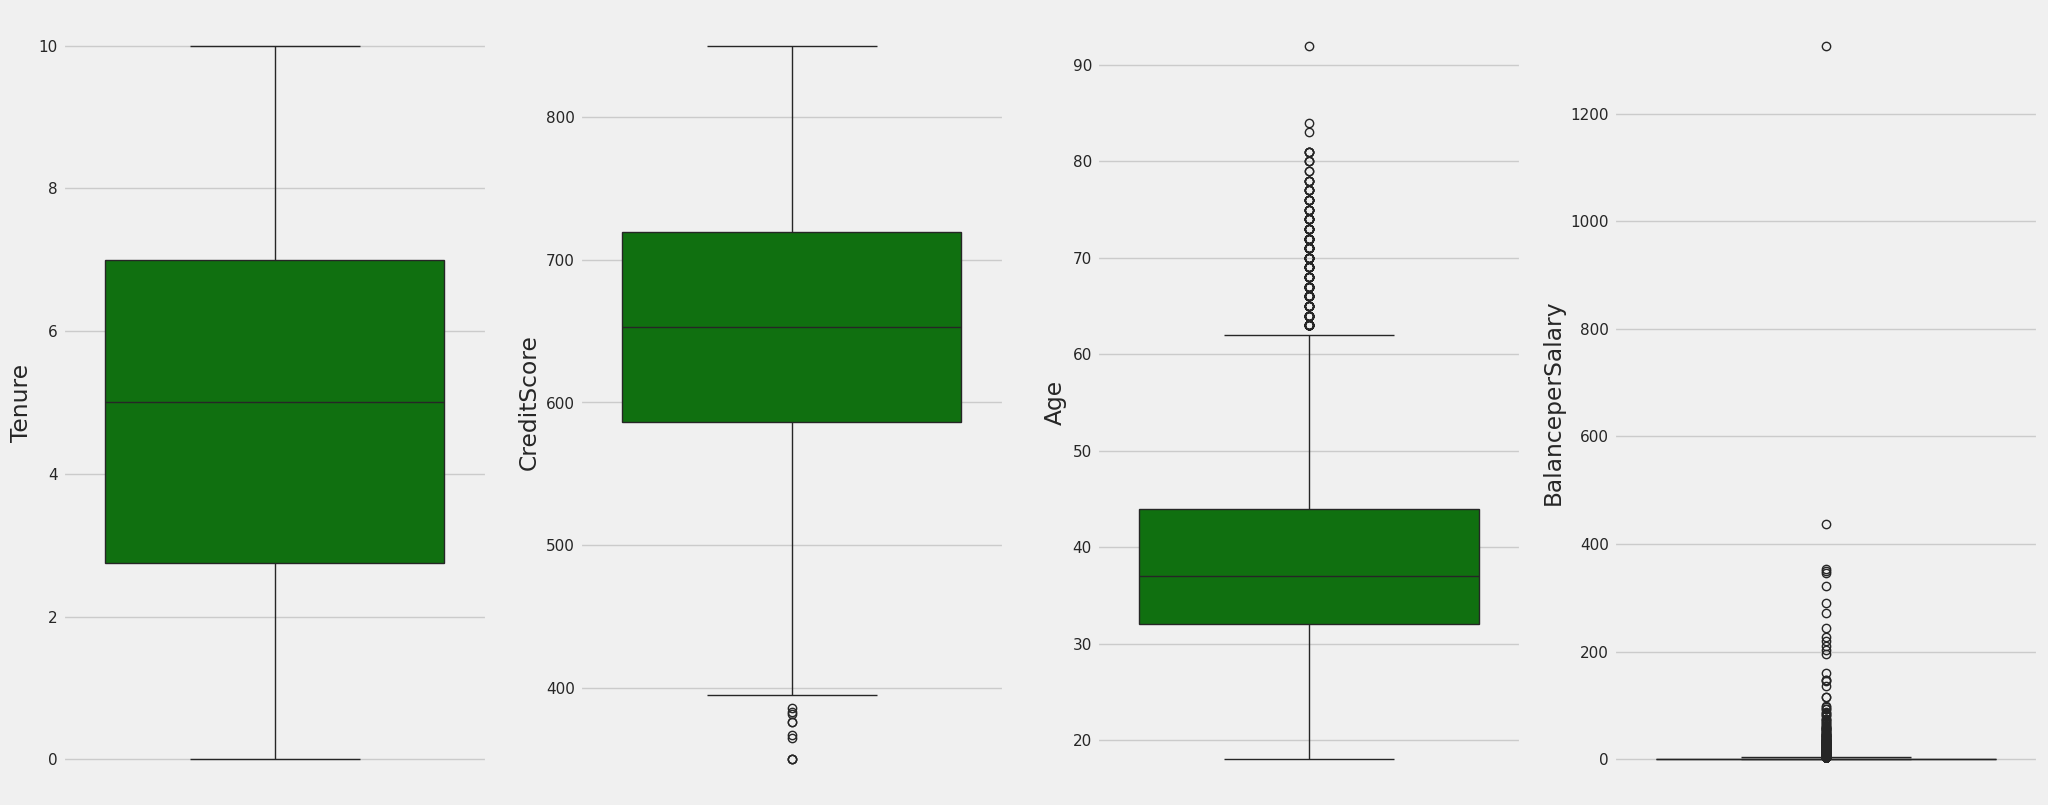

In [ ]:
# Check if there's outliers inside the data train

features = ['Tenure', 'CreditScore', 'Age', 'BalanceperSalary']
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y = data_train[features[i]], color = 'green', orient = 'v')
    plt.tight_layout()

In [ ]:
# Removing outliers using Z-Score

from scipy import stats

print(f'Jumlah baris sebelum memfilter outlier {len(data_train)}')


for col in ['BalanceperSalary', 'Age', 'CreditScore']:
    zscore = np.abs(stats.zscore(data_train[col]))
    filtered_entries = (zscore < 3)

data_train = data_train[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(data_train)}')

Jumlah baris sebelum memfilter outlier 7000
Jumlah baris setelah memfilter outlier: 6997


In [ ]:
# Separating X_train and y_train

data_train = data_train.drop(columns = ['index'])

X_train = data_train.drop(columns = ['Exited'])
y_train = data_train['Exited']

#### Data for cross validation

In [ ]:
# Removing outliers using Z-Score

df_cross = df_bank_new.copy()

from scipy import stats

print(f'Jumlah baris sebelum memfilter outlier {len(df_cross)}')


for col in ['BalanceperSalary', 'Age', 'CreditScore']:
    zscore = np.abs(stats.zscore(df_cross[col]))
    filtered_entries = (zscore < 3)

df_cross = df_cross[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(df_cross)}')

Jumlah baris sebelum memfilter outlier 10000
Jumlah baris setelah memfilter outlier: 9992


In [ ]:
# separate feature and target for cross validation

X = df_cross.drop(columns=['Exited'])
y = df_cross[['Exited']]

### Feature Transformation (Scaling)

#### Data Naive Splitting Train/Test

In [ ]:
# Standardization

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

numerical_features = X.columns.to_list()
for n in numerical_features:
  scaler = ss.fit(X_train[[n]])
  X_train[n] = scaler.transform(X_train[[n]])
  X_test[n] = scaler.transform(X_test[[n]])

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6906 entries, 0 to 6999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      6906 non-null   int64  
 1   Gender           6906 non-null   int64  
 2   Age              6906 non-null   int64  
 3   Tenure           6906 non-null   int64  
 4   Balance          6906 non-null   float64
 5   NumOfProducts    6906 non-null   int64  
 6   IsActiveMember   6906 non-null   int64  
 7   EstimatedSalary  6906 non-null   float64
 8   is_France        6906 non-null   float64
 9   is_Germany       6906 non-null   float64
 10  is_Spain         6906 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 647.4 KB


#### Data for Cross Validation

In [ ]:
# Standardization

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

numerical_features = X.columns.to_list()
for n in numerical_features:
  scaler = ss.fit(X[[n]])
  X[n] = scaler.transform(X[[n]])

### Handling Imbalance Dataset

#### Data Naive Splitting Train/Testing

In [ ]:
# checking the total amount of each label

y_train.value_counts()

Exited
0    5459
1    1447
Name: count, dtype: int64

In [ ]:
# using undersamping for majority class with the proportion feature target is 70:30

from imblearn import under_sampling
X_under, y_under = under_sampling.RandomUnderSampler(random_state = 42, sampling_strategy = 0.428).fit_resample(X_train, y_train)

In [ ]:
y_under.value_counts()

Exited
0    3380
1    1447
Name: count, dtype: int64

#### Data for Cross Validation

In [ ]:
# checking the total amount of each label

y.value_counts()

Exited
0         7841
1         2026
dtype: int64

In [ ]:
# using undersamping for majority class with the proportion feature target is 70:30

from imblearn import under_sampling
X_cross_under, y_cross_under = under_sampling.RandomUnderSampler(random_state = 42, sampling_strategy = 0.428).fit_resample(X, y)

In [ ]:
y_cross_under.value_counts()

Exited
0         4733
1         2026
dtype: int64

## Data Modelling

We will choose one main metrics for evaluating the model score which is F1 score because the data is imbalance and we concern on how to selecting customer who are potentially becoming churn as properly while keep and hold the budget for marketing purposes. Not to mention, we also use two other metrics for supporting the F1 score which are Recall and ROC-AUC (accuracy on imbalance label).

### With Balancing the Data

In [ ]:
# define the model classification

scoring = ['f1', 'recall', 'roc_auc', 'precision', 'accuracy']

def classification_bal(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_under)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_under)

    print("Accuracy (Train Set): %.2f" % accuracy_score(y_under, y_pred_train))
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Precision (Train Set): %.2f" % precision_score(y_under, y_pred_train))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Train Set): %.2f" % recall_score(y_under, y_pred_train))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("F1-Score (Train Set): %.2f" % f1_score(y_under, y_pred_train))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))

    print("roc_auc (train-proba): %.2f" % roc_auc_score(y_under, y_pred_proba_train[:, 1]))
    print("roc_auc (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    #
    score = cross_validate(model, X_cross_under, y_cross_under, cv=10, scoring=scoring, return_train_score=True)
    print('\nF1-Score (crossval train): %.2f' % score['train_f1'].mean())
    print('F1-Score (crossval test): %.2f' % score['test_f1'].mean())
    print('recall (crossval train): %.2f' % score['train_recall'].mean())
    print('recall (crossval test): %.2f' % score['test_recall'].mean())
    print('ROC_AUC (crossval train): %.2f' % score['train_roc_auc'].mean())
    print('ROC_AUC (crossval test): %.2f' % score['test_roc_auc'].mean())
    print('Precision (crossval train): %.2f' % score['train_precision'].mean())
    print('Precision (crossval test): %.2f' % score['test_precision'].mean())
    print('Accuracy (crossval train): %.2f' % score['train_accuracy'].mean())
    print('Accuracy (crossval test): %.2f' % score['test_accuracy'].mean())

### Logistic Regression

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate

lr = LogisticRegression()
lr.fit(X_under, y_under)
classification_bal(lr)

Accuracy (Train Set): 0.75
Accuracy (Test Set): 0.81
Precision (Train Set): 0.64
Precision (Test Set): 0.53
Recall (Train Set): 0.37
Recall (Test Set): 0.38
F1-Score (Train Set): 0.47
F1-Score (Test Set): 0.44
roc_auc (train-proba): 0.76
roc_auc (test-proba): 0.77

F1-Score (crossval train): 0.47
F1-Score (crossval test): 0.47
recall (crossval train): 0.38
recall (crossval test): 0.37
ROC_AUC (crossval train): 0.77
ROC_AUC (crossval test): 0.77
Precision (crossval train): 0.64
Precision (crossval test): 0.64
Accuracy (crossval train): 0.75
Accuracy (crossval test): 0.75


F1 score and two other metrics (Recall and ROC-AUC) are underfitting but all metrics are not overfitting. Need to tune the hyperparameter to see if we can lowering the bias on the model.

### KNN

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate

knn = KNeighborsClassifier()
knn.fit(X_under, y_under)
classification_bal(knn)

Accuracy (Train Set): 0.84
Accuracy (Test Set): 0.82
Precision (Train Set): 0.80
Precision (Test Set): 0.54
Recall (Train Set): 0.62
Recall (Test Set): 0.48
F1-Score (Train Set): 0.69
F1-Score (Test Set): 0.51
roc_auc (train-proba): 0.91
roc_auc (test-proba): 0.77

F1-Score (crossval train): 0.71
F1-Score (crossval test): 0.58
recall (crossval train): 0.63
recall (crossval test): 0.50
ROC_AUC (crossval train): 0.92
ROC_AUC (crossval test): 0.79
Precision (crossval train): 0.82
Precision (crossval test): 0.68
Accuracy (crossval train): 0.85
Accuracy (crossval test): 0.78


F1 score and two other metrics (Recall and ROC-AUC) are underfitting and overfitting. Need to tune the hyperparameter to see if we can lowering the bias on the model while also lowering the complexity of the model.

### SVM

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn import svm
from sklearn.model_selection import cross_validate

clf = svm.SVC(probability = True)
clf.fit(X_under, y_under)
classification_bal(clf)

Accuracy (Train Set): 0.83
Accuracy (Test Set): 0.86
Precision (Train Set): 0.82
Precision (Test Set): 0.70
Recall (Train Set): 0.54
Recall (Test Set): 0.51
F1-Score (Train Set): 0.65
F1-Score (Test Set): 0.59
roc_auc (train-proba): 0.88
roc_auc (test-proba): 0.84

F1-Score (crossval train): 0.66
F1-Score (crossval test): 0.63
recall (crossval train): 0.56
recall (crossval test): 0.53
ROC_AUC (crossval train): 0.88
ROC_AUC (crossval test): 0.84
Precision (crossval train): 0.82
Precision (crossval test): 0.79
Accuracy (crossval train): 0.83
Accuracy (crossval test): 0.82


F1 score and two other metrics (Recall and ROC-AUC) are underfitting. Need to tune the hyperparameter to see if we can lowering the bias on the model.

### Decision Tree

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate

dt = DecisionTreeClassifier()
dt.fit(X_under, y_under)
classification_bal(dt)

Accuracy (Train Set): 1.00
Accuracy (Test Set): 0.78
Precision (Train Set): 1.00
Precision (Test Set): 0.44
Recall (Train Set): 1.00
Recall (Test Set): 0.59
F1-Score (Train Set): 1.00
F1-Score (Test Set): 0.51
roc_auc (train-proba): 1.00
roc_auc (test-proba): 0.71

F1-Score (crossval train): 1.00
F1-Score (crossval test): 0.57
recall (crossval train): 1.00
recall (crossval test): 0.58
ROC_AUC (crossval train): 1.00
ROC_AUC (crossval test): 0.70
Precision (crossval train): 1.00
Precision (crossval test): 0.57
Accuracy (crossval train): 1.00
Accuracy (crossval test): 0.74


F1 score and two other metrics (Recall and ROC-AUC) are underfitting and overfitting. Need to tune the hyperparameter to see if we can lowering the bias on the model while also lowering the complexity of the model.

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_under, y_under)
classification_bal(rf)

Accuracy (Train Set): 1.00
Accuracy (Test Set): 0.86
Precision (Train Set): 1.00
Precision (Test Set): 0.67
Recall (Train Set): 1.00
Recall (Test Set): 0.54
F1-Score (Train Set): 1.00
F1-Score (Test Set): 0.60
roc_auc (train-proba): 1.00
roc_auc (test-proba): 0.86

F1-Score (crossval train): 1.00
F1-Score (crossval test): 0.65
recall (crossval train): 1.00
recall (crossval test): 0.57
ROC_AUC (crossval train): 1.00
ROC_AUC (crossval test): 0.86
Precision (crossval train): 1.00
Precision (crossval test): 0.76
Accuracy (crossval train): 1.00
Accuracy (crossval test): 0.82


F1 score and Recall are underfitting and all metrics are overfitting. Need to tune the hyperparameter to see if we can lowering the bias on the model while also lowering the complexity of the model.

### Adaboost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ab = AdaBoostClassifier()
ab.fit(X_under, y_under)
classification_bal(ab)

Accuracy (Train Set): 0.82
Accuracy (Test Set): 0.85
Precision (Train Set): 0.75
Precision (Test Set): 0.63
Recall (Train Set): 0.59
Recall (Test Set): 0.59
F1-Score (Train Set): 0.66
F1-Score (Test Set): 0.61
roc_auc (train-proba): 0.86
roc_auc (test-proba): 0.85

F1-Score (crossval train): 0.66
F1-Score (crossval test): 0.65
recall (crossval train): 0.59
recall (crossval test): 0.58
ROC_AUC (crossval train): 0.86
ROC_AUC (crossval test): 0.85
Precision (crossval train): 0.74
Precision (crossval test): 0.73
Accuracy (crossval train): 0.82
Accuracy (crossval test): 0.81


F1 score and Recall are underfitting but not overfitting. Need to tune the hyperparameter to see if we can lowering the bias on the model.

### XGBoost

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
from xgboost import XGBClassifier

xg = XGBClassifier()
xg.fit(X_under, y_under)
classification_bal(xg)

Accuracy (Train Set): 0.97
Accuracy (Test Set): 0.85
Precision (Train Set): 0.98
Precision (Test Set): 0.62
Recall (Train Set): 0.93
Recall (Test Set): 0.59
F1-Score (Train Set): 0.95
F1-Score (Test Set): 0.60
roc_auc (train-proba): 1.00
roc_auc (test-proba): 0.85

F1-Score (crossval train): 0.93
F1-Score (crossval test): 0.65
recall (crossval train): 0.90
recall (crossval test): 0.59
ROC_AUC (crossval train): 0.99
ROC_AUC (crossval test): 0.85
Precision (crossval train): 0.97
Precision (crossval test): 0.72
Accuracy (crossval train): 0.96
Accuracy (crossval test): 0.81


F1 score and Recall are underfitting and all metrics are overfitting. Need to tune the hyperparameter to see if we can lowering the bias on the model and also lowering the complexity on the model.

### Initial Conclusion from All Models

1. All of the F1 score (main metric) on all algorithms are underfit and some of them is overfit
2. Only Logistic Regression, SVM, and AdaBoost who are not overfit.
3. Mainly only ROC-AUC score is having good score on all of the algorithms, thus we can use this to support the main metric.
4. Need to tuning up the hyperparameter to lower the bias and complexity on some models.
5. If the F1 score is still not overly than 70% after tuning the hyperparameter, we can select the best model if Recall and ROC-AUC scores are overly than 70%.

## Model Evaluation (Hyperparameter Tuning)

### LogisticRegression

Some of the default parameters:

1. penalty = l2 (Ridge regression)
2. C = 1
3. random_state = None (used for solver 'sag', 'saga', 'liblinear')
4. solver = lbfgs (support with 'l2' and None penalty, 'sag' need to have features with same scale)

In [ ]:
# define draw learning curve for finding the best parameter

import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression

def draw_learning_curve(param_values):
    train_scores = []
    test_scores = []
    i = 0

    for c in param_values:
        model = LogisticRegression (C=c)
        model.fit(X_under, y_under)

        # eval on train
        y_pred_train = model.predict(X_under)
        train_f1 = f1_score(y_under, y_pred_train)
        train_scores.append(train_f1)

        # eval on test
        y_pred = model.predict(X_test)
        test_f1 = f1_score(y_test, y_pred)
        test_scores.append(test_f1)

        print('param value: ' + str(c) + '; train: ' + str(train_f1) + '; test: '+ str(test_f1) + '; % diff: ' + str(round((train_f1 - test_f1) * 100, 2)) + '%' + '; % increase: ' + str(round((test_scores[i] - test_scores[i-1]) * 100, 2)) + '%')

        i += 1

    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.xlabel('C')
    plt.ylabel('F1 Score')
    plt.title('Learning Curve - Hyperparameter C - Logistic Regression')
    plt.legend()
    plt.show()

In [ ]:
from types import NoneType
# define function for finding the best parameter

import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression

def hyperparameter(param_values):
    train_scores = []
    test_scores = []
    i = 0

    for c in param_values:
        model = LogisticRegression (solver = c)
        model.fit(X_under, y_under)

        # eval on train
        y_pred_train = model.predict(X_under)
        train_f1 = f1_score(y_under, y_pred_train)
        train_scores.append(train_f1)

        # eval on test
        y_pred = model.predict(X_test)
        test_f1 = f1_score(y_test, y_pred)
        test_scores.append(test_f1)

        print('param value: ' + str(c) + '; train: ' + str(train_f1) + '; test: '+ str(test_f1) + '; % diff: ' + str(round((train_f1 - test_f1) * 100, 2)) + '%' + '; % increase: ' + str(round((test_scores[i] - test_scores[i-1]) * 100, 2)) + '%')

        i += 1

#### Tuning C Parameter

param value: 0.005; train: 0.4056737588652482; test: 0.38241758241758245; % diff: 2.33%; % increase: 0.0%
param value: 0.005151515151515152; train: 0.4077394997640396; test: 0.3833515881708653; % diff: 2.44%; % increase: 0.09%
param value: 0.005303030303030303; train: 0.40849056603773587; test: 0.388646288209607; % diff: 1.98%; % increase: 0.53%
param value: 0.005454545454545455; train: 0.41073951954780974; test: 0.38997821350762524; % diff: 2.08%; % increase: 0.13%
param value: 0.005606060606060606; train: 0.4118476727785614; test: 0.39173014145810664; % diff: 2.01%; % increase: 0.18%
param value: 0.005757575757575757; train: 0.4108818011257036; test: 0.39045553145336226; % diff: 2.04%; % increase: -0.13%
param value: 0.005909090909090909; train: 0.4119850187265917; test: 0.39219934994582883; % diff: 1.98%; % increase: 0.17%
param value: 0.006060606060606061; train: 0.4117922321010763; test: 0.39697950377562025; % diff: 1.48%; % increase: 0.48%
param value: 0.006212121212121212; train

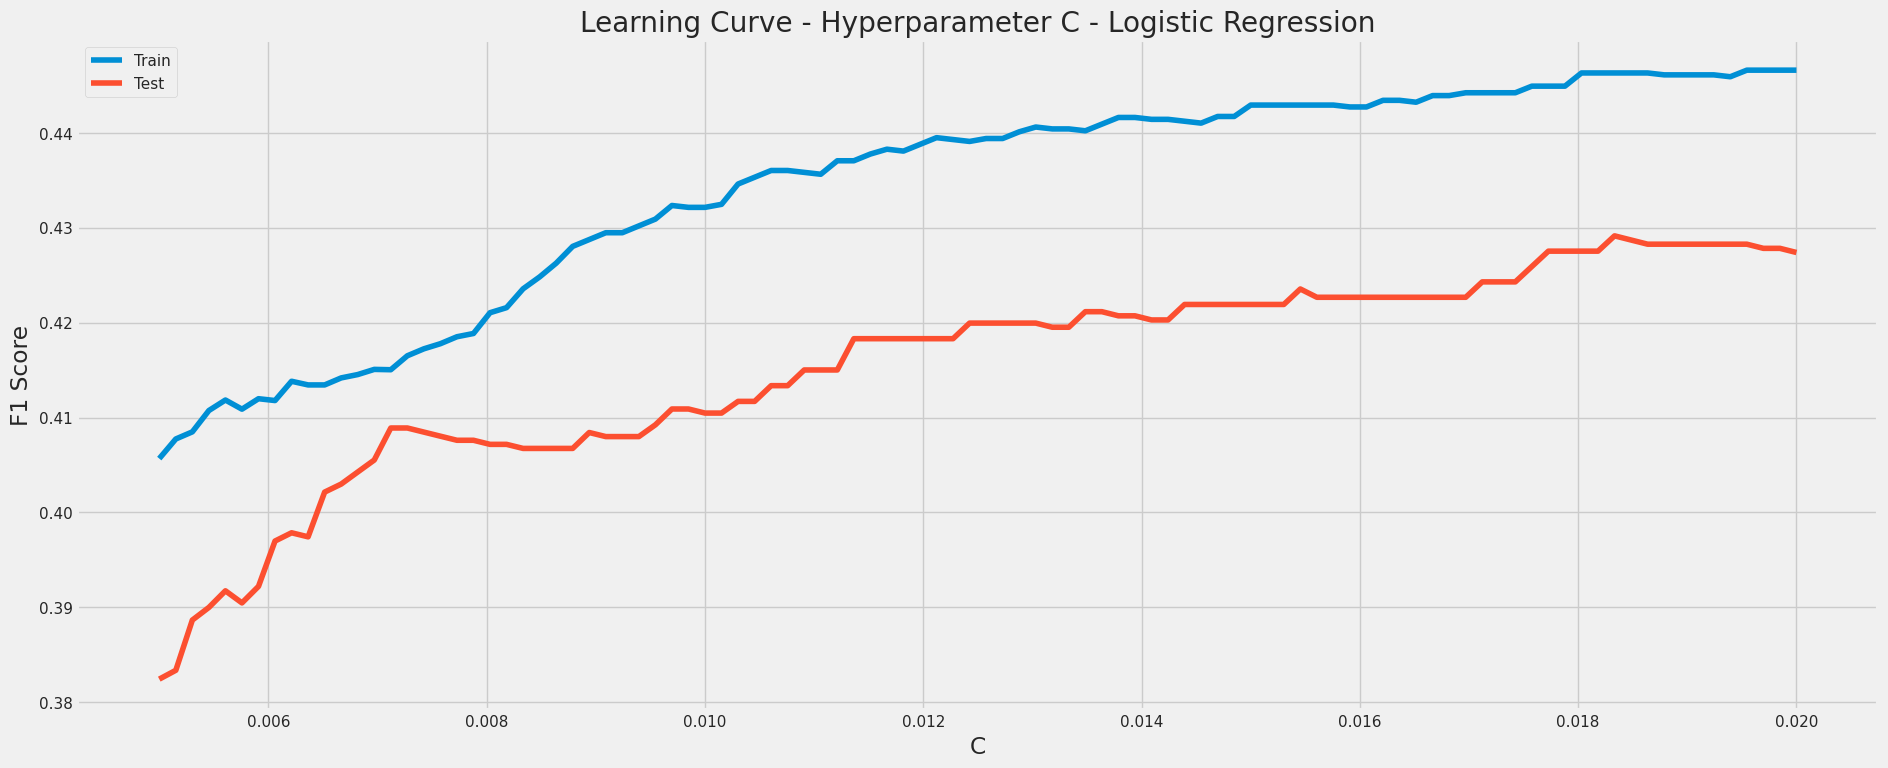

In [ ]:
# learning curve
import numpy as np
param_values = [float(x) for x in np.linspace(0.005, 0.02, 100)]
draw_learning_curve(param_values)

Between 0.006 until 0.008 of C parameter, the model achieved the highest F1 score on the lowest error difference between data training and data testing.

#### Tuning Penalty Parameter

In [ ]:
param_values = [None, 'l1', 'l2']
hyperparameter(param_values)

param value: None; train: 0.4691035683202785; test: 0.44155844155844154; % diff: 2.75%; % increase: 0.0%
param value: l1; train: 0.46823324630113144; test: 0.4384384384384384; % diff: 2.98%; % increase: -0.31%
param value: l2; train: 0.4691035683202785; test: 0.44044044044044045; % diff: 2.87%; % increase: 0.2%


None penalty has the highest F1 score but still underfitting.

#### Tuning Solver Parameter

In [ ]:
param_values = ['lbfgs', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
hyperparameter(param_values)

param value: lbfgs; train: 0.4691035683202785; test: 0.44044044044044045; % diff: 2.87%; % increase: 0.0%
param value: newton-cg; train: 0.4691035683202785; test: 0.44044044044044045; % diff: 2.87%; % increase: 0.0%
param value: newton-cholesky; train: 0.4691035683202785; test: 0.44044044044044045; % diff: 2.87%; % increase: 0.0%
param value: sag; train: 0.4691035683202785; test: 0.44044044044044045; % diff: 2.87%; % increase: 0.0%
param value: saga; train: 0.4691035683202785; test: 0.44044044044044045; % diff: 2.87%; % increase: 0.0%


All solver have same F1 score

#### Final Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

penalty = [None]
C = [float(x) for x in np.linspace(0.006, 0.08, 5)]
solver = ['saga']
hyperparameters = dict(penalty=penalty, C=C)

logreg = LogisticRegression(random_state = 42)
gs = GridSearchCV(logreg, hyperparameters, scoring='f1', cv=10)
gs.fit(X_under, y_under)
classification_bal(gs)

Accuracy (Train Set): 0.75
Accuracy (Test Set): 0.81
Precision (Train Set): 0.64
Precision (Test Set): 0.53
Recall (Train Set): 0.37
Recall (Test Set): 0.38
F1-Score (Train Set): 0.47
F1-Score (Test Set): 0.44
roc_auc (train-proba): 0.76
roc_auc (test-proba): 0.77

F1-Score (crossval train): 0.47
F1-Score (crossval test): 0.47
recall (crossval train): 0.38
recall (crossval test): 0.37
ROC_AUC (crossval train): 0.77
ROC_AUC (crossval test): 0.77
Precision (crossval train): 0.64
Precision (crossval test): 0.64
Accuracy (crossval train): 0.75
Accuracy (crossval test): 0.75


#### Compare Metric Results with default parameter

> No difference after tuning the hyperparameter with the default parameter.

### KNN

Some of the default parameter:

1. n_neighbors = 5
2. weights = uniform
3. p = 2 (1 : Manhattan, 2 : Euclidean)


In [ ]:
# define draw learning curve for finding the best parameter

import numpy as np
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

def draw_learning_curve(param_values):
    train_scores = []
    test_scores = []
    i = 0

    for c in param_values:
        model = KNeighborsClassifier(n_neighbors = c)
        model.fit(X_under, y_under)

        # eval on train
        y_pred_train = model.predict(X_under)
        train_f1 = f1_score(y_under, y_pred_train)
        train_scores.append(train_f1)

        # eval on test
        y_pred = model.predict(X_test)
        test_f1 = f1_score(y_test, y_pred)
        test_scores.append(test_f1)

        print('param value: ' + str(c) + '; train: ' + str(train_f1) + '; test: '+ str(test_f1) + '; % diff: ' + str(round((train_f1 - test_f1) * 100, 2)) + '%' + '; % increase: ' + str(round((test_scores[i] - test_scores[i-1]) * 100, 2)) + '%')

        i += 1

    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.xlabel('n_neighbors')
    plt.ylabel('F1 Score')
    plt.title('Learning Curve - Hyperparameter n_neighbors - KNN')
    plt.legend()
    plt.show()

In [ ]:
# define draw learning curve for finding the best parameter

import numpy as np
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

def hyperparameter(param_values):
    train_scores = []
    test_scores = []
    i = 0

    for c in param_values:
        model = KNeighborsClassifier(p = c)
        model.fit(X_under, y_under)

        # eval on train
        y_pred_train = model.predict(X_under)
        train_f1 = f1_score(y_under, y_pred_train)
        train_scores.append(train_f1)

        # eval on test
        y_pred = model.predict(X_test)
        test_f1 = f1_score(y_test, y_pred)
        test_scores.append(test_f1)

        print('param value: ' + str(c) + '; train: ' + str(train_f1) + '; test: '+ str(test_f1) + '; % diff: ' + str(round((train_f1 - test_f1) * 100, 2)) + '%' + '; % increase: ' + str(round((test_scores[i] - test_scores[i-1]) * 100, 2)) + '%')

        i += 1

#### Tuning n_neighbors Parameter

param value: 1; train: 1.0; test: 0.47512991833704527; % diff: 52.49%; % increase: 0.0%
param value: 2; train: 0.7012987012987013; test: 0.45464480874316937; % diff: 24.67%; % increase: -2.05%
param value: 3; train: 0.7688872348343879; test: 0.503896103896104; % diff: 26.5%; % increase: 4.93%
param value: 4; train: 0.6455584872471415; test: 0.4520990312163617; % diff: 19.35%; % increase: -5.18%
param value: 5; train: 0.6946386946386947; test: 0.5113327289211242; % diff: 18.33%; % increase: 5.92%
param value: 6; train: 0.612565445026178; test: 0.4689507494646681; % diff: 14.36%; % increase: -4.24%
param value: 7; train: 0.6587017124651533; test: 0.5057034220532319; % diff: 15.3%; % increase: 3.68%
param value: 8; train: 0.5887521968365553; test: 0.4703344120819849; % diff: 11.84%; % increase: -3.54%
param value: 9; train: 0.6337854500616522; test: 0.5033621517771374; % diff: 13.04%; % increase: 3.3%
param value: 10; train: 0.5801324503311259; test: 0.4790547798066595; % diff: 10.11%; % 

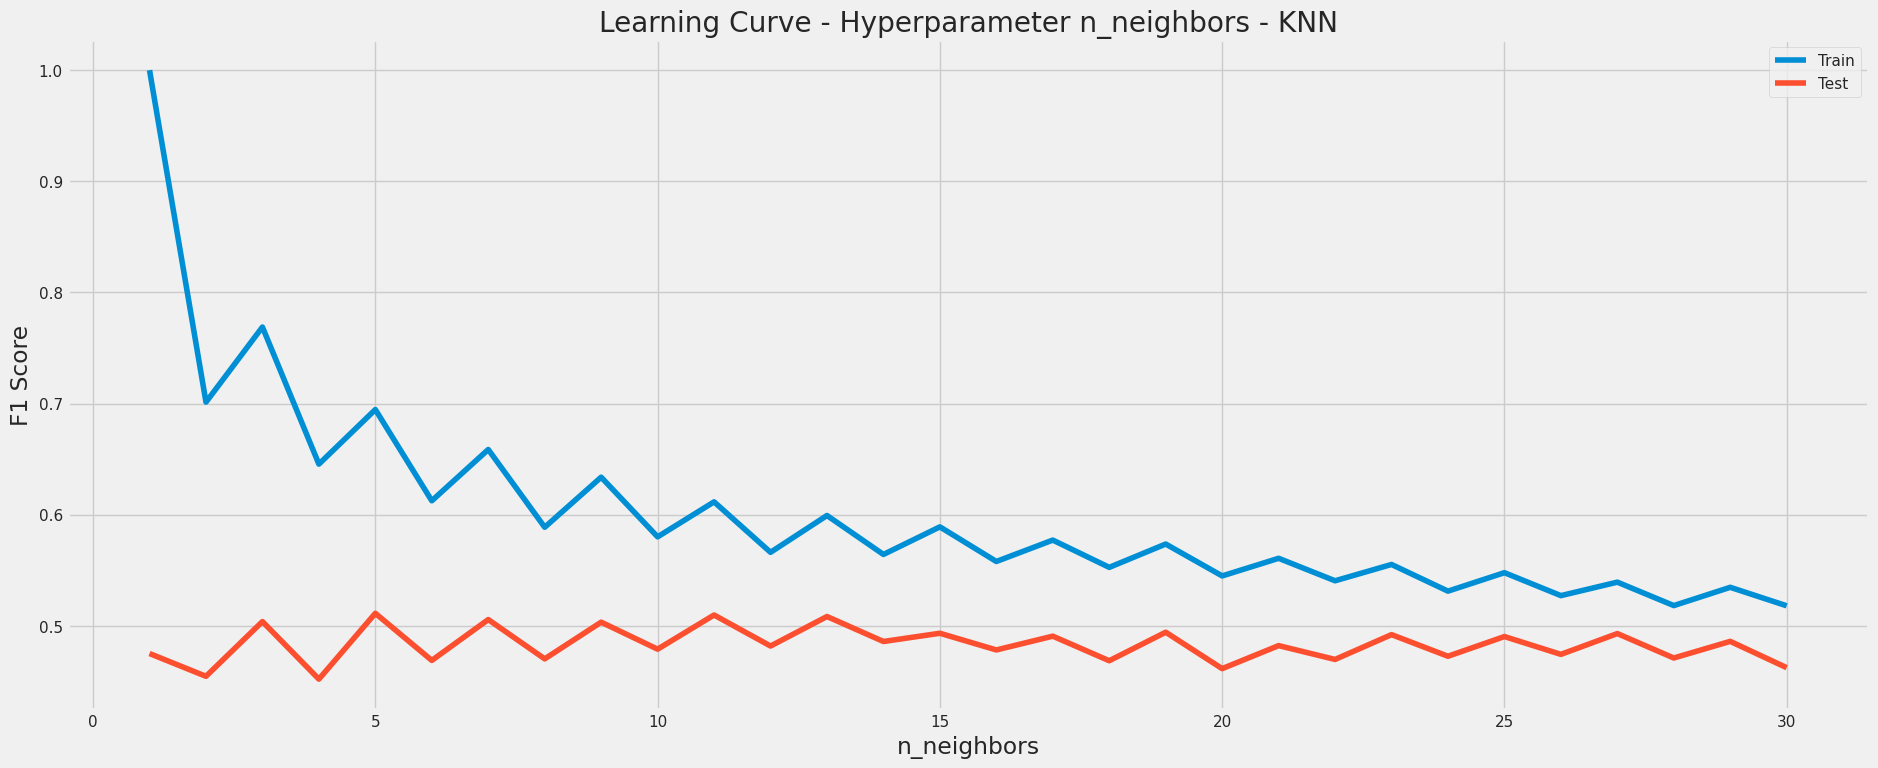

In [ ]:
param_values = [int(x) for x in np.linspace(1, 30, 30)]
draw_learning_curve(param_values)

Between 25 until 30 of n_neighbors parameter, the model achieved the highest F1 score on the lowest error difference between data training and data testing.

#### Tuning Weight Parameter

In [ ]:
param_values = ['uniform', 'distance']
hyperparameter(param_values)

param value: uniform; train: 0.6946386946386947; test: 0.5113327289211242; % diff: 18.33%; % increase: 0.0%
param value: distance; train: 1.0; test: 0.5089605734767025; % diff: 49.1%; % increase: -0.24%


param value of weight = uniform has the lowest error difference of F1 score between data training and data testing.

#### Tuning P Parameter

In [ ]:
param_values = [1, 2]
hyperparameter(param_values)

param value: 1; train: 0.6984866123399301; test: 0.49688334817453256; % diff: 20.16%; % increase: 0.0%
param value: 2; train: 0.6946386946386947; test: 0.5113327289211242; % diff: 18.33%; % increase: 1.44%


euclidean distance (p = 2) has the lowest error difference of F1 score between data training and data testing.

#### Final Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

n_neighbors = [int(x) for x in np.linspace(25, 30, 5)]
p= [2]
weights = ['uniform']
hyperparameters = dict(n_neighbors=n_neighbors, p=p, weights=weights)

knn = KNeighborsClassifier()
gs = GridSearchCV(knn, hyperparameters, scoring='f1', cv=10)
gs.fit(X_under, y_under)
classification_bal(gs)

Accuracy (Train Set): 0.79
Accuracy (Test Set): 0.84
Precision (Train Set): 0.77
Precision (Test Set): 0.65
Recall (Train Set): 0.43
Recall (Test Set): 0.39
F1-Score (Train Set): 0.55
F1-Score (Test Set): 0.49
roc_auc (train-proba): 0.85
roc_auc (test-proba): 0.82

F1-Score (crossval train): 0.57
F1-Score (crossval test): 0.54
recall (crossval train): 0.46
recall (crossval test): 0.42
ROC_AUC (crossval train): 0.86
ROC_AUC (crossval test): 0.82
Precision (crossval train): 0.78
Precision (crossval test): 0.73
Accuracy (crossval train): 0.80
Accuracy (crossval test): 0.78


#### Compare Metric Results with Default Parameter

After tuning the hyperparameter, the model doesn't have good F1 score but ROC-AUC score is increase. Positively aside, our model is not overfitting again after tuning the parameter, thus we can consider this as the selected model for predicting the churn.

### SVM

Some of default parameters:

1. C = 1
2. kernel = rbf
3. gamma = scale
4. class_weight = None
5. decision_function_shape = ovr

In [ ]:
# define draw learning curve for finding the best parameter

import numpy as np
from matplotlib import pyplot as plt
from sklearn import svm

def draw_learning_curve(param_values):
    train_scores = []
    test_scores = []
    i = 0

    for c in param_values:
        model = svm.SVC(C = c)
        model.fit(X_under, y_under)

        # eval on train
        y_pred_train = model.predict(X_under)
        train_f1 = f1_score(y_under, y_pred_train)
        train_scores.append(train_f1)

        # eval on test
        y_pred = model.predict(X_test)
        test_f1 = f1_score(y_test, y_pred)
        test_scores.append(test_f1)

        print('param value: ' + str(c) + '; train: ' + str(train_f1) + '; test: '+ str(test_f1) + '; % diff: ' + str(round((train_f1 - test_f1) * 100, 2)) + '%' + '; % increase: ' + str(round((test_scores[i] - test_scores[i-1]) * 100, 2)) + '%')

        i += 1

    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.xlabel('C')
    plt.ylabel('F1 Score')
    plt.title('Learning Curve - Hyperparameter C - SVM')
    plt.legend()
    plt.show()

In [ ]:
# define function for finding the best parameter

import numpy as np
from matplotlib import pyplot as plt
from sklearn import svm

def hyperparameter(param_values):
    train_scores = []
    test_scores = []
    i = 0

    for c in param_values:
        model = svm.SVC(kernel = c)
        model.fit(X_under, y_under)

        # eval on train
        y_pred_train = model.predict(X_under)
        train_f1 = f1_score(y_under, y_pred_train)
        train_scores.append(train_f1)

        # eval on test
        y_pred = model.predict(X_test)
        test_f1 = f1_score(y_test, y_pred)
        test_scores.append(test_f1)

        print('param value: ' + str(c) + '; train: ' + str(train_f1) + '; test: '+ str(test_f1) + '; % diff: ' + str(round((train_f1 - test_f1) * 100, 2)) + '%' + '; % increase: ' + str(round((test_scores[i] - test_scores[i-1]) * 100, 2)) + '%')

        i += 1

#### Tuning Kernel Parameter

In [ ]:
param_values = ['linear', 'poly', 'rbf', 'sigmoid']
hyperparameter(param_values)

param value: linear; train: 0.42502299908003677; test: 0.4076433121019108; % diff: 1.74%; % increase: 0.0%
param value: poly; train: 0.6318965517241378; test: 0.5805128205128205; % diff: 5.14%; % increase: 17.29%
param value: rbf; train: 0.6533499791926757; test: 0.5926660059464817; % diff: 6.07%; % increase: 1.22%
param value: sigmoid; train: 0.34519572953736655; test: 0.2846661775495231; % diff: 6.05%; % increase: -30.8%


kernel rbf has the highest F1 score and the error difference between data training and data testing is tolerable.

#### Tuning C Parameter

param value: 1.0; train: 0.6533499791926757; test: 0.5926660059464817; % diff: 6.07%; % increase: 0.0%
param value: 1.0689655172413792; train: 0.6541822721598002; test: 0.5968379446640316; % diff: 5.73%; % increase: 0.42%
param value: 1.1379310344827587; train: 0.6583644665836447; test: 0.5988142292490118; % diff: 5.96%; % increase: 0.2%
param value: 1.206896551724138; train: 0.6589307915457936; test: 0.6015779092702169; % diff: 5.74%; % increase: 0.28%
param value: 1.2758620689655173; train: 0.6606110652353427; test: 0.6023622047244095; % diff: 5.82%; % increase: 0.08%
param value: 1.3448275862068966; train: 0.6611706512778236; test: 0.6017699115044247; % diff: 5.94%; % increase: -0.06%
param value: 1.4137931034482758; train: 0.6642005754212905; test: 0.6017699115044247; % diff: 6.24%; % increase: 0.0%
param value: 1.4827586206896552; train: 0.666392769104355; test: 0.6011787819253438; % diff: 6.52%; % increase: -0.06%
param value: 1.5517241379310345; train: 0.6674876847290641; test: 

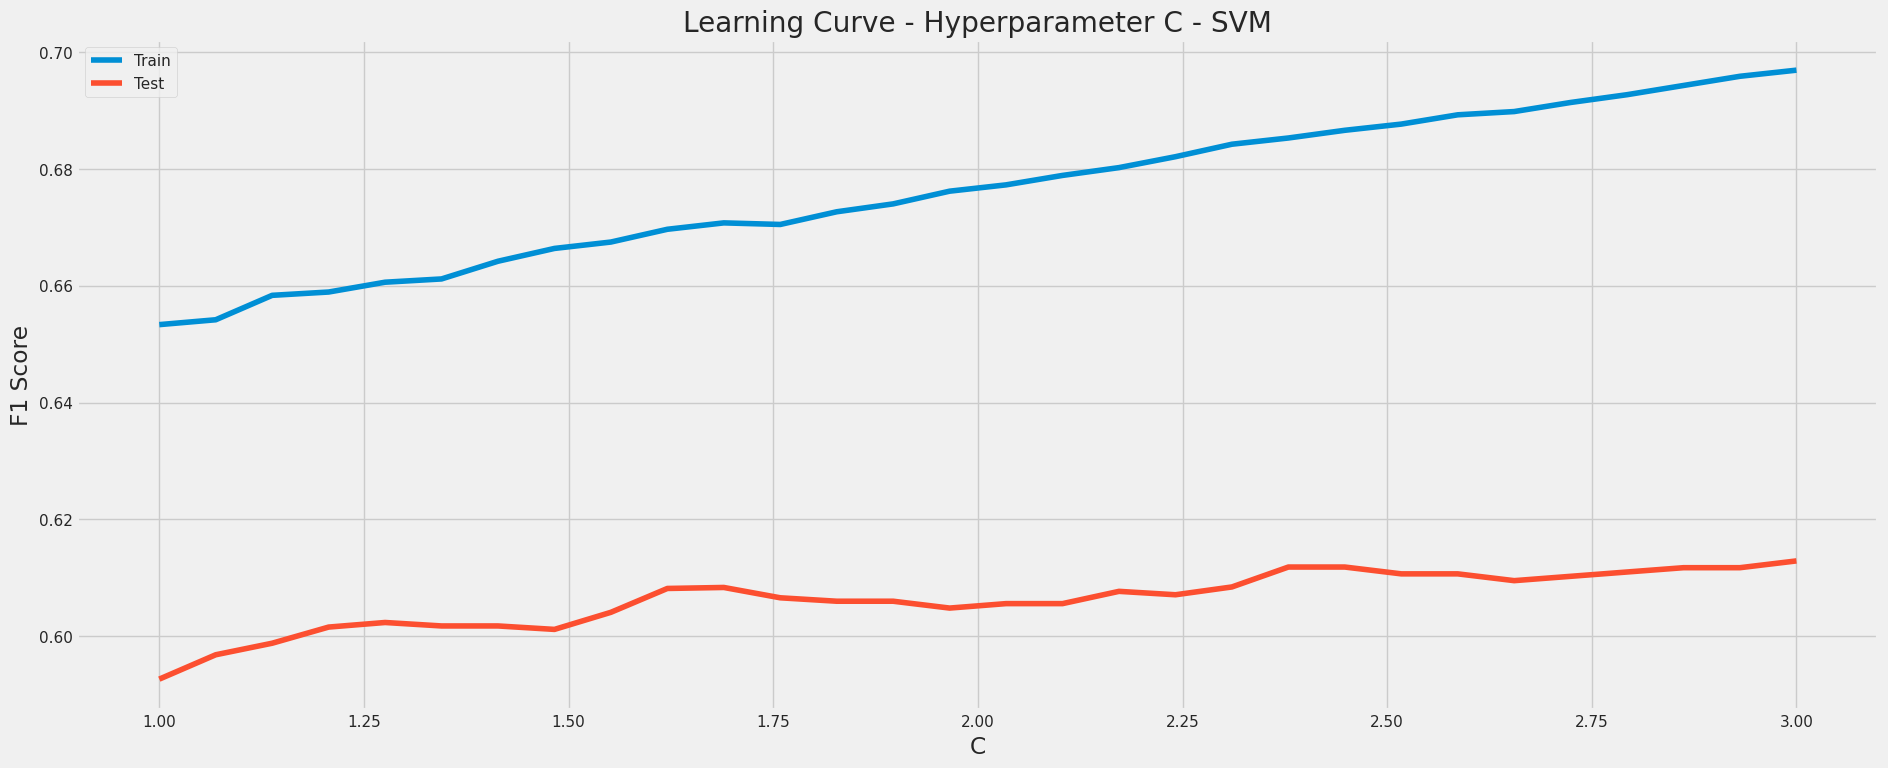

In [ ]:
param_values = [float(x) for x in np.linspace(1, 3, 30)]
draw_learning_curve(param_values)

Value of C = 3 has the highest F1 score but still tolerable on the error difference between data training and data testing.

#### Tuning Gamma Parameter

In [ ]:
param_values = ['scale', 'auto']
draw_learning_curve(param_values)

param value: scale; train: 0.6533499791926757; test: 0.5926660059464817; % diff: 6.07%; % increase: 0.0%
param value: auto; train: 0.6530612244897958; test: 0.5946481665014867; % diff: 5.84%; % increase: 0.2%


auto gamma has the highest F1 score but still tolerable on the error difference of F1 score between data training and data testing.

#### Tuning Class Weight

In [ ]:
param_values = [None, 'balanced']
draw_learning_curve(param_values)

param value: None; train: 0.6533499791926757; test: 0.5926660059464817; % diff: 6.07%; % increase: 0.0%
param value: balanced; train: 0.718974679587371; test: 0.5765645805592543; % diff: 14.24%; % increase: -1.61%


without adding class weight has the highest F1 score

#### Tuning Decision Function of Shape Parameter

In [ ]:
param_values = ['ovo', 'ovr']
draw_learning_curve(param_values)

param value: ovo; train: 0.6533499791926757; test: 0.5926660059464817; % diff: 6.07%; % increase: 0.0%
param value: ovr; train: 0.6533499791926757; test: 0.5926660059464817; % diff: 6.07%; % increase: 0.0%


all decision function of shape has the same F1 score results

#### Final Tuning

In [ ]:
clf = svm.SVC(gamma = 'auto', C = 3, probability = True)
clf.fit(X_under, y_under)
classification_bal(clf)

Accuracy (Train Set): 0.85
Accuracy (Test Set): 0.86
Precision (Train Set): 0.84
Precision (Test Set): 0.68
Recall (Train Set): 0.60
Recall (Test Set): 0.56
F1-Score (Train Set): 0.70
F1-Score (Test Set): 0.61
roc_auc (train-proba): 0.90
roc_auc (test-proba): 0.84

F1-Score (crossval train): 0.70
F1-Score (crossval test): 0.64
recall (crossval train): 0.60
recall (crossval test): 0.55
ROC_AUC (crossval train): 0.90
ROC_AUC (crossval test): 0.84
Precision (crossval train): 0.83
Precision (crossval test): 0.77
Accuracy (crossval train): 0.84
Accuracy (crossval test): 0.82


#### Compare Metrics Results with Default Parameter

After tuning the hyperparameter, the model increasing F1 score and Recall but still underfit, only ROC-AUC that has good score on this model. Positively aside, our model is not overfitting again after tuning the parameter, thus we can also consider this as the selected model for predicting the churn.

### Decision Tree

Some of default parameters:

1. splitter = best
2. max_depth = None
3. min_samples_split = 2
4. min_samples_leaf = 1
5. max_leaf_nodes = None
6. class_weight = None


In [ ]:
# define draw learning curve for finding the best parameter

import numpy as np
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier

def draw_learning_curve(param_values):
    train_scores = []
    test_scores = []
    i = 0

    for c in param_values:
        model = DecisionTreeClassifier(max_leaf_nodes = c)
        model.fit(X_under, y_under)

        # eval on train
        y_pred_train = model.predict(X_under)
        train_f1 = f1_score(y_under, y_pred_train)
        train_scores.append(train_f1)

        # eval on test
        y_pred = model.predict(X_test)
        test_f1 = f1_score(y_test, y_pred)
        test_scores.append(test_f1)

        print('param value: ' + str(c) + '; train: ' + str(train_f1) + '; test: '+ str(test_f1) + '; % diff: ' + str(round((train_f1 - test_f1) * 100, 2)) + '%' + '; % increase: ' + str(round((test_scores[i] - test_scores[i-1]) * 100, 2)) + '%')

        i += 1

    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.xlabel('max_leaf_nodes')
    plt.ylabel('F1 Score')
    plt.title('Learning Curve - Hyperparameter max_leaf_nodes - Decision Tree Classifier')
    plt.legend()
    plt.show()

In [ ]:
# define function for finding the best parameter

import numpy as np
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier

def hyperparameter(param_values):
    train_scores = []
    test_scores = []
    i = 0

    for c in param_values:
        model = DecisionTreeClassifier(class_weight = c)
        model.fit(X_under, y_under)

        # eval on train
        y_pred_train = model.predict(X_under)
        train_f1 = f1_score(y_under, y_pred_train)
        train_scores.append(train_f1)

        # eval on test
        y_pred = model.predict(X_test)
        test_f1 = f1_score(y_test, y_pred)
        test_scores.append(test_f1)

        print('param value: ' + str(c) + '; train: ' + str(train_f1) + '; test: '+ str(test_f1) + '; % diff: ' + str(round((train_f1 - test_f1) * 100, 2)) + '%' + '; % increase: ' + str(round((test_scores[i] - test_scores[i-1]) * 100, 2)) + '%')

        i += 1

#### Tuning Splitter Parameter

In [ ]:
param_values = ['best', 'random']
hyperparameter(param_values)

param value: best; train: 1.0; test: 0.49817384952520083; % diff: 50.18%; % increase: 0.0%
param value: random; train: 1.0; test: 0.47239692522711396; % diff: 52.76%; % increase: -2.58%


best splitter has the highest F1 score but overfit

#### Tuning Max Depth Parameter

param value: 1; train: 0.5696321911348633; test: 0.48480930833872005; % diff: 8.48%; % increase: 0.0%
param value: 2; train: 0.5490033222591362; test: 0.5141242937853108; % diff: 3.49%; % increase: 2.93%
param value: 3; train: 0.5792038992688872; test: 0.53690036900369; % diff: 4.23%; % increase: 2.28%
param value: 4; train: 0.5627240143369175; test: 0.5296017222820237; % diff: 3.31%; % increase: -0.73%
param value: 5; train: 0.6479775730877052; test: 0.5939849624060151; % diff: 5.4%; % increase: 6.44%
param value: 6; train: 0.6352739726027397; test: 0.5813715455475947; % diff: 5.39%; % increase: -1.26%
param value: 7; train: 0.6893819334389858; test: 0.5907808090310442; % diff: 9.86%; % increase: 0.94%
param value: 8; train: 0.7257318952234206; test: 0.5814977973568282; % diff: 14.42%; % increase: -0.93%
param value: 9; train: 0.7481567714396584; test: 0.5691347011596788; % diff: 17.9%; % increase: -1.24%
param value: 10; train: 0.7915273132664438; test: 0.5596638655462186; % diff: 23

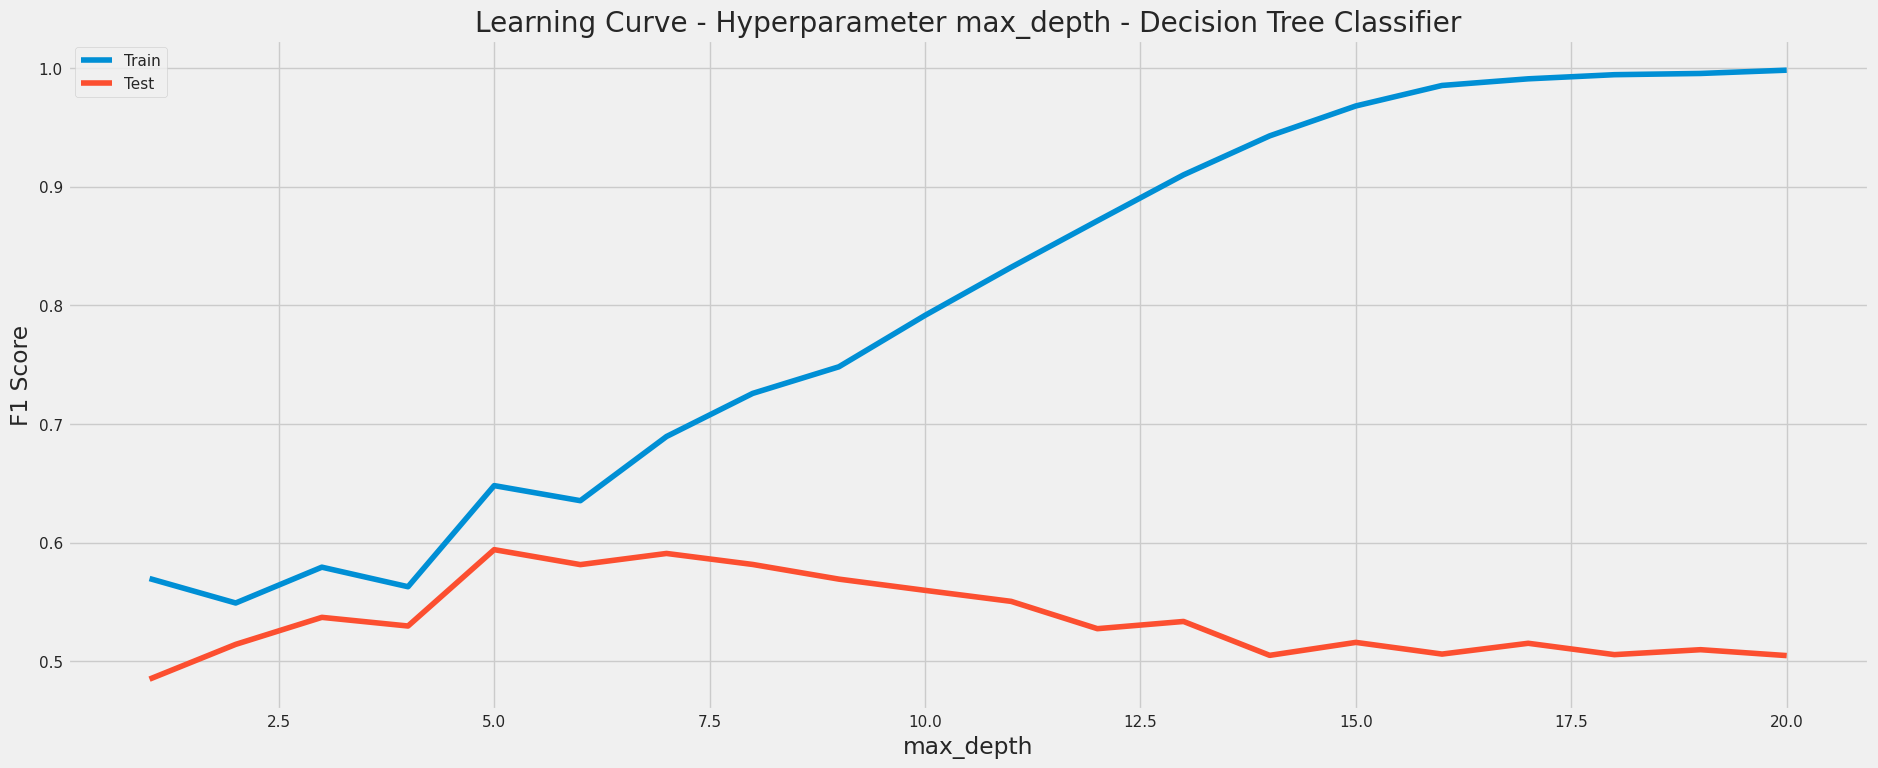

In [ ]:
param_values = [int(x) for x in np.linspace(1, 20, 20)]
draw_learning_curve(param_values)

Between 3 until 8 of max_depth parameter, the model has the highest F1 score but still tolerable on the error difference between data training and data testing.

#### Tuning Min Samples Split Parameter

param value: 2; train: 1.0; test: 0.494949494949495; % diff: 50.51%; % increase: 0.0%
param value: 5; train: 0.9472573839662447; test: 0.49850299401197606; % diff: 44.88%; % increase: 0.36%
param value: 9; train: 0.8923076923076922; test: 0.5053929121725732; % diff: 38.69%; % increase: 0.69%
param value: 13; train: 0.8548563113859585; test: 0.5182250396196513; % diff: 33.66%; % increase: 1.28%
param value: 17; train: 0.8406417112299465; test: 0.5252679938744257; % diff: 31.54%; % increase: 0.7%
param value: 21; train: 0.8117216117216117; test: 0.5266558966074314; % diff: 28.51%; % increase: 0.14%
param value: 25; train: 0.7930524759793053; test: 0.5384615384615384; % diff: 25.46%; % increase: 1.18%
param value: 28; train: 0.7848383500557414; test: 0.5370675453047776; % diff: 24.78%; % increase: -0.14%
param value: 32; train: 0.7700976709241172; test: 0.5492487479131886; % diff: 22.08%; % increase: 1.22%
param value: 36; train: 0.7620845921450151; test: 0.5485232067510548; % diff: 21.36

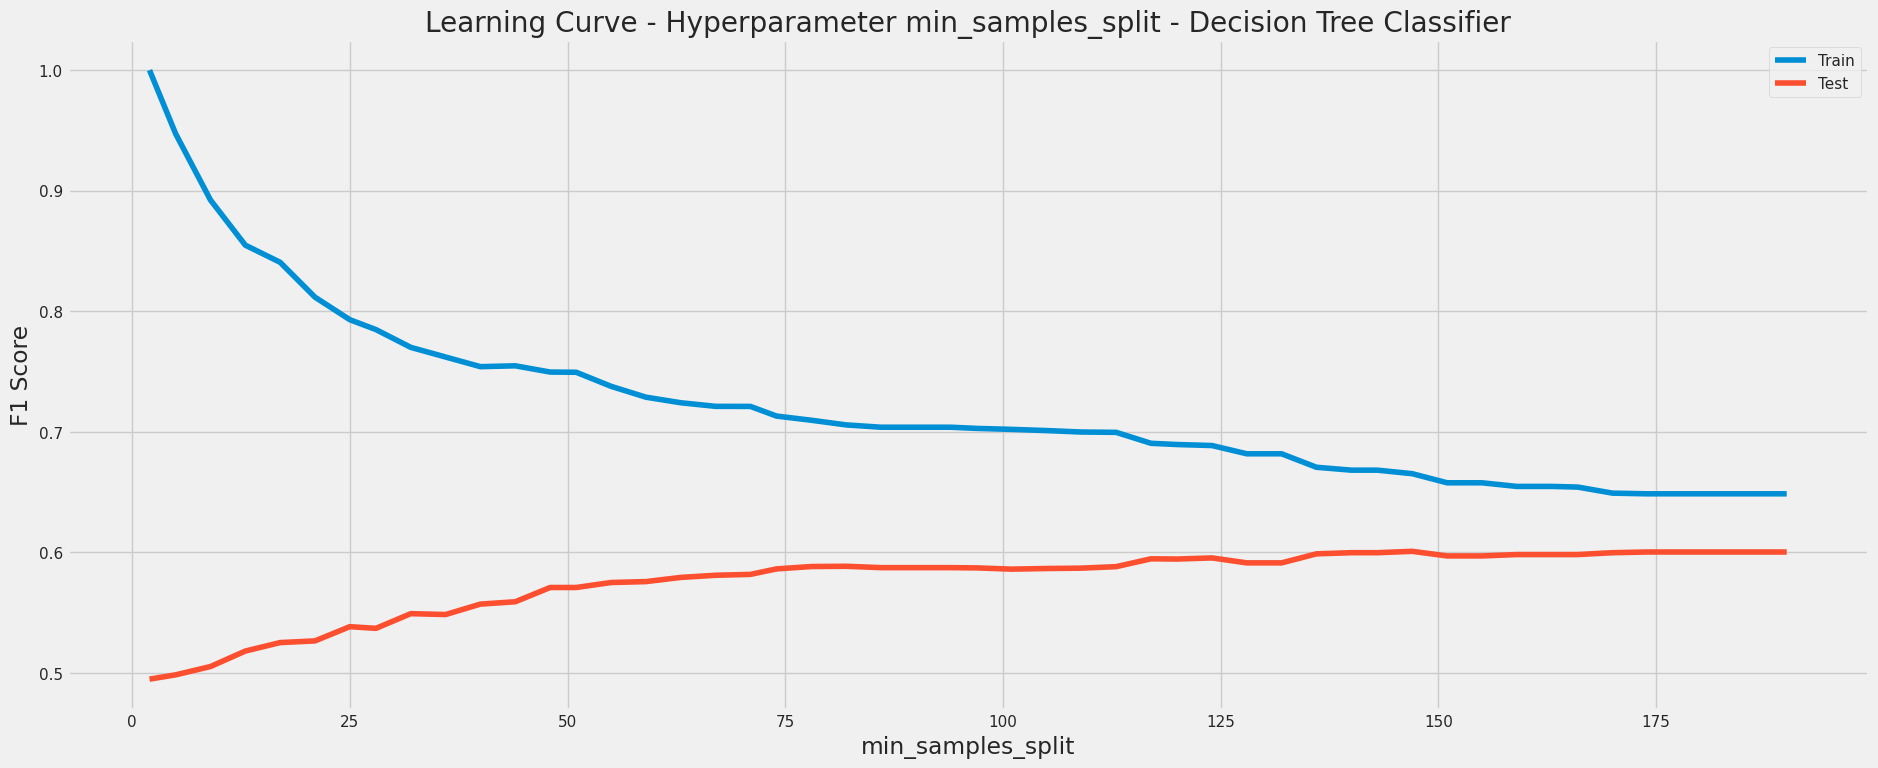

In [ ]:
param_values = [int(x) for x in np.linspace(2, 190, 50)]
draw_learning_curve(param_values)

Between 170 and 175 of min_samples_split parameter, the model has the highest F1 score but still tolerable on the error difference between data training and data testing.

#### Tuning Min Samples Leaf Parameter

param value: 1; train: 1.0; test: 0.5039596832253419; % diff: 49.6%; % increase: 0.0%
param value: 2; train: 0.9199999999999999; test: 0.4944707740916272; % diff: 42.55%; % increase: -0.95%
param value: 3; train: 0.8874779541446209; test: 0.5112781954887218; % diff: 37.62%; % increase: 1.68%
param value: 4; train: 0.839868083547087; test: 0.5246422893481717; % diff: 31.52%; % increase: 1.34%
param value: 5; train: 0.8234453180843461; test: 0.5297805642633229; % diff: 29.37%; % increase: 0.51%
param value: 6; train: 0.8042366691015339; test: 0.5451638689048761; % diff: 25.91%; % increase: 1.54%
param value: 7; train: 0.7962359753890699; test: 0.5504439063761098; % diff: 24.58%; % increase: 0.53%
param value: 8; train: 0.7806309611151871; test: 0.5554655870445344; % diff: 22.52%; % increase: 0.5%
param value: 9; train: 0.7746123332131265; test: 0.5535289452815226; % diff: 22.11%; % increase: -0.19%
param value: 10; train: 0.7591508052708638; test: 0.5638554216867468; % diff: 19.53%; % in

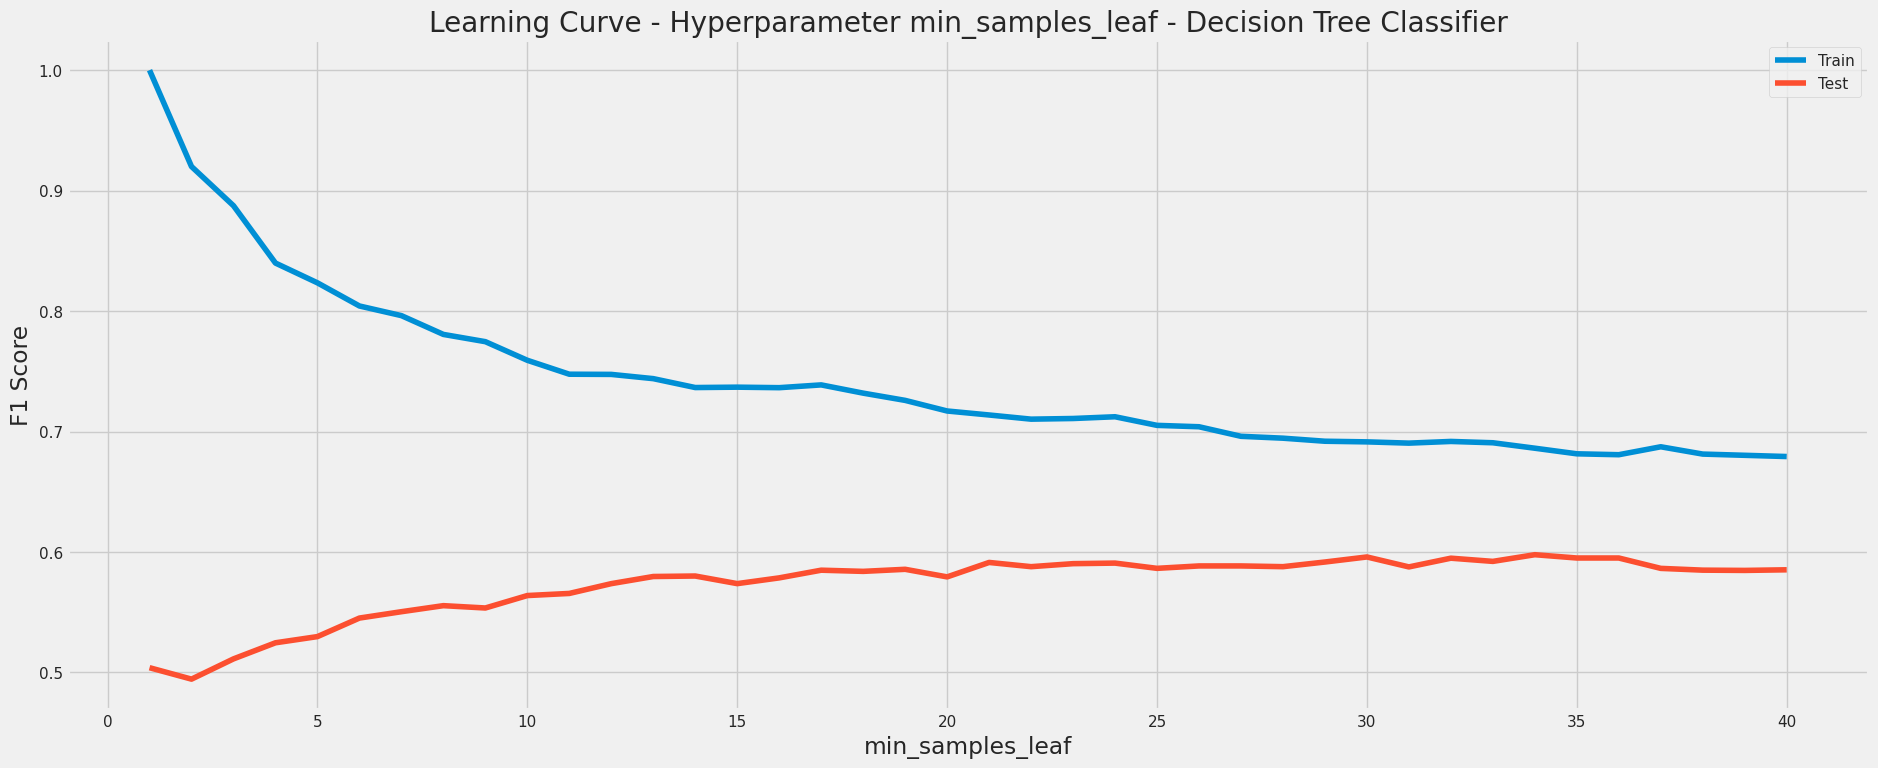

In [ ]:
param_values = [int(x) for x in np.linspace(1, 40, 40)]
draw_learning_curve(param_values)

Between 30 and 35 of min_samples_leaf parameter, the model achieved the highest F1 score with tolerable error difference between data training and data testing.

#### Tuning Max Leaf Nodes Parameter

param value: 2; train: 0.5696321911348633; test: 0.48480930833872005; % diff: 8.48%; % increase: 0.0%
param value: 3; train: 0.602078239608802; test: 0.5075566750629723; % diff: 9.45%; % increase: 2.27%
param value: 4; train: 0.5490033222591362; test: 0.5141242937853108; % diff: 3.49%; % increase: 0.66%
param value: 5; train: 0.5490033222591362; test: 0.5141242937853108; % diff: 3.49%; % increase: 0.0%
param value: 6; train: 0.5490033222591362; test: 0.5141242937853108; % diff: 3.49%; % increase: 0.0%
param value: 7; train: 0.5792038992688872; test: 0.53690036900369; % diff: 4.23%; % increase: 2.28%
param value: 8; train: 0.5792038992688872; test: 0.53690036900369; % diff: 4.23%; % increase: 0.0%
param value: 9; train: 0.5630289532293987; test: 0.5309168443496801; % diff: 3.21%; % increase: -0.6%
param value: 10; train: 0.5881838074398249; test: 0.5585774058577406; % diff: 2.96%; % increase: 2.77%
param value: 11; train: 0.6295379537953795; test: 0.5914396887159533; % diff: 3.81%; % in

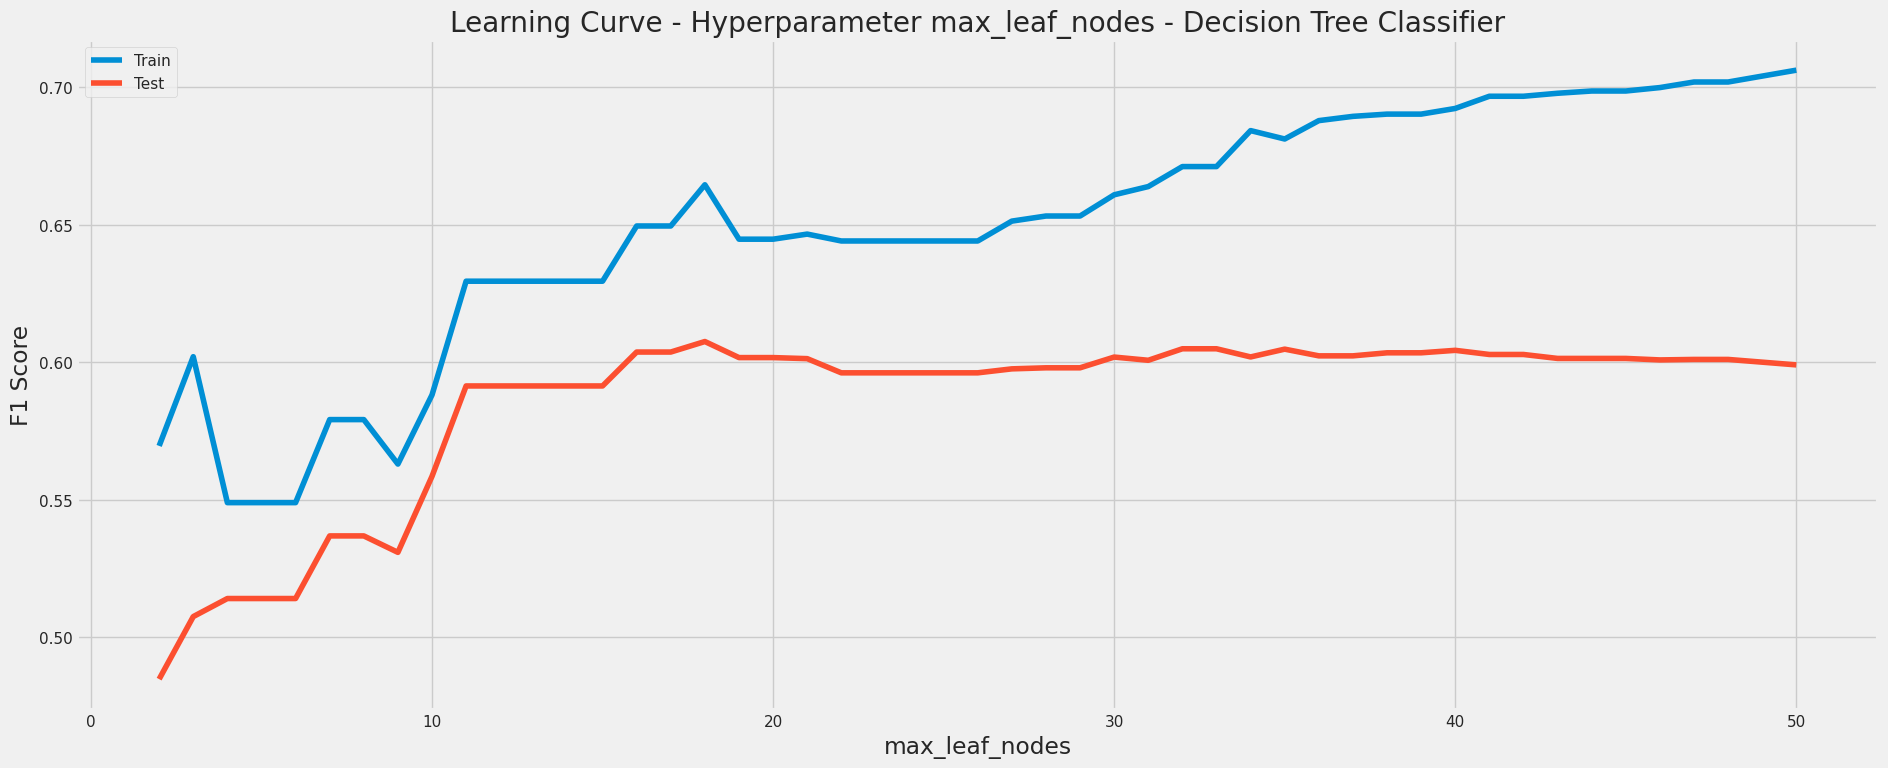

In [ ]:
param_values = [int(x) for x in np.linspace(2, 50, 48)]
draw_learning_curve(param_values)

Between 15 and 20 of max_leaf_nodes parameter, the model achieved the highest F1 score but still tolerable on the error difference between data training and data testing.

#### Tuning Class Weight Parameter

In [ ]:
param_values = ['balanced', None]
hyperparameter(param_values)

param value: balanced; train: 1.0; test: 0.49042145593869735; % diff: 50.96%; % increase: 0.0%
param value: None; train: 1.0; test: 0.5007194244604317; % diff: 49.93%; % increase: 1.03%


without adding class weight has the highest F1 score but overfitting

#### Final Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

hyperparameters = dict(max_leaf_nodes = [int(x) for x in np.linspace(15, 20, 3)],
                       min_samples_leaf = [int(x) for x in np.linspace(30, 35, 3)],
                       min_samples_split = [int(x) for x in np.linspace(170, 175, 3)],
                       max_depth = [int(x) for x in np.linspace(3, 8, 5)]
                      )

dt = DecisionTreeClassifier()
gs = GridSearchCV(dt, hyperparameters, scoring='f1', cv=10)
gs.fit(X_under, y_under)
classification_bal(gs)

Accuracy (Train Set): 0.82
Accuracy (Test Set): 0.86
Precision (Train Set): 0.76
Precision (Test Set): 0.65
Recall (Train Set): 0.56
Recall (Test Set): 0.55
F1-Score (Train Set): 0.65
F1-Score (Test Set): 0.60
roc_auc (train-proba): 0.84
roc_auc (test-proba): 0.83

F1-Score (crossval train): 0.65
F1-Score (crossval test): 0.64
recall (crossval train): 0.58
recall (crossval test): 0.56
ROC_AUC (crossval train): 0.85
ROC_AUC (crossval test): 0.83
Precision (crossval train): 0.76
Precision (crossval test): 0.74
Accuracy (crossval train): 0.82
Accuracy (crossval test): 0.81


#### Compare Metrics Results with Default Parameter

After tuning the hyperparameter, the model increasing all metrics but only ROC-AUC that is not underfit. Positively aside, our model is not overfitting again after tuning the parameter, thus we can also consider this as the selected model for predicting the churn.

### Random Forest Tree

Some of default parameters:

1. n_estimators = 100
2. criterion = gini
3. max_depth = None
4. min_samples_split = 2
5. min_samples_leaf = 1
6. max_leaf_nodes = None
7. min_impurity_decrease = 0.0
8. class_weight = None
9. max_sample = None
10. min_weight_fraction_leaf = 0.0

In [ ]:
# define draw learning curve for finding the best parameter

import numpy as np
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier

def draw_learning_curve(param_values):
    train_scores = []
    test_scores = []
    i = 0

    for c in param_values:
        model = RandomForestClassifier(max_leaf_nodes = c, class_weight = 'balanced', random_state = 42)
        model.fit(X_under, y_under)

        # eval on train
        y_pred_train = model.predict(X_under)
        train_f1 = f1_score(y_under, y_pred_train)
        train_scores.append(train_f1)

        # eval on test
        y_pred = model.predict(X_test)
        test_f1 = f1_score(y_test, y_pred)
        test_scores.append(test_f1)

        print('param value: ' + str(c) + '; train: ' + str(train_f1) + '; test: '+ str(test_f1) + '; % diff: ' + str(round((train_f1 - test_f1) * 100, 2)) + '%' + '; % increase: ' + str(round((test_scores[i] - test_scores[i-1]) * 100, 2)) + '%')

        i += 1

    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.xlabel('max_leaf_nodes')
    plt.ylabel('F1 Score')
    plt.title('Learning Curve - Hyperparameter max_leaf_nodes - Random Forest Tree')
    plt.legend()
    plt.show()

In [ ]:
# define function for finding the best parameter

import numpy as np
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier

def hyperparameter(param_values):
    train_scores = []
    test_scores = []
    i = 0

    for c in param_values:
        model = RandomForestClassifier(class_weight = c)
        model.fit(X_under, y_under)

        # eval on train
        y_pred_train = model.predict(X_under)
        train_f1 = f1_score(y_under, y_pred_train)
        train_scores.append(train_f1)

        # eval on test
        y_pred = model.predict(X_test)
        test_f1 = f1_score(y_test, y_pred)
        test_scores.append(test_f1)

        print('param value: ' + str(c) + '; train: ' + str(train_f1) + '; test: '+ str(test_f1) + '; % diff: ' + str(round((train_f1 - test_f1) * 100, 2)) + '%' + '; % increase: ' + str(round((test_scores[i] - test_scores[i-1]) * 100, 2)) + '%')

        i += 1

#### Tuning Class Weight Parameter

In [ ]:
param_values = ['balanced', 'balanced_subsample', None]
hyperparameter(param_values)

param value: balanced; train: 1.0; test: 0.609271523178808; % diff: 39.07%; % increase: 0.0%
param value: balanced_subsample; train: 1.0; test: 0.6032350142721219; % diff: 39.68%; % increase: -0.6%
param value: None; train: 1.0; test: 0.5966228893058161; % diff: 40.34%; % increase: -0.66%


balanced class weight has the highest F1 score but overfitting

#### Tuning Min Samples Split Parameter

param value: 2; train: 1.0; test: 0.6139180171591992; % diff: 38.61%; % increase: 0.0%
param value: 9; train: 0.9341072038238306; test: 0.6260434056761269; % diff: 30.81%; % increase: 1.21%
param value: 16; train: 0.8715874620829122; test: 0.6124704025256512; % diff: 25.91%; % increase: -1.36%
param value: 23; train: 0.8312208138759172; test: 0.6112804878048781; % diff: 21.99%; % increase: -0.12%
param value: 30; train: 0.808496515101228; test: 0.6117297698589458; % diff: 19.68%; % increase: 0.04%
param value: 37; train: 0.7876397107166337; test: 0.6073529411764705; % diff: 18.03%; % increase: -0.44%
param value: 44; train: 0.7852239293886891; test: 0.6089508437270725; % diff: 17.63%; % increase: 0.16%
param value: 51; train: 0.7699346405228759; test: 0.608195542774982; % diff: 16.17%; % increase: -0.08%
param value: 58; train: 0.7543408360128617; test: 0.5981703026038002; % diff: 15.62%; % increase: -1.0%
param value: 65; train: 0.7510333863275039; test: 0.6061855670103093; % diff: 14

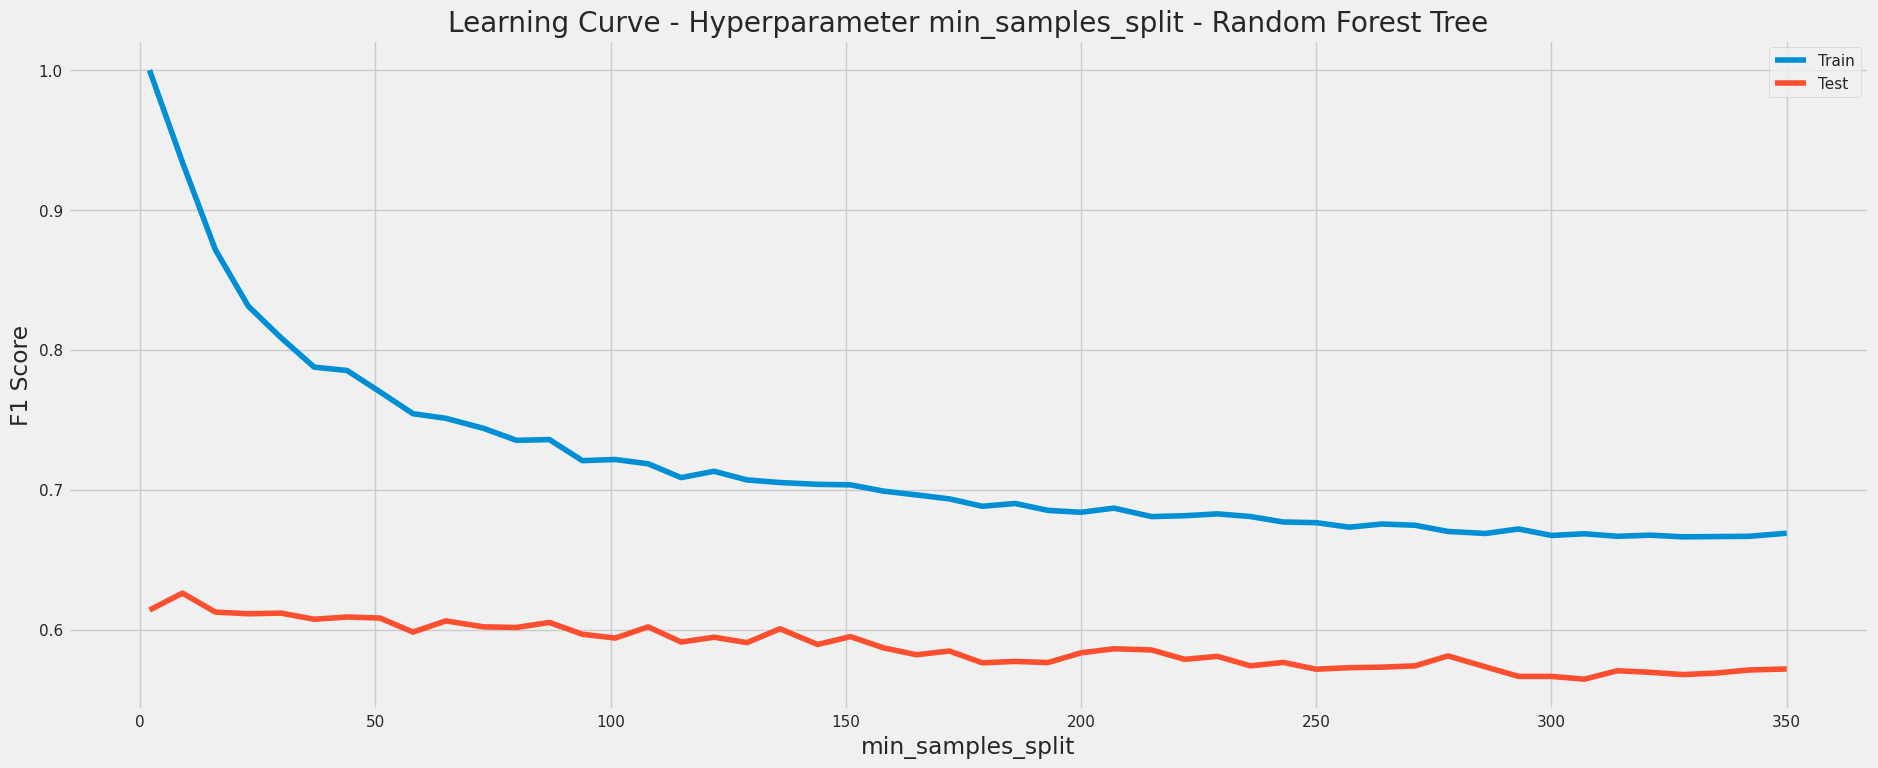

In [ ]:
param_values = [int(x) for x in np.linspace(2, 350, 50)]
draw_learning_curve(param_values)

Between 290 until 295 of min_samples_split parameter, the model achieved the highest F1 scores with tolerable error difference between data training and data testing

#### Tuning Min Weight Fraction Leaf

param value: 0.0; train: 1.0; test: 0.6139180171591992; % diff: 38.61%; % increase: 0.0%
param value: 0.016666666666666666; train: 0.6836609336609337; test: 0.5718015665796344; % diff: 11.19%; % increase: -4.21%
param value: 0.03333333333333333; train: 0.6612806702573311; test: 0.5545053560176434; % diff: 10.68%; % increase: -1.73%
param value: 0.05; train: 0.6507462686567164; test: 0.5500314663310257; % diff: 10.07%; % increase: -0.45%
param value: 0.06666666666666667; train: 0.641203007518797; test: 0.5477545857052498; % diff: 9.34%; % increase: -0.23%
param value: 0.08333333333333333; train: 0.6230099128867528; test: 0.5261829652996847; % diff: 9.68%; % increase: -2.16%
param value: 0.1; train: 0.6192619261926192; test: 0.5278298936835523; % diff: 9.14%; % increase: 0.16%
param value: 0.11666666666666667; train: 0.6162514827995255; test: 0.5184275184275186; % diff: 9.78%; % increase: -0.94%
param value: 0.13333333333333333; train: 0.6209150326797386; test: 0.5136138613861385; % diff

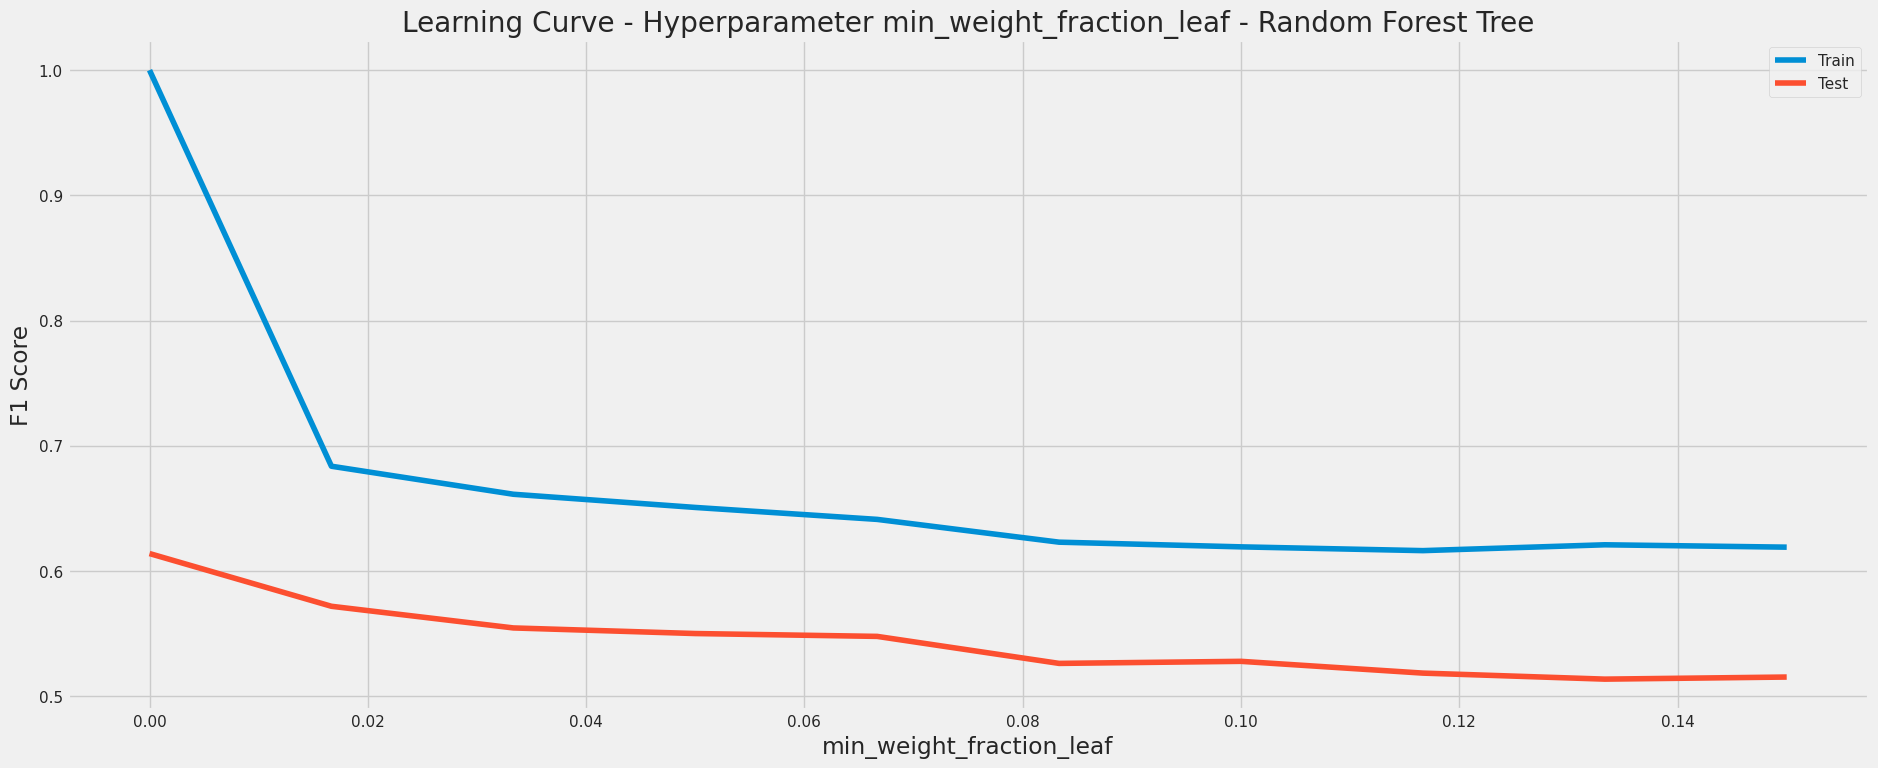

In [ ]:
param_values = [float(x) for x in np.linspace(0, 0.15, 10)]
draw_learning_curve(param_values)

Between 0.05 until 0.1 of min_weight_fraction_leaf parameter, the model achieved the highest F1 scores but still tolerable on the error difference between data training and data testing

#### Tuning Max Leaf Nodes Parameter

param value: 2; train: 0.6321181078638143; test: 0.5403022670025189; % diff: 9.18%; % increase: 0.0%
param value: 8; train: 0.6622032866707243; test: 0.5616966580976864; % diff: 10.05%; % increase: 2.14%
param value: 14; train: 0.6728913787737317; test: 0.572944297082228; % diff: 9.99%; % increase: 1.12%
param value: 21; train: 0.684769038701623; test: 0.5756358768406961; % diff: 10.91%; % increase: 0.27%
param value: 27; train: 0.695376820772641; test: 0.5795531482735273; % diff: 11.58%; % increase: 0.39%
param value: 34; train: 0.7103755569700826; test: 0.5860400829302005; % diff: 12.43%; % increase: 0.65%
param value: 40; train: 0.7202819609099647; test: 0.5868347338935574; % diff: 13.34%; % increase: 0.08%
param value: 47; train: 0.7302100161550888; test: 0.5920679886685551; % diff: 13.81%; % increase: 0.52%
param value: 53; train: 0.7376995764092539; test: 0.5971428571428571; % diff: 14.06%; % increase: 0.51%
param value: 60; train: 0.747051114023591; test: 0.5991379310344828; % d

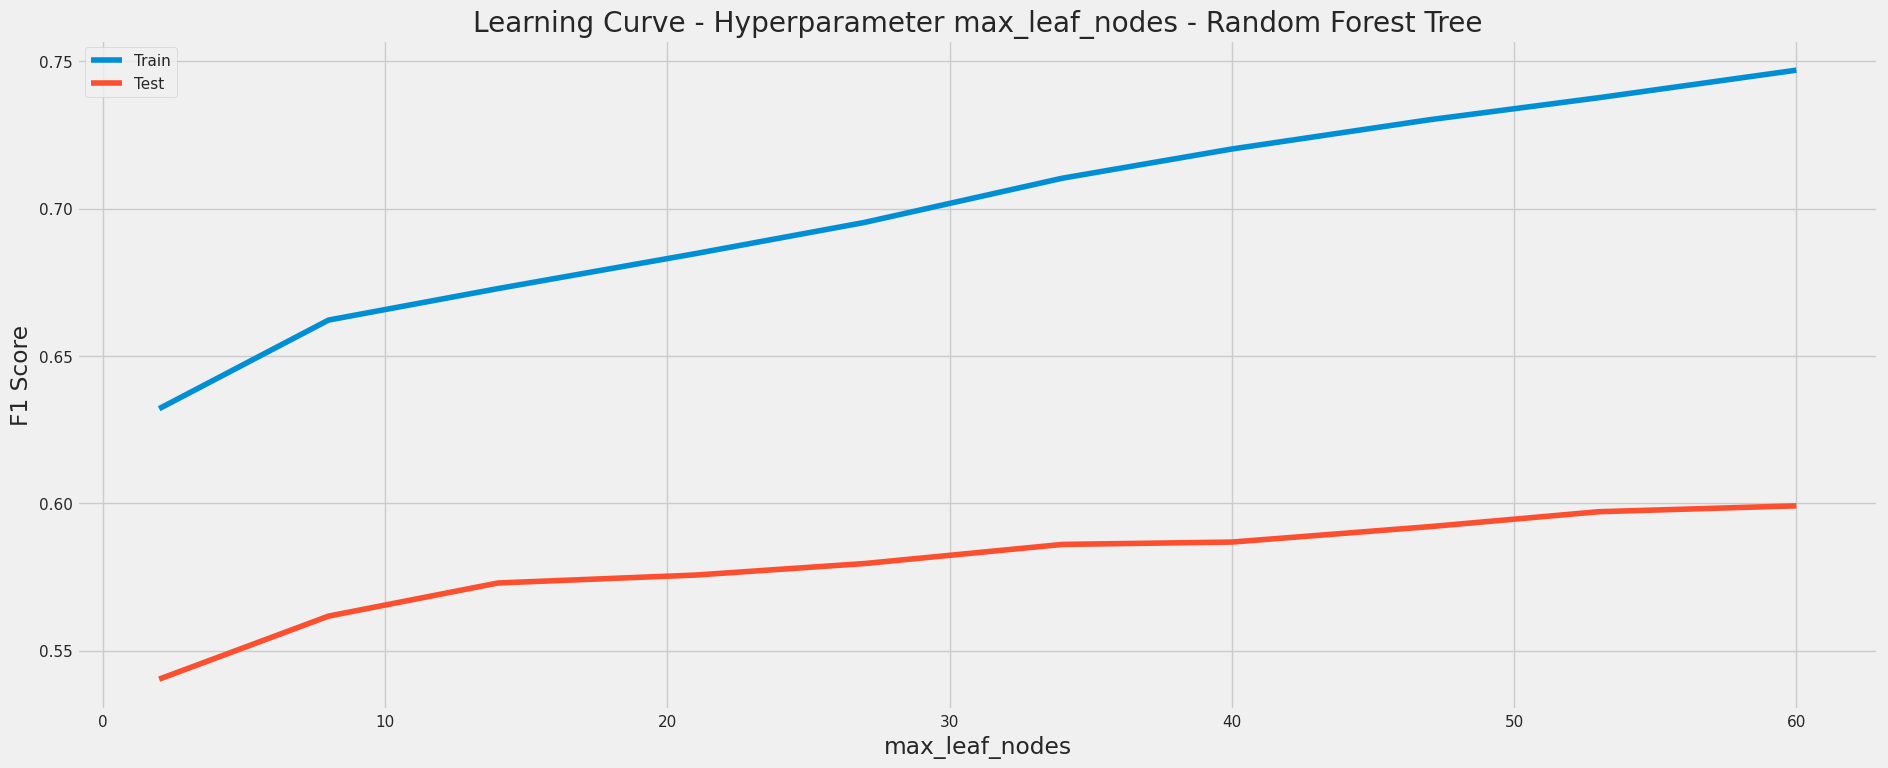

In [ ]:
param_values = [int(x) for x in np.linspace(2, 60, 10)]
draw_learning_curve(param_values)

with max_leaf_nodes = 2, the model achieved the highest F1 score but still tolerable on the error difference between data training and data testing

#### Tuning Max Samples Parameter

param value: 0.01; train: 0.37372105546580503; test: 0.34172185430463575; % diff: 3.2%; % increase: 0.0%
param value: 0.0325; train: 0.5546296296296296; test: 0.5164212910532278; % diff: 3.82%; % increase: 17.47%
param value: 0.05500000000000001; train: 0.6145054945054945; test: 0.558288770053476; % diff: 5.62%; % increase: 4.19%
param value: 0.0775; train: 0.6537966537966537; test: 0.5964912280701754; % diff: 5.73%; % increase: 3.82%
param value: 0.1; train: 0.6757215619694397; test: 0.5708376421923476; % diff: 10.49%; % increase: -2.57%


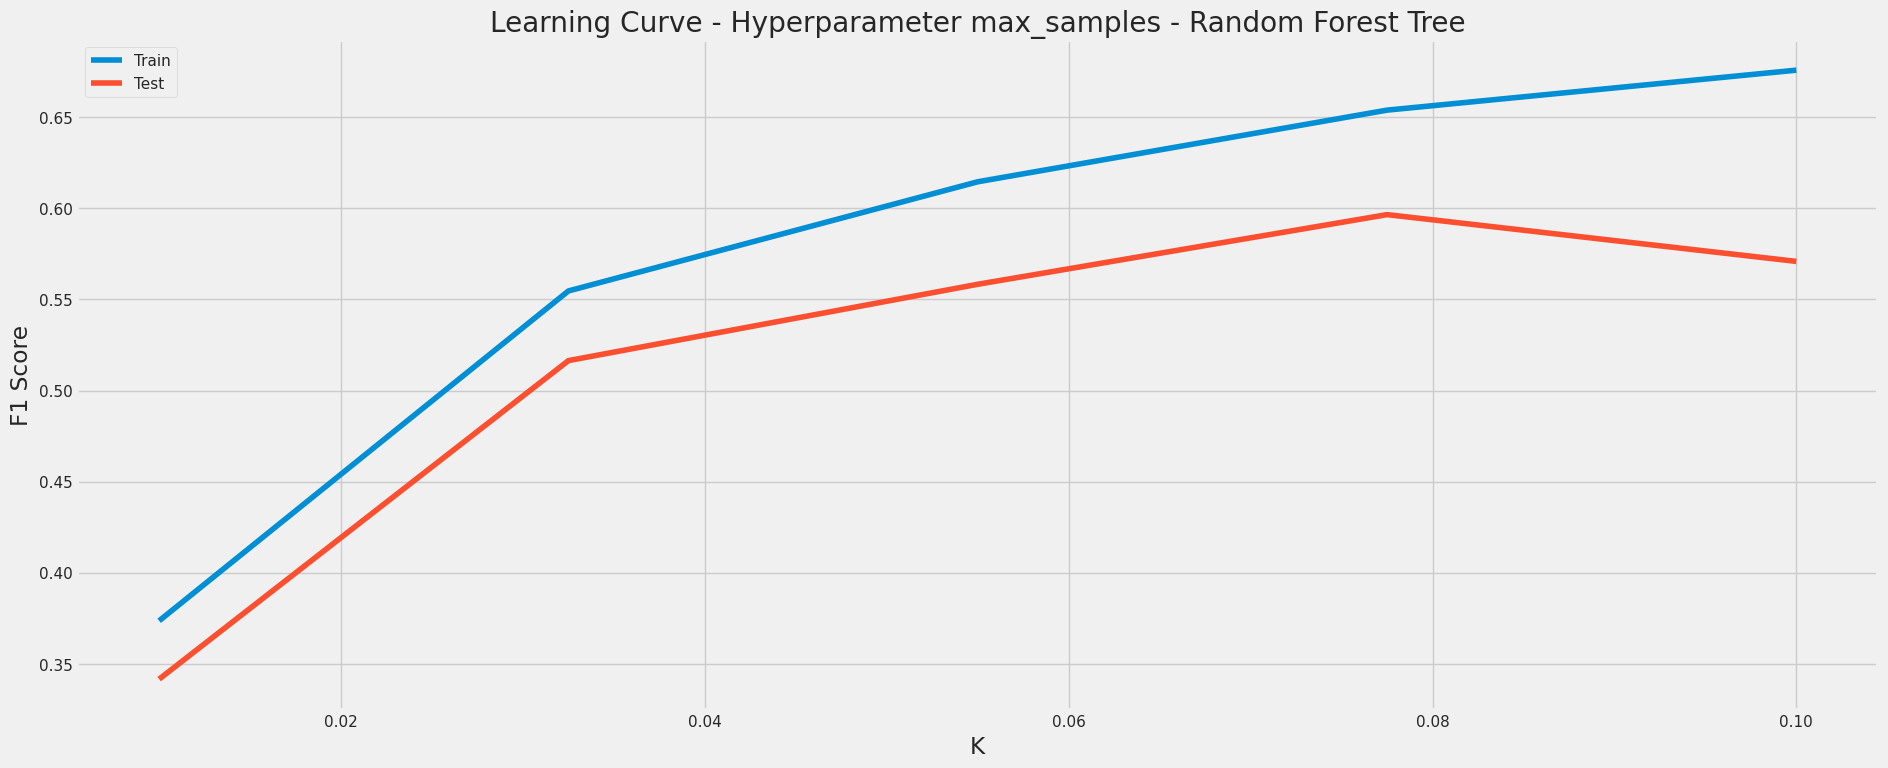

In [ ]:
param_values = [float(x) for x in np.linspace(0.01, 0.1, 5)]
draw_learning_curve(param_values)

Between 0.075 until 0.085 of max_samples parameter, the model achieved the highest F1 score but still tolerable on the error difference between data training and data testing

#### Final Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

hyperparameters = dict(max_samples = [float(x) for x in np.linspace(0.075, 0.085, 3)],
                       max_leaf_nodes = [2],
                       min_weight_fraction_leaf = [float(x) for x in np.linspace(0.05, 0.1, 3)],
                       min_samples_split = [int(x) for x in np.linspace(290, 295, 3)]
                      )

rf = RandomForestClassifier(class_weight = 'balanced', random_state = 42)
gs = GridSearchCV(rf, hyperparameters, scoring='f1', cv=10)
gs.fit(X_under, y_under)
classification_bal(gs)

Accuracy (Train Set): 0.76
Accuracy (Test Set): 0.76
Precision (Train Set): 0.58
Precision (Test Set): 0.43
Recall (Train Set): 0.70
Recall (Test Set): 0.71
F1-Score (Train Set): 0.64
F1-Score (Test Set): 0.54
roc_auc (train-proba): 0.82
roc_auc (test-proba): 0.82

F1-Score (crossval train): 0.64
F1-Score (crossval test): 0.64
recall (crossval train): 0.72
recall (crossval test): 0.72
ROC_AUC (crossval train): 0.82
ROC_AUC (crossval test): 0.82
Precision (crossval train): 0.58
Precision (crossval test): 0.58
Accuracy (crossval train): 0.76
Accuracy (crossval test): 0.76


#### Compare Metrics Results with Default Parameter

After tuning the hyperparameter, the model only increasing Recall while the others are not. Positively aside, our model is not overfitting again after tuning the parameter and so far this model is the best result because we achieved score for Recall and ROC-AUC over 70% that could support the score for F1 score, thus we can also consider this as the selected model for predicting the churn.

### AdaBoost

Some of default parameters:

1. estimator = None
2. n_estimators = 50
3. learning_rate = 1.0
4. algorithm = SAMME.R

In [ ]:
# define draw learning curve for finding the best parameter

import numpy as np
from matplotlib import pyplot as plt
from sklearn.ensemble import AdaBoostClassifier

def draw_learning_curve(param_values):
    train_scores = []
    test_scores = []
    i = 0

    for c in param_values:
        model = AdaBoostClassifier(learning_rate = c)
        model.fit(X_under, y_under)

        # eval on train
        y_pred_train = model.predict(X_under)
        train_f1 = f1_score(y_under, y_pred_train)
        train_scores.append(train_f1)

        # eval on test
        y_pred = model.predict(X_test)
        test_f1 = f1_score(y_test, y_pred)
        test_scores.append(test_f1)

        print('param value: ' + str(c) + '; train: ' + str(train_f1) + '; test: '+ str(test_f1) + '; % diff: ' + str(round((train_f1 - test_f1) * 100, 2)) + '%' + '; % increase: ' + str(round((test_scores[i] - test_scores[i-1]) * 100, 2)) + '%')

        i += 1

    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.xlabel('learning_rate')
    plt.ylabel('F1 Score')
    plt.title('Learning Curve - Hyperparameter learning_rate - AdaBoost Classifier')
    plt.legend()
    plt.show()

In [ ]:
# define function for finding the best parameter

import numpy as np
from matplotlib import pyplot as plt
from sklearn.ensemble import AdaBoostClassifier

def hyperparameter(param_values):
    train_scores = []
    test_scores = []
    i = 0

    for c in param_values:
        model = AdaBoostClassifier(algorithm = c)
        model.fit(X_under, y_under)

        # eval on train
        y_pred_train = model.predict(X_under)
        train_f1 = f1_score(y_under, y_pred_train)
        train_scores.append(train_f1)

        # eval on test
        y_pred = model.predict(X_test)
        test_f1 = f1_score(y_test, y_pred)
        test_scores.append(test_f1)

        print('param value: ' + str(c) + '; train: ' + str(train_f1) + '; test: '+ str(test_f1) + '; % diff: ' + str(round((train_f1 - test_f1) * 100, 2)) + '%' + '; % increase: ' + str(round((test_scores[i] - test_scores[i-1]) * 100, 2)) + '%')

        i += 1

#### Tuning n_estimators Parameter

param value: 35; train: 0.6454862456412244; test: 0.6096256684491979; % diff: 3.59%; % increase: 0.0%
param value: 36; train: 0.6456140350877193; test: 0.6051924798567592; % diff: 4.04%; % increase: -0.44%
param value: 37; train: 0.6454862456412244; test: 0.6083853702051739; % diff: 3.71%; % increase: 0.32%
param value: 38; train: 0.6482059282371294; test: 0.6087735004476275; % diff: 3.94%; % increase: 0.04%
param value: 39; train: 0.6493001555209954; test: 0.611111111111111; % diff: 3.82%; % increase: 0.23%
param value: 40; train: 0.6527455529775715; test: 0.6118479221927497; % diff: 4.09%; % increase: 0.07%
param value: 41; train: 0.6563706563706563; test: 0.6136162687886825; % diff: 4.28%; % increase: 0.18%
param value: 42; train: 0.6568892319567734; test: 0.6136162687886825; % diff: 4.33%; % increase: 0.0%
param value: 43; train: 0.6571428571428573; test: 0.6136162687886825; % diff: 4.35%; % increase: 0.0%
param value: 44; train: 0.657418111753372; test: 0.6106194690265486; % diff:

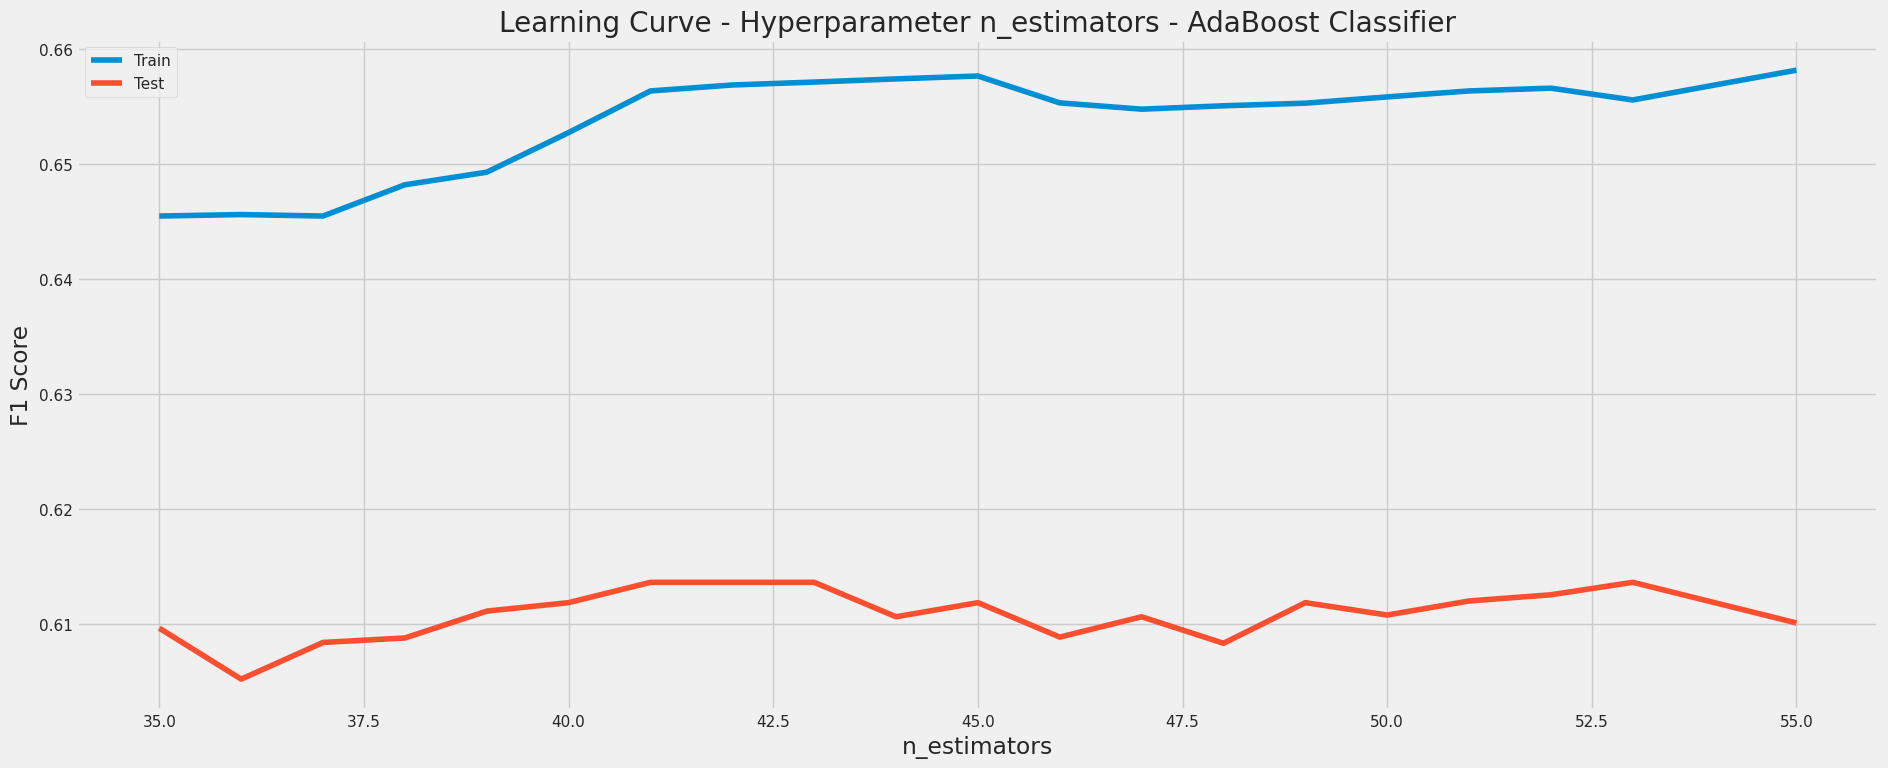

In [ ]:
param_values = [int(x) for x in np.linspace(35, 55, 20)]
draw_learning_curve(param_values)

Between 50 until 55 of n_estimators parameter, the model achieved the highest F1 score but still tolerable on the error difference between data training and data testing

#### Tuning Learning Rate Parameter

param value: 1.0; train: 0.6558516801853999; test: 0.6107678729037952; % diff: 4.51%; % increase: 0.0%
param value: 1.1111111111111112; train: 0.6603126191383911; test: 0.6104347826086957; % diff: 4.99%; % increase: -0.03%
param value: 1.2222222222222223; train: 0.6557632398753894; test: 0.6073674752920036; % diff: 4.84%; % increase: -0.31%
param value: 1.3333333333333333; train: 0.6506955177743431; test: 0.6107142857142858; % diff: 4.0%; % increase: 0.33%
param value: 1.4444444444444444; train: 0.6518063028439662; test: 0.6024518388791594; % diff: 4.94%; % increase: -0.83%
param value: 1.5555555555555556; train: 0.6582278481012658; test: 0.59135039717564; % diff: 6.69%; % increase: -1.11%
param value: 1.6666666666666665; train: 0.6541984732824426; test: 0.6024305555555555; % diff: 5.18%; % increase: 1.11%
param value: 1.7777777777777777; train: 0.6505295007564297; test: 0.5912596401028278; % diff: 5.93%; % increase: -1.12%
param value: 1.8888888888888888; train: 0.6483558994197293; te

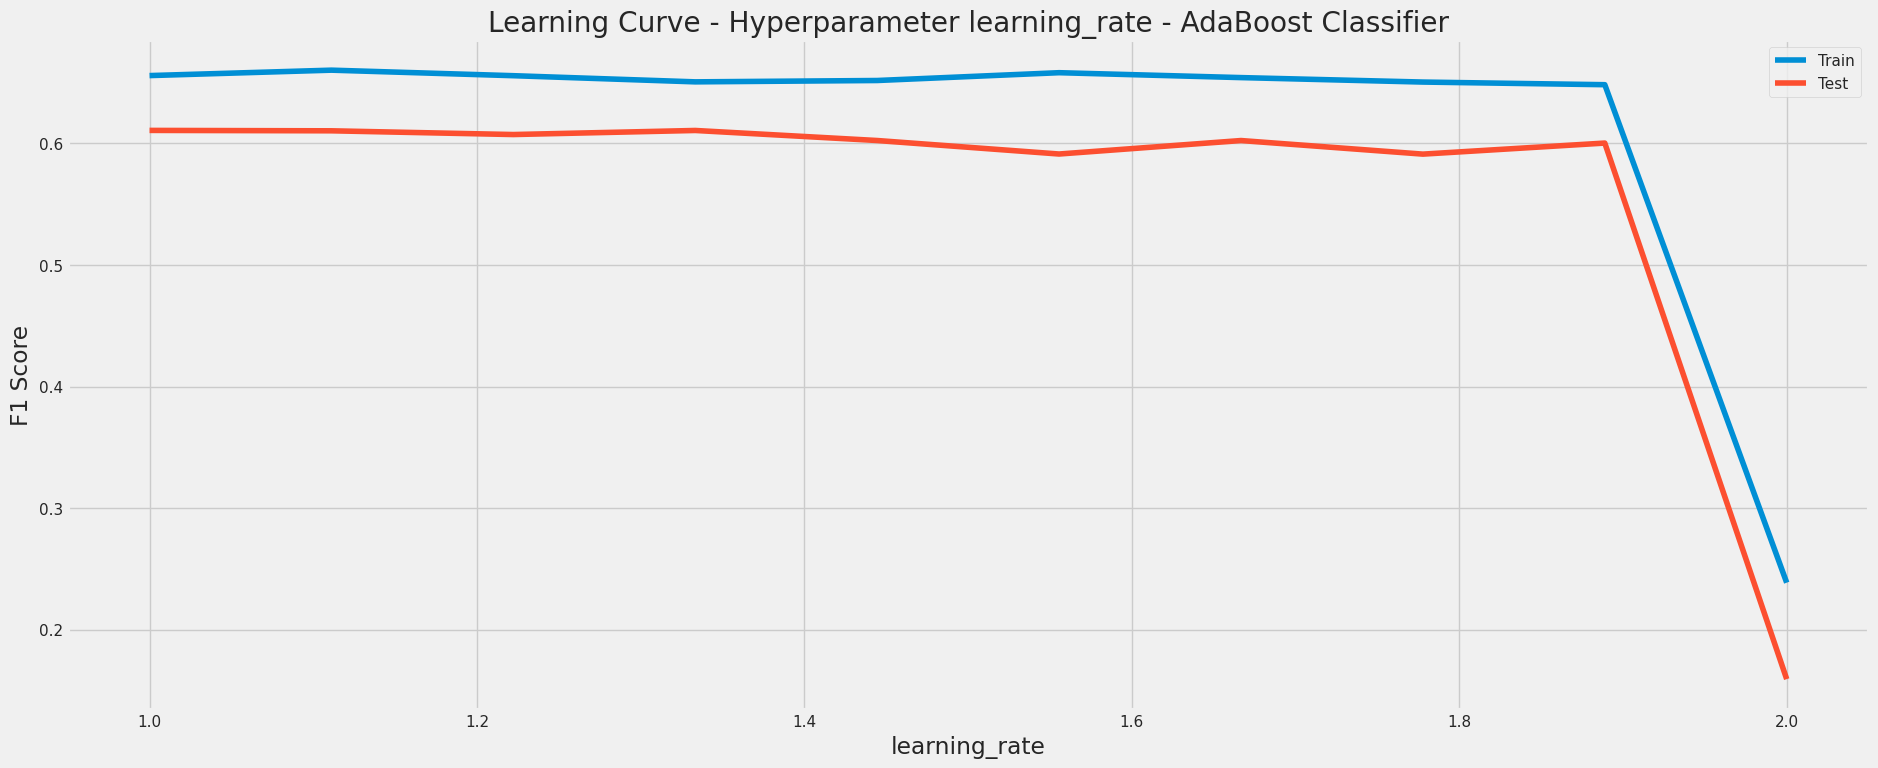

In [ ]:
param_values = [float(x) for x in np.linspace(1, 2, 10)]
draw_learning_curve(param_values)

default parameter of learning_rate has the highest F1 score but still tolerable on the error difference between data training and data testing

#### Tuning Algorithm Parameter

In [ ]:
param_values = ['SAMME', 'SAMME.R']
hyperparameter(param_values)

param value: SAMME; train: 0.6423300970873788; test: 0.5958595859585958; % diff: 4.65%; % increase: 0.0%
param value: SAMME.R; train: 0.6558516801853999; test: 0.6107678729037952; % diff: 4.51%; % increase: 1.49%


default parameter of algorithm has the highest F1 score but still tolerable on the error difference between data training and data testing

#### Final Tuning

In [ ]:
hyperparameters = dict(n_estimators = [int(x) for x in np.linspace(50, 55, 3)]
                      )

ab = AdaBoostClassifier()
gs = GridSearchCV(ab, hyperparameters, scoring='f1', cv=10)
gs.fit(X_under, y_under)
classification_bal(gs)

Accuracy (Train Set): 0.82
Accuracy (Test Set): 0.85
Precision (Train Set): 0.75
Precision (Test Set): 0.63
Recall (Train Set): 0.59
Recall (Test Set): 0.59
F1-Score (Train Set): 0.66
F1-Score (Test Set): 0.61
roc_auc (train-proba): 0.86
roc_auc (test-proba): 0.85

F1-Score (crossval train): 0.66
F1-Score (crossval test): 0.65
recall (crossval train): 0.59
recall (crossval test): 0.58
ROC_AUC (crossval train): 0.86
ROC_AUC (crossval test): 0.85
Precision (crossval train): 0.75
Precision (crossval test): 0.73
Accuracy (crossval train): 0.82
Accuracy (crossval test): 0.81


#### Compare Metrics Results with Default Parameter

There is no difference results after tuning the hyperparameter, but still we can also consider this as the selected model for predicting the churn.

### XGBoost

Some of default parameters:

1. booster = gbtree
2. eta = 0.3 (learning_rate)
3. gamma = 0 (min_split_loss)
4. max_depth = 6
5. min_child_weight = 1
6. subsample = 1
7. lambda = 1 (Ridge Regression)
8. alpha = 0 (Lasso Regression)
9. scale_pos_weight = 1
10. max_leaves = 0
11. num_parallel_tree = 1

In [ ]:
# define function for finding the best parameter

import numpy as np
from matplotlib import pyplot as plt
from xgboost import XGBClassifier

def draw_learning_curve(param_values):
    train_scores = []
    test_scores = []
    i = 0

    for c in param_values:
        model = XGBClassifier(max_leaves = c)
        model.fit(X_under, y_under)

        # eval on train
        y_pred_train = model.predict(X_under)
        train_f1 = f1_score(y_under, y_pred_train)
        train_scores.append(train_f1)

        # eval on test
        y_pred = model.predict(X_test)
        test_f1 = f1_score(y_test, y_pred)
        test_scores.append(test_f1)

        print('param value: ' + str(c) + '; train: ' + str(train_f1) + '; test: '+ str(test_f1) + '; % diff: ' + str(round((train_f1 - test_f1) * 100, 2)) + '%' + '; % increase: ' + str(round((test_scores[i] - test_scores[i-1]) * 100, 2)) + '%')

        i += 1

    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.xlabel('max_leaves')
    plt.ylabel('F1 Score')
    plt.title('Learning Curve - Hyperparameter max_leaves - XGBoost Classifier')
    plt.legend()
    plt.show()

#### Tuning Gamma Parameter

param value: 0; train: 0.9521446295639845; test: 0.6012269938650306; % diff: 35.09%; % increase: 0.0%
param value: 2; train: 0.7470817120622567; test: 0.6224677716390424; % diff: 12.46%; % increase: 2.12%
param value: 4; train: 0.6992125984251969; test: 0.6213953488372093; % diff: 7.78%; % increase: -0.11%
param value: 6; train: 0.6783999999999999; test: 0.6123222748815167; % diff: 6.61%; % increase: -0.91%
param value: 8; train: 0.6709781729991916; test: 0.60727969348659; % diff: 6.37%; % increase: -0.5%
param value: 10; train: 0.6588235294117648; test: 0.6011560693641619; % diff: 5.77%; % increase: -0.61%
param value: 12; train: 0.664763458401305; test: 0.6039215686274509; % diff: 6.08%; % increase: 0.28%
param value: 14; train: 0.6617707058343533; test: 0.6036644165863065; % diff: 5.81%; % increase: -0.03%
param value: 16; train: 0.6615322253749494; test: 0.6048309178743961; % diff: 5.67%; % increase: 0.12%
param value: 18; train: 0.6492753623188405; test: 0.5978367748279252; % diff

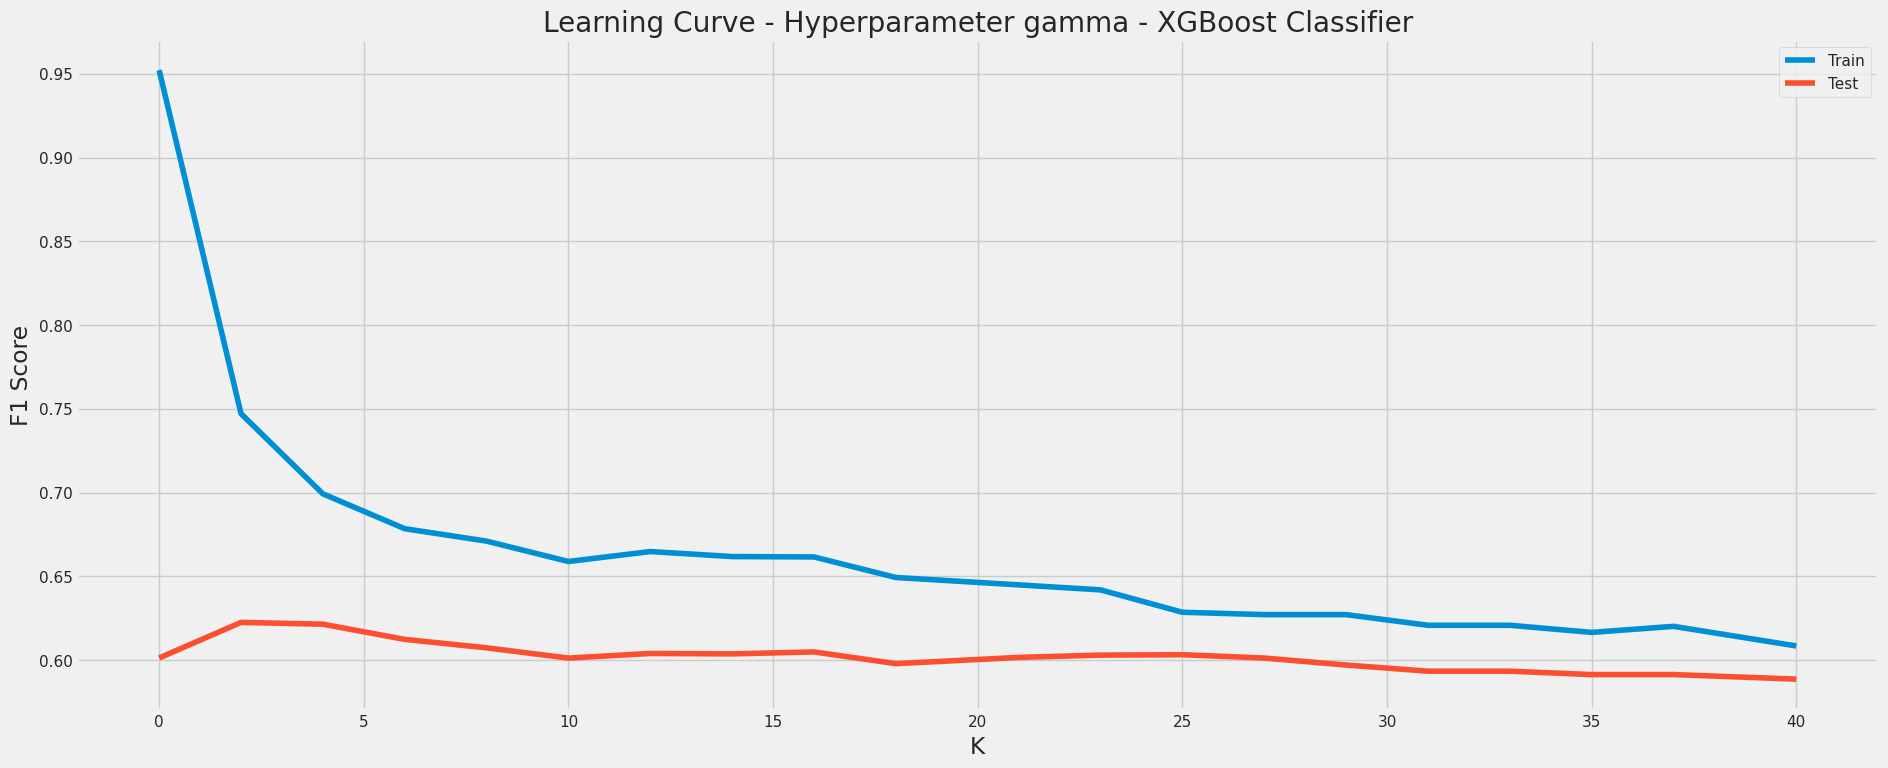

In [ ]:
param_values = param_values = [int(x) for x in np.linspace(0, 40, 20)]
draw_learning_curve(param_values)

Between 15 until 25 of gamma parameter, the model achieved the highest F1 score but still tolerable on the error difference between data training and data testing

#### Tuning Max Depth Parameter

param value: 0; train: 1.0; test: 0.5939914163090129; % diff: 40.6%; % increase: 0.0%
param value: 1; train: 0.6409542743538766; test: 0.6020313942751615; % diff: 3.89%; % increase: 0.8%
param value: 2; train: 0.6871508379888268; test: 0.6083720930232558; % diff: 7.88%; % increase: 0.63%
param value: 3; train: 0.7517509727626459; test: 0.620752984389348; % diff: 13.1%; % increase: 1.24%
param value: 4; train: 0.8137254901960784; test: 0.6076173604960142; % diff: 20.61%; % increase: -1.31%
param value: 5; train: 0.8879941434846267; test: 0.6055705300988319; % diff: 28.24%; % increase: -0.2%
param value: 6; train: 0.9521446295639845; test: 0.6012269938650306; % diff: 35.09%; % increase: -0.43%
param value: 7; train: 0.9934233298719279; test: 0.6036745406824147; % diff: 38.97%; % increase: 0.24%
param value: 8; train: 0.9996550534667127; test: 0.589041095890411; % diff: 41.06%; % increase: -1.46%
param value: 10; train: 1.0; test: 0.6030927835051546; % diff: 39.69%; % increase: 1.41%


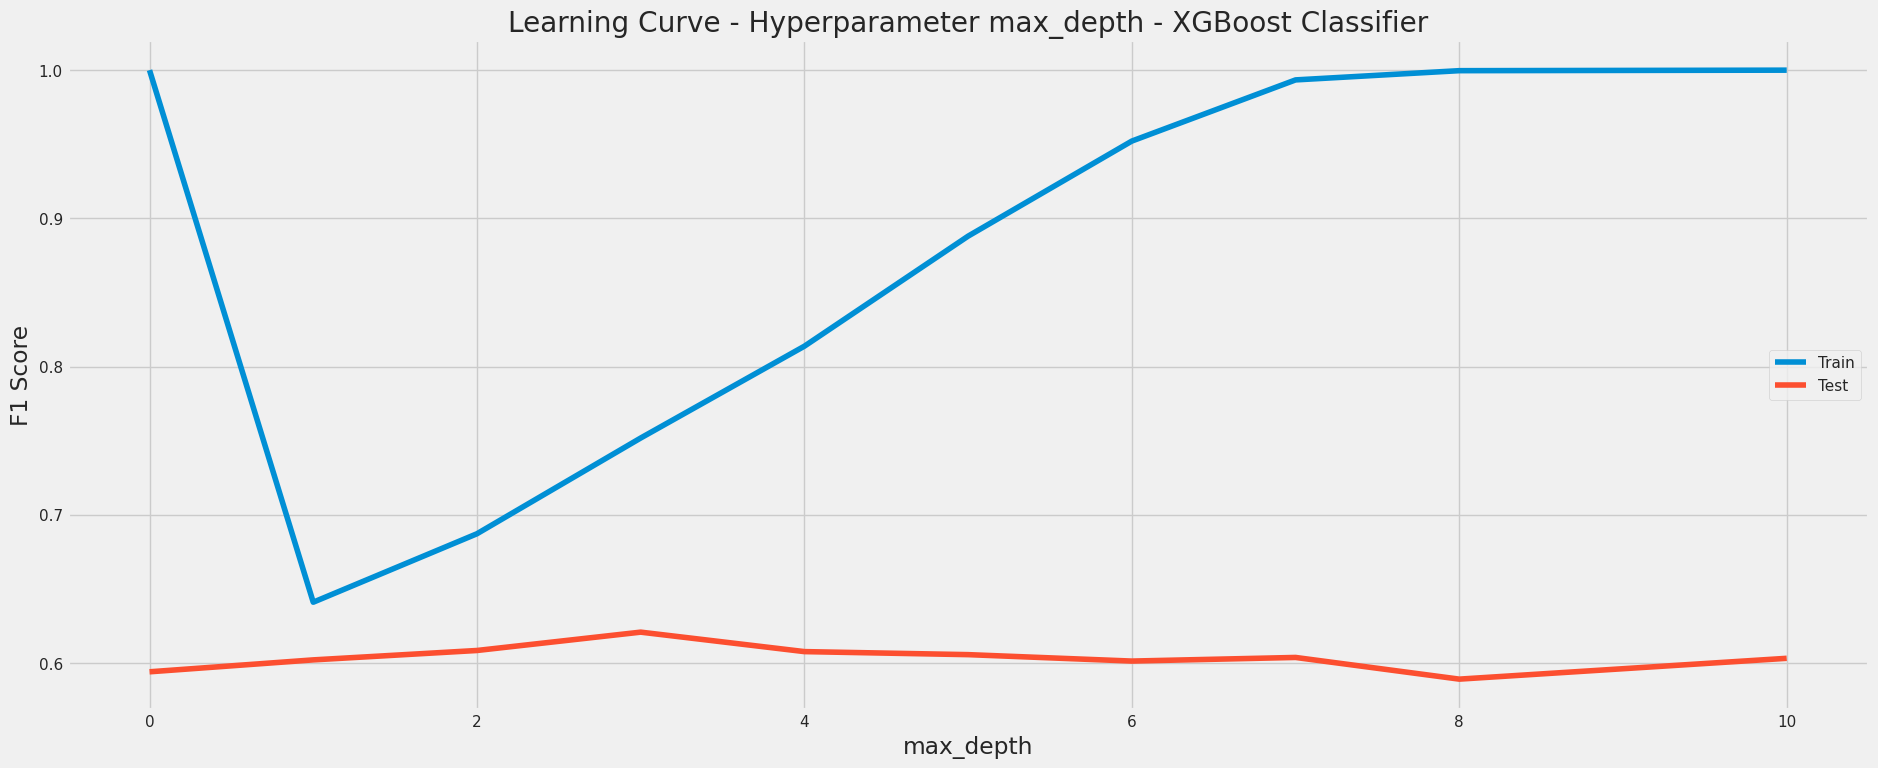

In [ ]:
param_values = param_values = [int(x) for x in np.linspace(0, 10, 10)]
draw_learning_curve(param_values)

with max_depth = 1, the model achieved highest F1 score on the lowest error difference between data training and data testing

#### Tuning Max Leaves Parameter

param value: 0; train: 0.9521446295639845; test: 0.6012269938650306; % diff: 35.09%; % increase: 0.0%
param value: 1; train: 0.0; test: 0.0; % diff: 0.0%; % increase: -60.12%
param value: 2; train: 0.6409542743538766; test: 0.6020313942751615; % diff: 3.89%; % increase: 60.2%
param value: 3; train: 0.6748612212529738; test: 0.6143790849673203; % diff: 6.05%; % increase: 1.23%
param value: 4; train: 0.6865552903739062; test: 0.6171003717472119; % diff: 6.95%; % increase: 0.27%
param value: 5; train: 0.7024275646045417; test: 0.6142728093947607; % diff: 8.82%; % increase: -0.28%
param value: 6; train: 0.726990291262136; test: 0.6227758007117437; % diff: 10.42%; % increase: 0.85%
param value: 7; train: 0.73933281613654; test: 0.6169064748201439; % diff: 12.24%; % increase: -0.59%
param value: 8; train: 0.7580084909301429; test: 0.6167883211678832; % diff: 14.12%; % increase: -0.01%
param value: 9; train: 0.7591743119266056; test: 0.6216696269982238; % diff: 13.75%; % increase: 0.49%
param

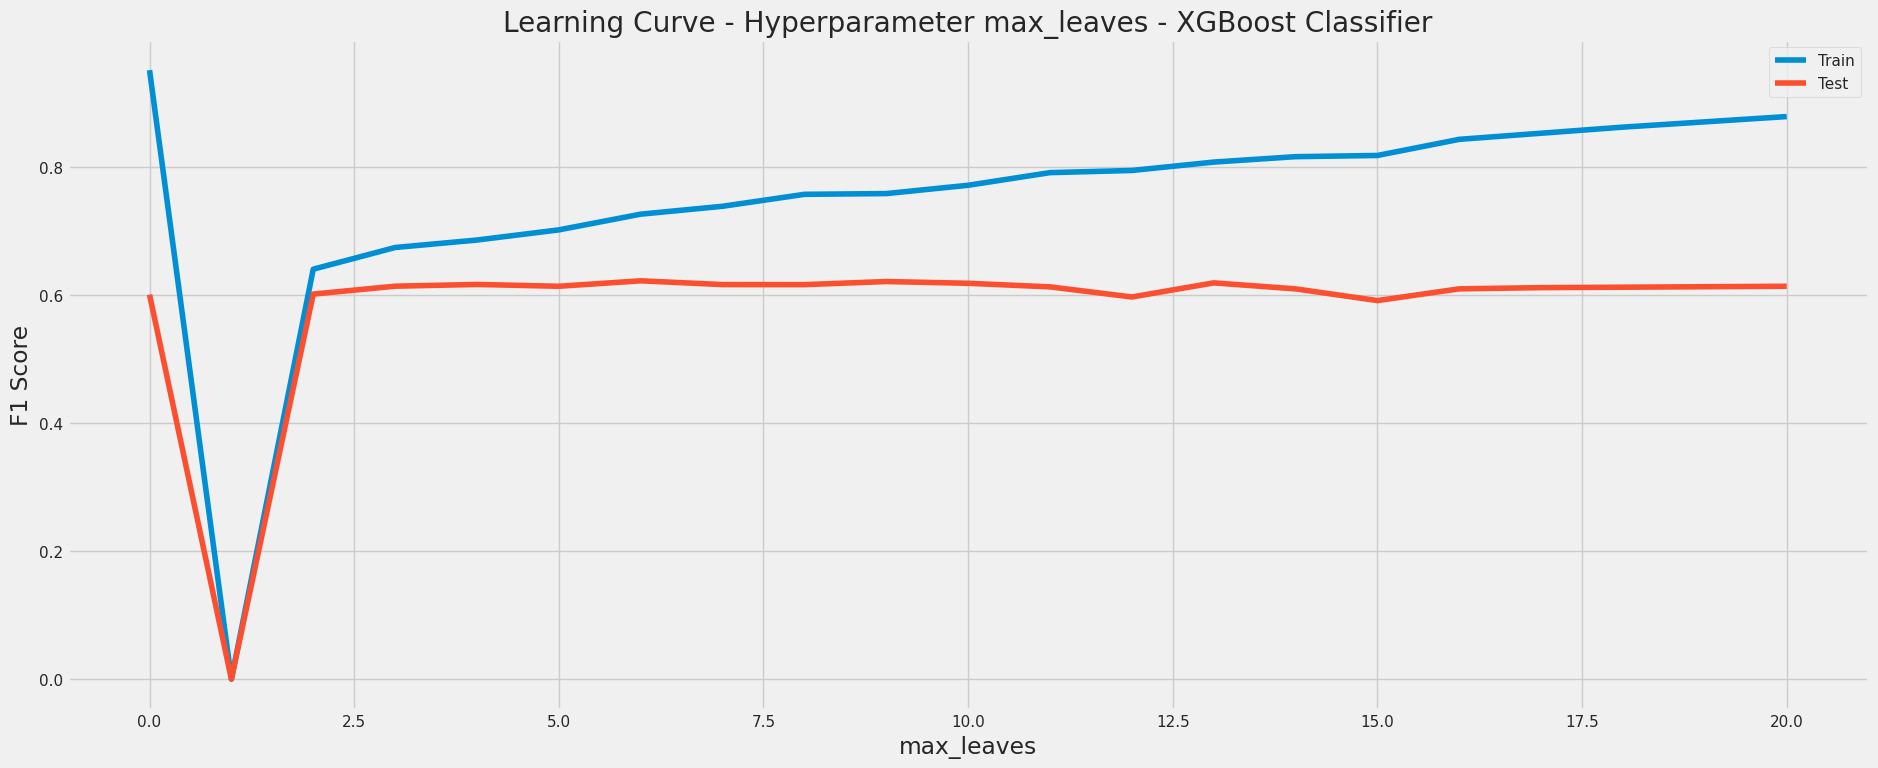

In [ ]:
param_values = param_values = [int(x) for x in np.linspace(0, 20, 20)]
draw_learning_curve(param_values)

with max_leaves = 2, the model achieved highest F1 score on the lowest error difference between data training and data testing

#### Final Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

hyperparameters = dict(max_leaves = [2],
                       max_depth = [1],
                       gamma = [int(x) for x in np.linspace(15, 25, 3)]
                      )

xg = XGBClassifier()
gs = GridSearchCV(xg, hyperparameters, scoring='f1', cv=10)
gs.fit(X_under, y_under)
classification_bal(gs)

Accuracy (Train Set): 0.81
Accuracy (Test Set): 0.86
Precision (Train Set): 0.77
Precision (Test Set): 0.68
Recall (Train Set): 0.50
Recall (Test Set): 0.51
F1-Score (Train Set): 0.61
F1-Score (Test Set): 0.58
roc_auc (train-proba): 0.85
roc_auc (test-proba): 0.85

F1-Score (crossval train): 0.63
F1-Score (crossval test): 0.62
recall (crossval train): 0.53
recall (crossval test): 0.53
ROC_AUC (crossval train): 0.85
ROC_AUC (crossval test): 0.85
Precision (crossval train): 0.78
Precision (crossval test): 0.77
Accuracy (crossval train): 0.81
Accuracy (crossval test): 0.81


#### Compare Metrics Results with Default Parameter

After tuning the hyperparameter, all metrics decreased compared to the default parameter. Positively aside, our model is not overfitting again after tuning the parameter, thus we can also consider this as the selected model for predicting the churn.

## Feature Importance

After considering the model score results, we choose Random Forest Tree model as the best model for this case, thus we will use this model to see which feature importance has significantly affected the prediction of churned customer.

In [ ]:
from sklearn.model_selection import GridSearchCV

hyperparameters = dict(max_samples = [float(x) for x in np.linspace(0.075, 0.085, 3)],
                       max_leaf_nodes = [2],
                       min_weight_fraction_leaf = [float(x) for x in np.linspace(0.05, 0.1, 3)],
                       min_samples_split = [int(x) for x in np.linspace(290, 295, 3)]
                      )

rf = RandomForestClassifier(class_weight = 'balanced', random_state = 42)
model = GridSearchCV(rf, hyperparameters, scoring='f1', cv=10)
model.fit(X_under, y_under)

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             param_grid={'max_leaf_nodes': [2],
                         'max_samples': [0.075, 0.08, 0.085],
                         'min_samples_split': [290, 292, 295],
                         'min_weight_fraction_leaf': [0.05, 0.07500000000000001,
                                                      0.1]},
             scoring='f1')

In [ ]:
def show_feature_importance(model):
    feat_importances = pd.Series(model.best_estimator_.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

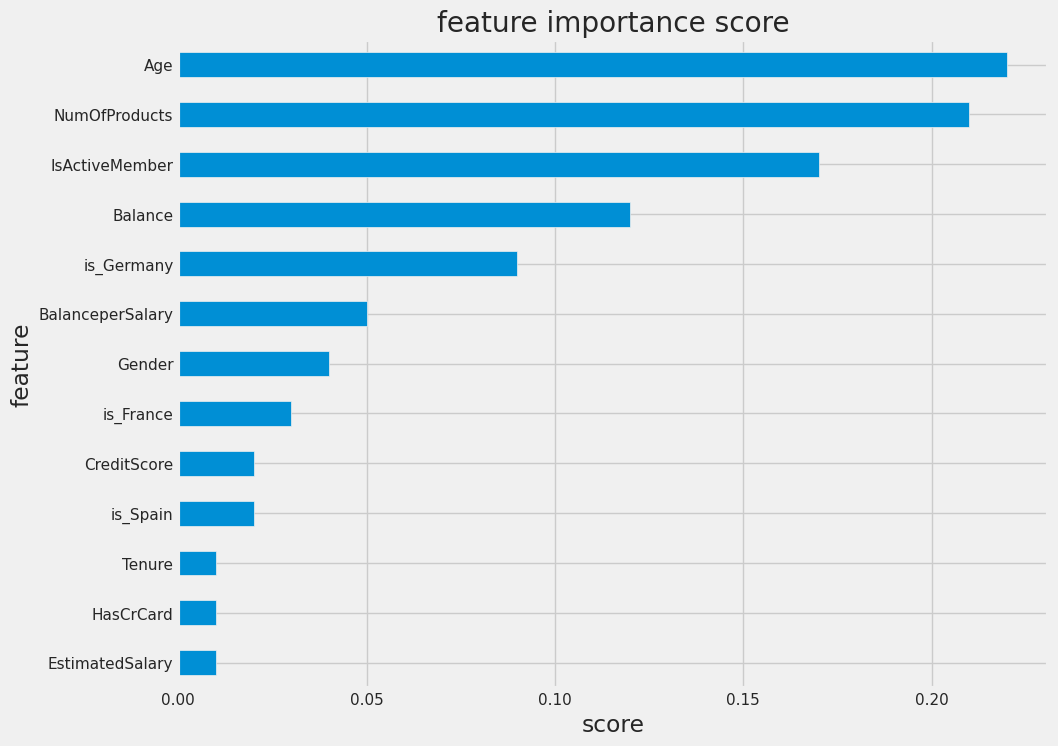

In [ ]:
show_feature_importance(model)

Top 5 highest feature importance;

1. Age
2. NumOfProducts
3. IsActiveMember
4. Balance
5. is_Germany

Top 5 lowest feature importance;
1. EstimatedSalary
2. HasCrCard
3. Tenure
4. is_Spain
5. CreditScore

## Model Insights

### Model Insights:

Based on the visualization above, we can select the top 5 highest as the selected feature on the next prediction of churned customer while the top 5 lowest we can exclude them.

## Shap Values

In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.7/535.7 kB 5.1 MB/s eta 0:00:00


In [ ]:
rf = RandomForestClassifier(class_weight = 'balanced', random_state = 42, max_samples = 0.0775, max_leaf_nodes = 2, min_weight_fraction_leaf = 0.06666666666666667, min_samples_split = 3)
rf.fit(X_cross_under, y_cross_under)

RandomForestClassifier(class_weight='balanced', max_leaf_nodes=2,
                       max_samples=0.0775, min_samples_split=3,
                       min_weight_fraction_leaf=0.06666666666666667,
                       random_state=42)

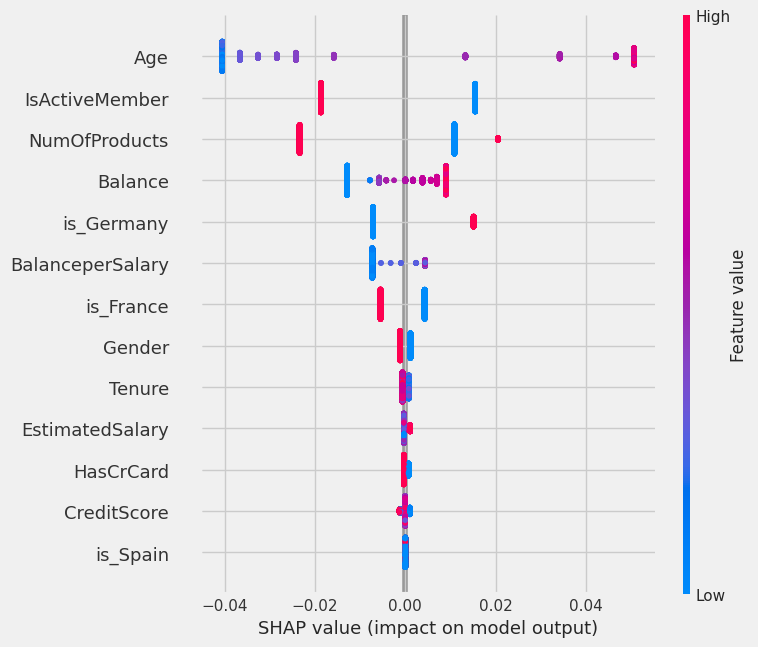

In [ ]:
import shap
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values[1], X_test)

What information could we get from the visualization above?

1. older customer tend to be churned
2. inactive customer tend to be churned
3. less product from the customer tend to be churned
4. the more balance from the customer account, more of them tend to be churned
5. customer from germany tend to be churned
6. the more salary's customer to save it into their account, more of them tend to be churned
7. customer from france tend to be retained
8. Female customer tend to be churned
9. the less tenure from the customer, more of them tend to be churned
10. salary, creditcard, creditscore, and from spanish did not affecting whether customer will churned or not

## Business Insight

> **We can focus our marketing to prevent customer to be churned on the old generation, few owned product, high balance, from germany while maintaining different strategies for active and inactive customer to prevent them to be churned.**

## Business Recommendation

1. Give a loyalty reward program such as point if the active customer that came from Millennials and Gen X who have mid and high balance, often doing transaction activity.
2. Give a push notification via message phone to the German inactive customer with the content of notification is promoting a shopping discount in certain merchant if they buy spesificly luxury product.
3. Increasing the quality of bank's product so the customer interest to buy the other product.